## **Diabetes Prediction Project**

Nowadays more and more people are getting diagnosed with different types of diabetes. There exist three main different types; type I, type II and gestational diabetes. While doing this study we are considering some features to predict whether someone may be diagnosed as a diabetic person. Besides that we are interested in knowing how some of these features may be related with the prevention of diabetes. The objective of our project is to investigate a range of health-related factors and their connections to diagnose whether a person has diabetes or not.  

### <span style="color:pink">**General information on Variables**</span>
**1. `Gender`**: gender can play a role in diabetes risk, for example, women with a history of gestational diabetes (diabetes during pregnancy) have a higher risk of developing type 2 diabetes later in life. Additionally, some studies have suggested that men may have a slightly higher risk of diabetes compared to women.

**2. `Age`**: age is a very important factor in predicting diabetes risk. As individuals get older, their risk of developing diabetes increases. This is due to factors such as reduced physical activity, changes in hormone levels, and a higher likelihood of developing other health conditions that can contribute to diabetes.

**3. `BMI (Standard weight status)`**: BMI is a measure of body fat based on a person's height and weight. It is commonly used as an indicator of overall weight status and can be helpful in predicting diabetes risk. Higher BMI is associated with a greater likelihood of developing type 2 diabetes. Excess body fat, particularly around the waist, can lead to insulin resistance and impair the body's ability to regulate blood sugar levels.
- Underweight = below 18.5
- Normal or healthy weight = 18.5 - 24.9
- Overweight = 25.0 - 29.9
- Obese = above 30.0

**4.`Hypertension`**: hypertension, or high blood pressure, is a condition that often coexists with diabetes. The two conditions share common risk factors and can contribute to each other's development. Having hypertension increases the risk of developing type 2 diabetes and vice versa. 

**5. `Heart Disease`**: the relationship between heart disease and diabetes is bidirectional, meaning that having one condition increases the risk of developing the other. This is because they share many common risk factors, such as obesity, high blood pressure, and high cholesterol.

**6. `Smoking History`**: smoking is a modifiable risk factor for diabetes. Cigarette smoking has been found to increase the risk of developing type 2 diabetes. Smoking can contribute to insulin resistance and impair glucose metabolism. Quitting smoking can significantly reduce the risk of developing diabetes and its complications.

**7. `HnA1c levels (Hemoglobine)`**: it is a measure of the average blood glucose level over the past 2-3 months. It provides information about long-term blood sugar control. Higher HbA1c levels indicate poorer glycemic control and are associated with an increased risk of developing diabetes and its complications.
- Normal results = less than 5.7
- Prediabetes = 5.7 to 6.4
- Diabates = more than 6.5

**8. `Blood Glucose Level`**: blood glucose level refers to the amount of glucose (sugar) present in the blood at a given time. Elevated blood glucose levels, particularly in the fasting state or after consuming carbohydrates, can indicate impaired glucose regulation and increase the risk of developing diabetes.
- Normal results for diabetes = less than 140 mg/dL
- Impaired results for diabetes = from 140 to 200 mg/dL
- Abnormal (Diagnostic) results for diabetes = greater than 200 mg/dL

### Libraries


In [209]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial.distance import cdist
from sklearn.metrics import euclidean_distances
from sklearn.decomposition import PCA
from sklearn.datasets import make_classification
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

### Loading the Dataset

In [210]:
dataset = pd.read_csv("diabetes_prediction_dataset.csv")
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


-----

### <span style="color:pink">**Clean and analyse our option datasets**</span>
1. Handling Missing Values
2. Change categorical values to numerical
3. Handle "smoking_history" feature

- Convert "smoking" feature to 0 to 2 scale
- Take out rows of NA values (from smoking the "No Info")
- Take out "smoking" feature

#### 1. Handle Missing Values

In [211]:
#HANDLE MISSING VALUES
dataset = dataset.dropna() #Eliminate rows with Na values

#### 2. Change categorical values to numerical

In [212]:
#CHANGE CATEGORICAL VALUES OF GENDER TO NUMERICAL: 0 for Male, 1 for Female
for index, row in dataset.iterrows():
    if row["gender"] == "Male":
        dataset.at[index, "gender"] = 0
    elif row["gender"] == "Female":
        dataset.at[index,"gender"] = 1
    elif row["gender"] == "Other":
        dataset.at[index,"gender"] = 0.5

dataset = dataset.astype({'age': int,"gender":int})

dataset.head(10)

gender  age  hypertension  heart_disease smoking_history    bmi  \
0       1   80             0              1           never  25.19   
1       1   54             0              0         No Info  27.32   
2       0   28             0              0           never  27.32   
3       1   36             0              0         current  23.45   
4       0   76             1              1         current  20.14   
5       1   20             0              0           never  27.32   
6       1   44             0              0           never  19.31   
7       1   79             0              0         No Info  23.86   
8       0   42             0              0           never  33.64   
9       1   32             0              0           never  27.32   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0  
5          6.6                   85         0  
6          6.5                  200         1  
7          5.7                   85         0  
8          4.8                  145         0  
9          5.0                  100         0

#### 3. Handle "smoking_history" feature

- Imputation: handling missing values.
- Strategies: 3 ways we do.
- In No info put average
- Stratified

In [213]:
#FIRST IMPLEMENTATION
#Check which values our "smoking_history" feature has
unique_values = dataset["smoking_history"].unique()
print("Smoking_history values: ",unique_values)

data1 = dataset.copy()
#Convert values to 0 to 2 scale
for index, row in data1.iterrows():
    if row["smoking_history"] == "No Info":
        data1.at[index, "smoking_history"] = -1
    elif row["smoking_history"] == "never":
        data1.at[index, "smoking_history"] = 0
    elif row["smoking_history"] == "former":
        data1.at[index, "smoking_history"] = 1
    elif row["smoking_history"] == "not current":
        data1.at[index, "smoking_history"] = 1
    elif row["smoking_history"] == "current":
        data1.at[index, "smoking_history"] = 2
    elif row["smoking_history"] == "ever":
        data1.at[index, "smoking_history"] = 0

data1 = data1.astype({"smoking_history":int})


data1.head(10)

Smoking_history values:  ['never' 'No Info' 'current' 'former' 'ever' 'not current']


gender  age  hypertension  heart_disease  smoking_history    bmi  \
0       1   80             0              1                0  25.19   
1       1   54             0              0               -1  27.32   
2       0   28             0              0                0  27.32   
3       1   36             0              0                2  23.45   
4       0   76             1              1                2  20.14   
5       1   20             0              0                0  27.32   
6       1   44             0              0                0  19.31   
7       1   79             0              0               -1  23.86   
8       0   42             0              0                0  33.64   
9       1   32             0              0                0  27.32   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0  
5          6.6                   85         0  
6          6.5                  200         1  
7          5.7                   85         0  
8          4.8                  145         0  
9          5.0                  100         0

In [214]:
#SECOND IMPLEMENTATION
data2 = data1.copy()
data2 = data2.loc[data2["smoking_history"] != -1] #Eliminate "No info" from smoking feature

deleted_rows = dataset.shape[0] - data2.shape[0]

print("Number of rows deleted: ", deleted_rows)
data2.head()

Number of rows deleted:  35816


gender  age  hypertension  heart_disease  smoking_history    bmi  \
0       1   80             0              1                0  25.19   
2       0   28             0              0                0  27.32   
3       1   36             0              0                2  23.45   
4       0   76             1              1                2  20.14   
5       1   20             0              0                0  27.32   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0  
5          6.6                   85         0

In [215]:
#THIRD IMPLEMENTATION
data3 = dataset.copy()
data3 = data3.drop("smoking_history", axis=1)
data3.head()

gender  age  hypertension  heart_disease    bmi  HbA1c_level  \
0       1   80             0              1  25.19          6.6   
1       1   54             0              0  27.32          6.6   
2       0   28             0              0  27.32          5.7   
3       1   36             0              0  23.45          5.0   
4       0   76             1              1  20.14          4.8   

   blood_glucose_level  diabetes  
0                  140         0  
1                   80         0  
2                  158         0  
3                  155         0  
4                  155         0

### Choosing which dataset to use

After evaluating the posibilities of each dataset we came to this conclusion:
- Firstly, the first dataset contain the smoking_history feature with the value No info. We decided to use this dataset because we can apply feature engineering later and get rid of the feature where the No Info values will be represented.
- Secondly, the second dataset also contain the smoking_history feature but without the No info value. Now the variable is more useful as it does not contain Nan values, but we considered not to use this dataset since we would loose a lot of samples.
- Finally, the third dataset does not contain the feature smoking_history, but we chose not to use this one because we want to explore the smoking_history feature.


In [216]:
data = data1

----

### <span style="color:pink">**Feature Engineering**</span>
- Do we need to create more features that might be more informative for our problem?

In [217]:
#1. We create a new feature than classifies the Blood Glucose levels in 3 groups
data["glucose_class"] = pd.cut(x=data["blood_glucose_level"], bins = [0,139,200,300],
                                    labels = ["Normal", "Prediabetes", "Diabetes"])

#2. We create a new feature that classifies BMI in 4 groups
data["BMI_range"] = pd.cut(x=data["bmi"], bins=[0,18.5,24.9,29.9,100],
                            labels = ["Underweight","Healthy","Overweight","Obese"])

#3. New feature that classifies hemoglobine levels
data["hemoglobine_class"] = pd.cut(x=data["HbA1c_level"], bins=[0,5.7,6.4,10],
                                    labels=["Normal","Prediabetes","Diabetes"])

#4. New feature that classifies age
data["age_range"] = pd.cut(x=data["age"], bins = [0,25,60,100],
                            labels = ["Young","Adult","Elderly"])

#5. New feature that classifies smoking_history
data["smoking"] = pd.cut(x=data["smoking_history"], bins=[-2, -0.5, 0.5, 1.5, 2.5],
                            labels = ["NoInfo","Never","Former","Current"])

data.head()

gender  age  hypertension  heart_disease  smoking_history    bmi  \
0       1   80             0              1                0  25.19   
1       1   54             0              0               -1  27.32   
2       0   28             0              0                0  27.32   
3       1   36             0              0                2  23.45   
4       0   76             1              1                2  20.14   

   HbA1c_level  blood_glucose_level  diabetes glucose_class   BMI_range  \
0          6.6                  140         0   Prediabetes  Overweight   
1          6.6                   80         0        Normal  Overweight   
2          5.7                  158         0   Prediabetes  Overweight   
3          5.0                  155         0   Prediabetes     Healthy   
4          4.8                  155         0   Prediabetes     Healthy   

  hemoglobine_class age_range  smoking  
0          Diabetes   Elderly    Never  
1          Diabetes     Adult   NoInfo  
2            Normal     Adult    Never  
3            Normal     Adult  Current  
4            Normal   Elderly  Current

In [218]:
#Transform new categorical columns to numerical + divide classes in different features
#Get a list of the new columns and of all the columns in the dataset
columns = ["glucose_class","BMI_range","hemoglobine_class","age_range","smoking"]
original_columns = list(data.columns)
data = pd.get_dummies(data, columns=columns, dummy_na= False, drop_first=False)
#Create new columns based on new classifications
new_columns = [col for col in data.columns if col not in original_columns]

new_columns

data.head()


gender  age  hypertension  heart_disease  smoking_history    bmi  \
0       1   80             0              1                0  25.19   
1       1   54             0              0               -1  27.32   
2       0   28             0              0                0  27.32   
3       1   36             0              0                2  23.45   
4       0   76             1              1                2  20.14   

   HbA1c_level  blood_glucose_level  diabetes  glucose_class_Normal  ...  \
0          6.6                  140         0                     0  ...   
1          6.6                   80         0                     1  ...   
2          5.7                  158         0                     0  ...   
3          5.0                  155         0                     0  ...   
4          4.8                  155         0                     0  ...   

   hemoglobine_class_Normal  hemoglobine_class_Prediabetes  \
0                         0                              0   
1                         0                              0   
2                         1                              0   
3                         1                              0   
4                         1                              0   

   hemoglobine_class_Diabetes  age_range_Young  age_range_Adult  \
0                           1                0                0   
1                           1                0                1   
2                           0                0                1   
3                           0                0                1   
4                           0                0                0   

   age_range_Elderly  smoking_NoInfo  smoking_Never  smoking_Former  \
0                  1               0              1               0   
1                  0               1              0               0   
2                  0               0              1               0   
3                  0               0              0               0   
4                  1               0              0               0   

   smoking_Current  
0                0  
1                0  
2                0  
3                1  
4                1  

[5 rows x 26 columns]

In [219]:
#Drop No Info columns
data = data.drop("smoking_history", axis=1)
data = data.drop("smoking_NoInfo", axis=1)
data.head()

gender  age  hypertension  heart_disease    bmi  HbA1c_level  \
0       1   80             0              1  25.19          6.6   
1       1   54             0              0  27.32          6.6   
2       0   28             0              0  27.32          5.7   
3       1   36             0              0  23.45          5.0   
4       0   76             1              1  20.14          4.8   

   blood_glucose_level  diabetes  glucose_class_Normal  \
0                  140         0                     0   
1                   80         0                     1   
2                  158         0                     0   
3                  155         0                     0   
4                  155         0                     0   

   glucose_class_Prediabetes  ...  BMI_range_Obese  hemoglobine_class_Normal  \
0                          1  ...                0                         0   
1                          0  ...                0                         0   
2                          1  ...                0                         1   
3                          1  ...                0                         1   
4                          1  ...                0                         1   

   hemoglobine_class_Prediabetes  hemoglobine_class_Diabetes  age_range_Young  \
0                              0                           1                0   
1                              0                           1                0   
2                              0                           0                0   
3                              0                           0                0   
4                              0                           0                0   

   age_range_Adult  age_range_Elderly  smoking_Never  smoking_Former  \
0                0                  1              1               0   
1                1                  0              0               0   
2                1                  0              1               0   
3                1                  0              0               0   
4                0                  1              0               0   

   smoking_Current  
0                0  
1                0  
2                0  
3                1  
4                1  

[5 rows x 24 columns]

-----

### <span style="color:pink">**Create train, test and validation datasets**</span>
Split ratio: 70 / 15 / 15
- X_train and y_train for training our machine learning model (70%)
- X_val and y_val for hyperparameter tuning and model selection (15%)
- X_test and y_test for evaluating its performance on unseen data (15%)

In [220]:
X = data.drop("diabetes", axis=1)
y = data["diabetes"]

#Randomize value of random seed
RANDOM_SEED = np.random.randint(1, 1000)  # Generates a random integer between 1 and 1000

#Split the dataset into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=RANDOM_SEED, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=RANDOM_SEED, stratify=y_temp)

print(f"Training set size: {len(X_train)}")
print(f"Validation set size: {len(X_val)}")
print(f"Testing set size: {len(X_test)}")

#test must be same as original (divide it at beggining before doing visualizations and changes) - make sure test is same proportion (stratifies)
#At time of test use give x_test and transform use the one from before

Training set size: 70000
Validation set size: 15000
Testing set size: 15000


In [221]:
#Check if train, test and val sets have same proportion of diabetes positive and negative cases
train_distribution = np.bincount(y_train) / len(y_train)
test_distribution = np.bincount(y_test) / len(y_test)
val_distribution = np.bincount(y_val) / len(y_val)

print("Class distribution in Training set:", train_distribution)
print("Class distribution in Testing set:", test_distribution)
print("Class distribution in Validation set:", val_distribution)

Class distribution in Training set: [0.915 0.085]
Class distribution in Testing set: [0.915 0.085]
Class distribution in Validation set: [0.915 0.085]


----

### <span style="color:pink">**Exporation Data Analysis**</span>
Let's explore our data:

**1. Data quality**: handle duplicates, uniqueness, balance data, data description (statistics)

**2. Analysis of the data**: Understand distribution of features, identify patterns, histograms, scatter plots, correlation matrices...

#### **1. Data quality**

In [222]:
#Handle duplicates: how many duplicates are in our data?
duplicate_rows = X_train[X_train.duplicated()]
print("Number of duplicate rows: ", duplicate_rows.shape[0])

Number of duplicate rows:  2125


In [223]:
#Uniqueness: number of distict values in each feature
for column in X_train.columns:
    count = len(X_train[column].unique())
    print(f"Feature '{column}' has {count} distinct values.")

Feature 'gender' has 2 distinct values.
Feature 'age' has 81 distinct values.
Feature 'hypertension' has 2 distinct values.
Feature 'heart_disease' has 2 distinct values.
Feature 'bmi' has 4022 distinct values.
Feature 'HbA1c_level' has 18 distinct values.
Feature 'blood_glucose_level' has 18 distinct values.
Feature 'glucose_class_Normal' has 2 distinct values.
Feature 'glucose_class_Prediabetes' has 2 distinct values.
Feature 'glucose_class_Diabetes' has 2 distinct values.
Feature 'BMI_range_Underweight' has 2 distinct values.
Feature 'BMI_range_Healthy' has 2 distinct values.
Feature 'BMI_range_Overweight' has 2 distinct values.
Feature 'BMI_range_Obese' has 2 distinct values.
Feature 'hemoglobine_class_Normal' has 2 distinct values.
Feature 'hemoglobine_class_Prediabetes' has 2 distinct values.
Feature 'hemoglobine_class_Diabetes' has 2 distinct values.
Feature 'age_range_Young' has 2 distinct values.
Feature 'age_range_Adult' has 2 distinct values.
Feature 'age_range_Elderly' has 

Balance of genders:
    Males = 41.42285714285715%
    Females = 58.57714285714286%


Text(0.5, 0.98, 'Proportion of males and females')

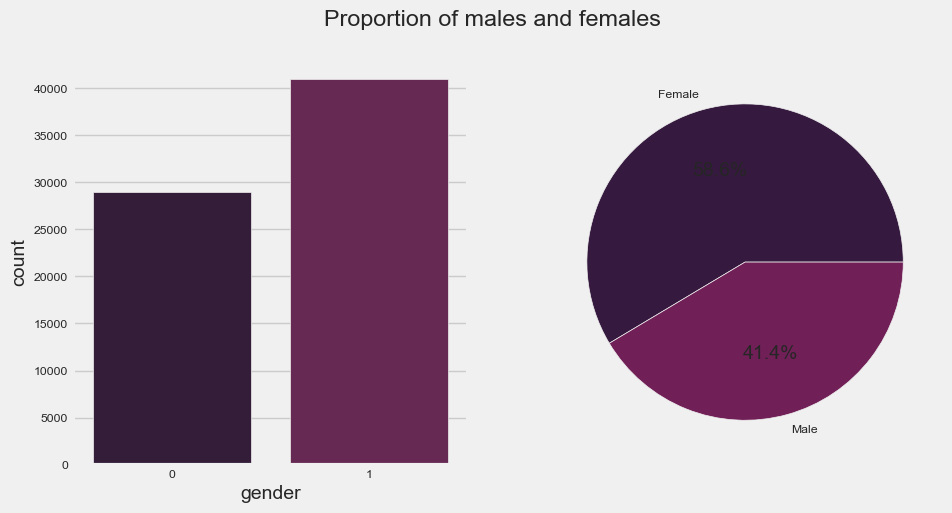

In [224]:
#We observe there are 2 values for gender, but what is the balance?
labels = ['Female', 'Male']
count = X_train['gender'].value_counts().values

print("Balance of genders:")
print(f"    Males = {(count[1]/len(X_train['gender']))*100}%")
print(f"    Females = {(count[0]/len(X_train['gender']))*100}%")

training_combined = pd.concat([X_train, y_train], axis=1)
palette = sns.color_palette('rocket')[0:2]
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
sns.countplot(x=training_combined['gender'], data=training_combined, palette=palette)
plt.subplot(1, 2, 2)
plt.pie(count, labels=labels, autopct='%1.1f%%',colors=palette)
plt.suptitle("Proportion of males and females")


In [225]:
#SUMMARY STATISTICS
X_train.describe().T

count        mean        std    min     25%  \
gender                         70000.0    0.585771   0.492592   0.00    0.00   
age                            70000.0   41.872143  22.521776   0.00   24.00   
hypertension                   70000.0    0.075000   0.263393   0.00    0.00   
heart_disease                  70000.0    0.039443   0.194648   0.00    0.00   
bmi                            70000.0   27.326662   6.624026  10.01   23.65   
HbA1c_level                    70000.0    5.527090   1.068193   3.50    4.80   
blood_glucose_level            70000.0  138.050514  40.762446  80.00  100.00   
glucose_class_Normal           70000.0    0.436486   0.495953   0.00    0.00   
glucose_class_Prediabetes      70000.0    0.530471   0.499074   0.00    0.00   
glucose_class_Diabetes         70000.0    0.033043   0.178750   0.00    0.00   
BMI_range_Underweight          70000.0    0.084343   0.277903   0.00    0.00   
BMI_range_Healthy              70000.0    0.218486   0.413222   0.00    0.00   
BMI_range_Overweight           70000.0    0.458100   0.498245   0.00    0.00   
BMI_range_Obese                70000.0    0.239071   0.426519   0.00    0.00   
hemoglobine_class_Normal       70000.0    0.463514   0.498671   0.00    0.00   
hemoglobine_class_Prediabetes  70000.0    0.328371   0.469624   0.00    0.00   
hemoglobine_class_Diabetes     70000.0    0.208114   0.405962   0.00    0.00   
age_range_Young                70000.0    0.261843   0.439641   0.00    0.00   
age_range_Adult                70000.0    0.493143   0.499957   0.00    0.00   
age_range_Elderly              70000.0    0.236029   0.424643   0.00    0.00   
smoking_Never                  70000.0    0.390271   0.487815   0.00    0.00   
smoking_Former                 70000.0    0.157457   0.364234   0.00    0.00   
smoking_Current                70000.0    0.093514   0.291154   0.00    0.00   

                                  50%    75%     max  
gender                           1.00    1.0    1.00  
age                             43.00   60.0   80.00  
hypertension                     0.00    0.0    1.00  
heart_disease                    0.00    0.0    1.00  
bmi                             27.32   29.6   95.69  
HbA1c_level                      5.80    6.2    9.00  
blood_glucose_level            140.00  159.0  300.00  
glucose_class_Normal             0.00    1.0    1.00  
glucose_class_Prediabetes        1.00    1.0    1.00  
glucose_class_Diabetes           0.00    0.0    1.00  
BMI_range_Underweight            0.00    0.0    1.00  
BMI_range_Healthy                0.00    0.0    1.00  
BMI_range_Overweight             0.00    1.0    1.00  
BMI_range_Obese                  0.00    0.0    1.00  
hemoglobine_class_Normal         0.00    1.0    1.00  
hemoglobine_class_Prediabetes    0.00    1.0    1.00  
hemoglobine_class_Diabetes       0.00    0.0    1.00  
age_range_Young                  0.00    1.0    1.00  
age_range_Adult                  0.00    1.0    1.00  
age_range_Elderly                0.00    0.0    1.00  
smoking_Never                    0.00    1.0    1.00  
smoking_Former                   0.00    0.0    1.00  
smoking_Current                  0.00    0.0    1.00

#### Check balance of dataset

In [226]:
#Count positive and negative diabetes cases
diabetes_positive = 0
diabetes_negative = 0
for row in y_train: #To look in data: in data["diabetes"]
    if row == 0:
        diabetes_negative += 1
    elif row == 1:
        diabetes_positive += 1
#Calculate balance
n_rows = y_train.shape[0]
print(f"There are {diabetes_positive} diabetes cases and {diabetes_negative} no diabetes cases.")
print(f"    Balance: {(diabetes_positive/n_rows)*100}% of diabetes - {(diabetes_negative/n_rows)*100}% of no diabetes.")


There are 5950 diabetes cases and 64050 no diabetes cases.
    Balance: 8.5% of diabetes - 91.5% of no diabetes.


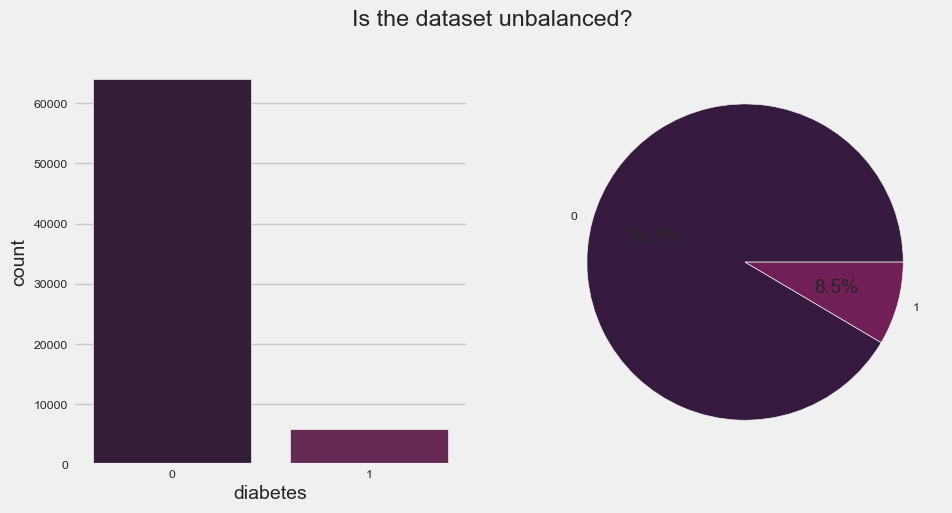

In [227]:
labels = [0,1]
values = [diabetes_negative, diabetes_positive]

palette = sns.color_palette('rocket')[0:2]
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.countplot(x=y_train, data=X_train, palette=palette)
plt.subplot(1, 2, 2)
plt.pie(values, labels=labels, autopct='%1.1f%%',colors=palette)
plt.suptitle("Is the dataset unbalanced?")
plt.show()


#### Using resampling

In [228]:
#BALANCE DATASETS - USING RESAMPLING
# Problem: too many repeated examples of diabetes
# Combine the training data
training_combined = pd.concat([X_train, y_train], axis=1)
#Separate majority and minority classes
majority_class = training_combined[training_combined['diabetes'] == 0]
minority_class = training_combined[training_combined['diabetes'] == 1]
#Oversample the minority class
minority_class_oversampled = resample(minority_class, replace=True, n_samples=len(majority_class), random_state=42)
#Combine the oversampled minority class with the majority class
balanced_data = pd.concat([majority_class, minority_class_oversampled])
#Mix the rows
balanced_data = balanced_data.sample(frac=1, random_state=42)
#Print the balanced dataset
print(balanced_data['diabetes'].value_counts())

0    64050
1    64050
Name: diabetes, dtype: int64


By using resampling we encounter a problem: since our dataset is not balanced at all (91.5% versus 8.5%), if we use resampling we will be duplicating diabetes positive cases until igualating the number of samples from positive and negative cases. Since we have so low positive diabetes cases, many examples will appear repeated, which can affect our model predictions.

#### Using undersampling

In [229]:
#BALANCE DATASETS - REMOVING EXAMPLES FROM MAJORITY CLASS
# Now we randomly select examples from the majority class and eliminate the rest

#Separate majority and minority classes
majority_class = training_combined[training_combined['diabetes'] == 0]
minority_class = training_combined[training_combined['diabetes'] == 1]
#Undersample the majority class
majority_class_undersampled = resample(majority_class, replace=False, n_samples=len(minority_class), random_state=42)
#Combine the undersampled majority class with the minority class
balanced_data = pd.concat([majority_class_undersampled, minority_class])
#Mix the rows
balanced_data = balanced_data.sample(frac=1, random_state=42)
#Print the balanced dataset
print(balanced_data['diabetes'].value_counts())
print("Number of examples eliminated in dataset 1: ", dataset.shape[0] - balanced_data.shape[0])

1    5950
0    5950
Name: diabetes, dtype: int64
Number of examples eliminated in dataset 1:  88100


Now we have undersampled the majority class, which means that we have lost a lot of examples.

We would see how our models work with the original imbalanced dataset and later we will handle class imbalance with more complex undersampling and oversampling methods.

#### **2. Analysis of the data**

Text(0.5, 1.03, 'Correlation Heatmap between variables')

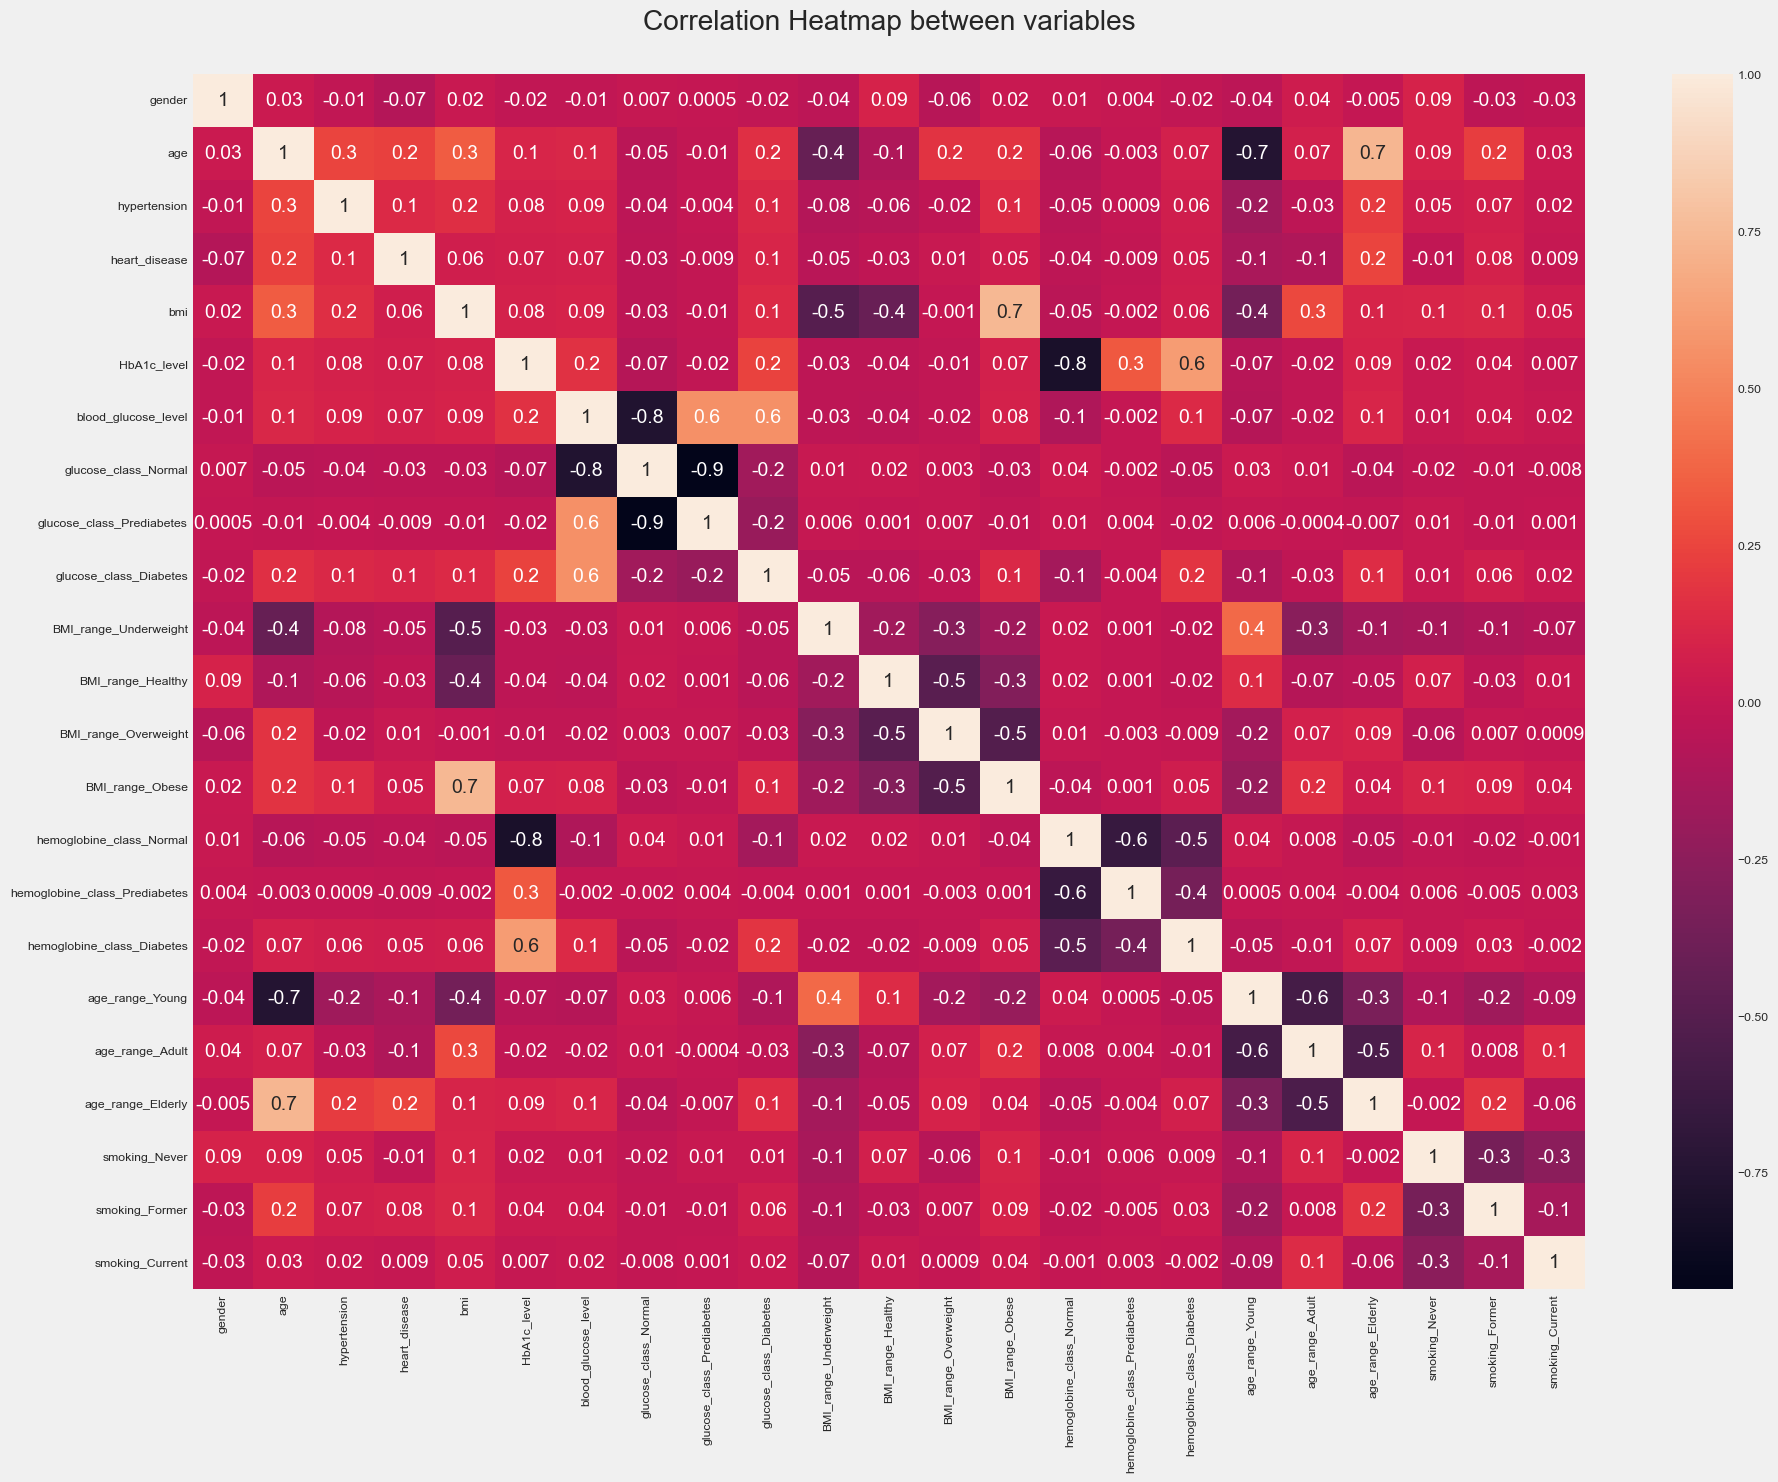

In [230]:
#FEATURE CORRELATION: With all variables
fig, ax = plt.subplots(figsize=(20,15))
heatmap = sns.heatmap(X_train.corr(), annot=True, fmt='.1g', cmap="rocket", cbar=True)
heatmap.set_title("Correlation Heatmap between variables", y=1.03)

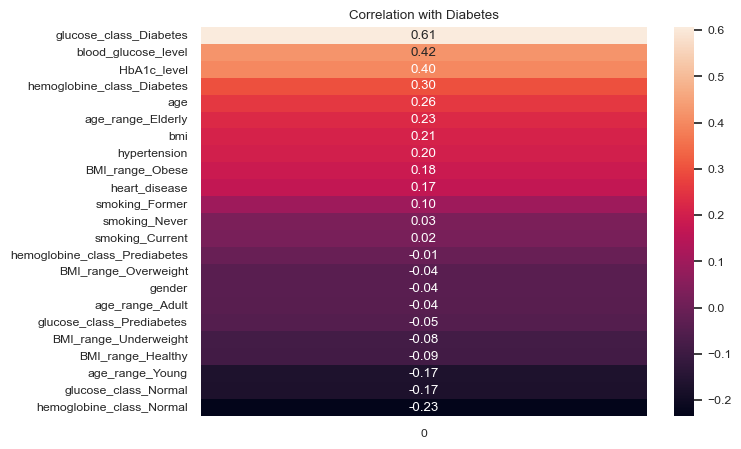

In [231]:
#FEATURE CORRELATION: Comparing each feature with diabetes outcome
correlation = X_train.corrwith(y_train)
correlation_sorted = correlation.sort_values(ascending=False)

sns.set(font_scale=0.8)
sns.set_style("white")
sns.set_palette("PuBuGn_d")
sns.heatmap(correlation_sorted.to_frame(), cmap="rocket", annot=True, fmt='.2f')
plt.title('Correlation with Diabetes')
plt.show()

Since our dataset has 8 features, to visualize data we will use dimensionality reduction techniques for more concise visualizations. We will reduce dimensionality from 8 to 2 and 3 dimensions with PCA (Principal Component Analysis)

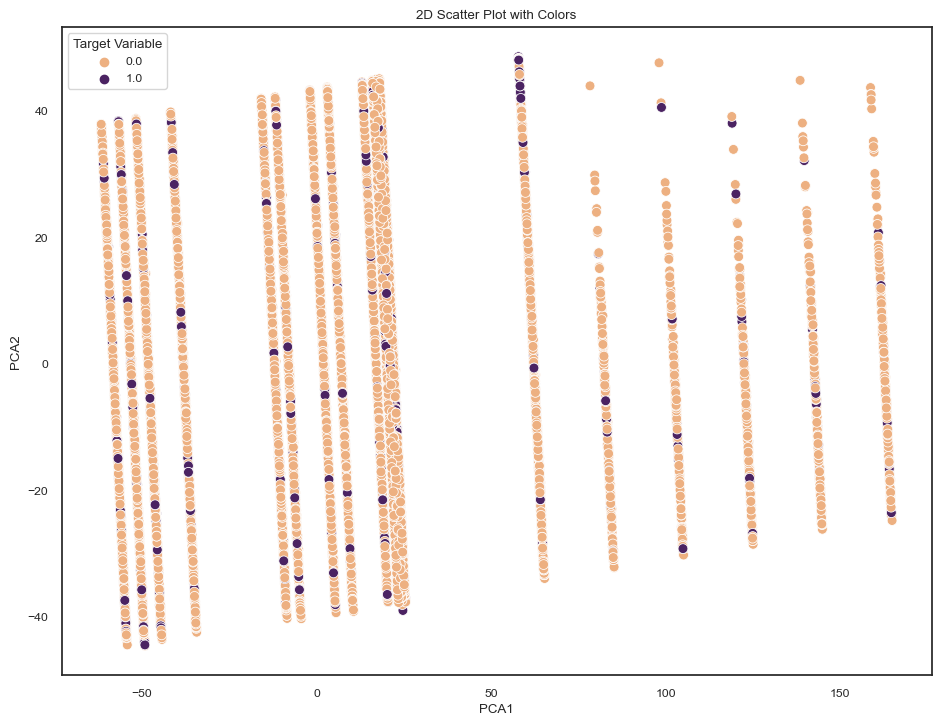

In [232]:
#SCATTER PLOT 2D

# Apply PCA to reduce to 2 components using X_train
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)

# Create 2D scatter plot
df_pca = pd.DataFrame(data=X_pca, columns=['PCA1', 'PCA2'])
df_pca['Target'] = y_train  # Use y_train as the target variable

# Create 2D scatter plot
fig = plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='Target', data=df_pca, palette='flare', s=50)

plt.title('2D Scatter Plot with Colors')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(title='Target Variable')

plt.show()

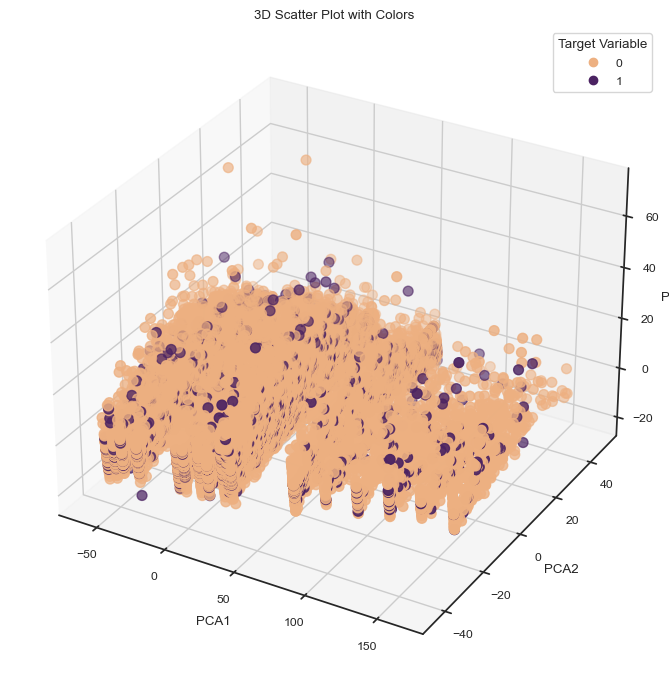

In [233]:
#SCATTER PLOT 3D

#Apply PCA to reduce to 3 components
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_train)

#Create DataFrame for 3D scatter plot
df_pca = pd.DataFrame(data=X_pca, columns=['PCA1', 'PCA2', 'PCA3'])
df_pca['Target'] = y_train

#Create 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(df_pca['PCA1'], df_pca['PCA2'], df_pca['PCA3'], c=df_pca['Target'], cmap='flare', s=50)

ax.set_title('3D Scatter Plot with Colors')
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')
ax.legend(*scatter.legend_elements(), title='Target Variable')

plt.show()


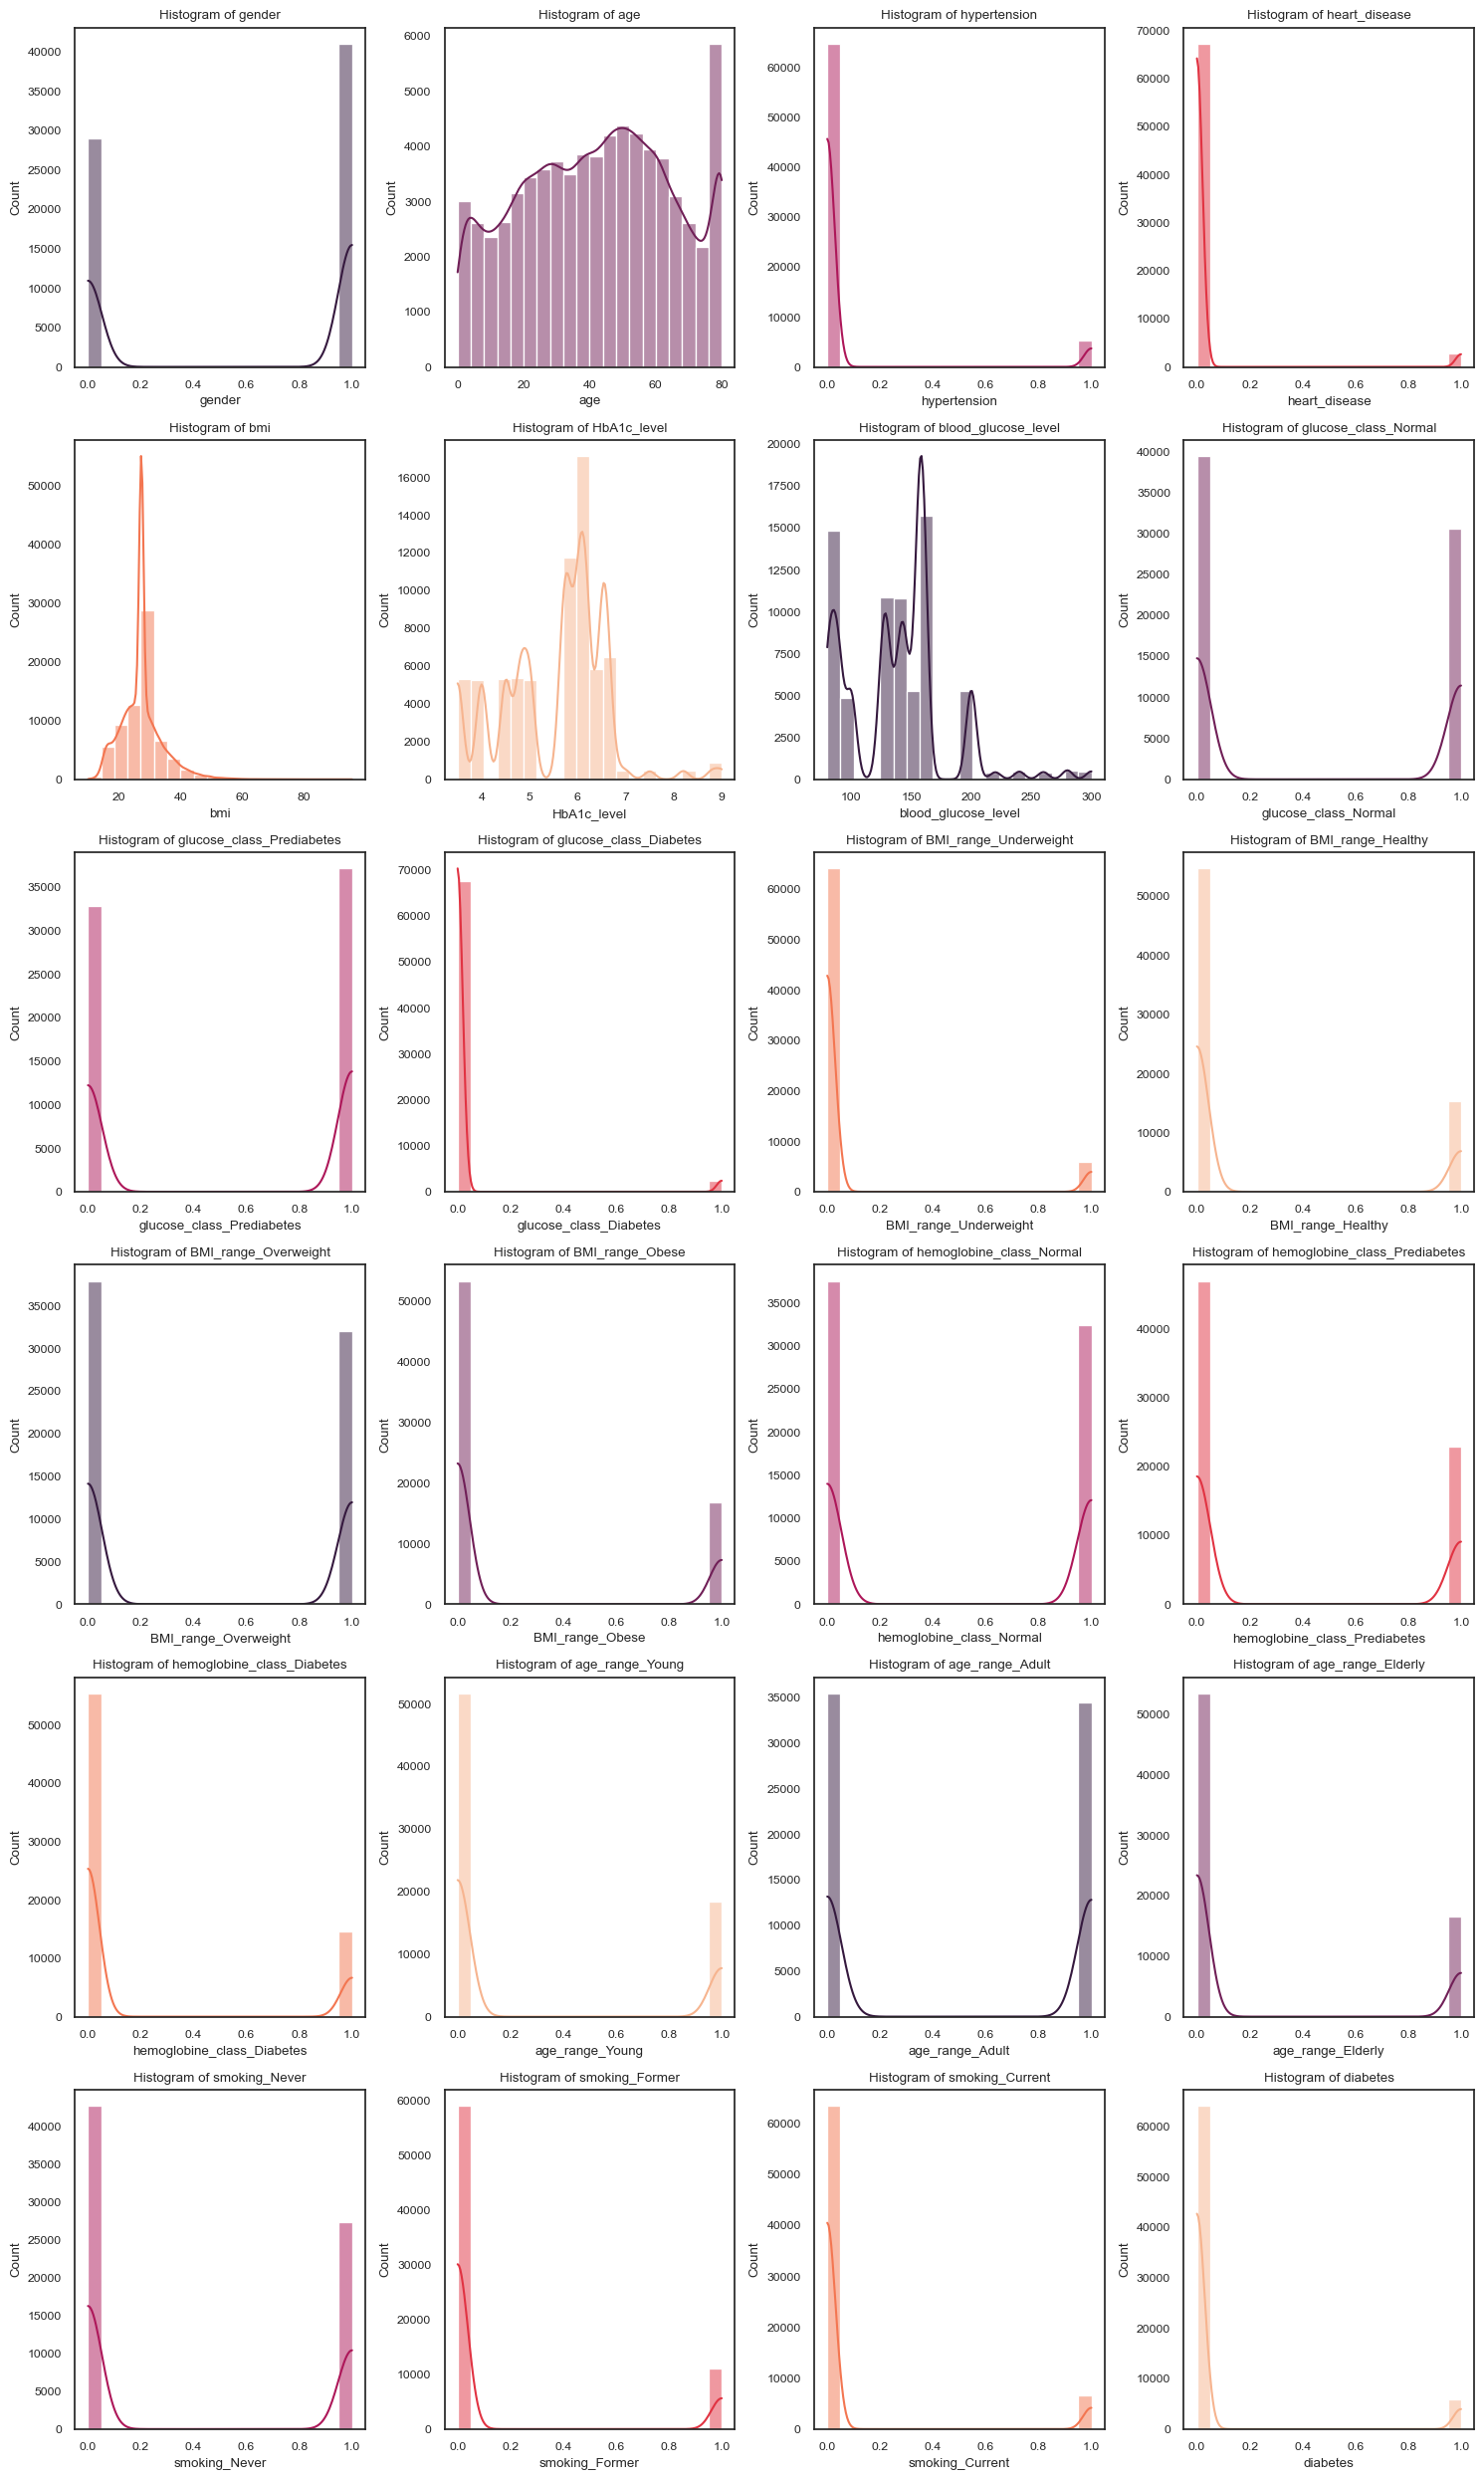

In [234]:
#HISTOGRAMS OF EACH FEATURE
fig, axes = plt.subplots(nrows=6, ncols=4, figsize=(15, 25))

axes = axes.flatten()
features = X_train.columns
palette = sns.color_palette('rocket') * 20

for i, feature in enumerate(features):
    color = palette[i]
    sns.histplot(X_train[feature], bins=20, kde=True, ax=axes[i], color=color)
    axes[i].set_title(f'Histogram of {feature}')

sns.histplot(y_train, bins=20, kde=True, ax=axes[23], color=palette[23])
axes[23].set_title(f'Histogram of diabetes')
plt.tight_layout()
plt.show()


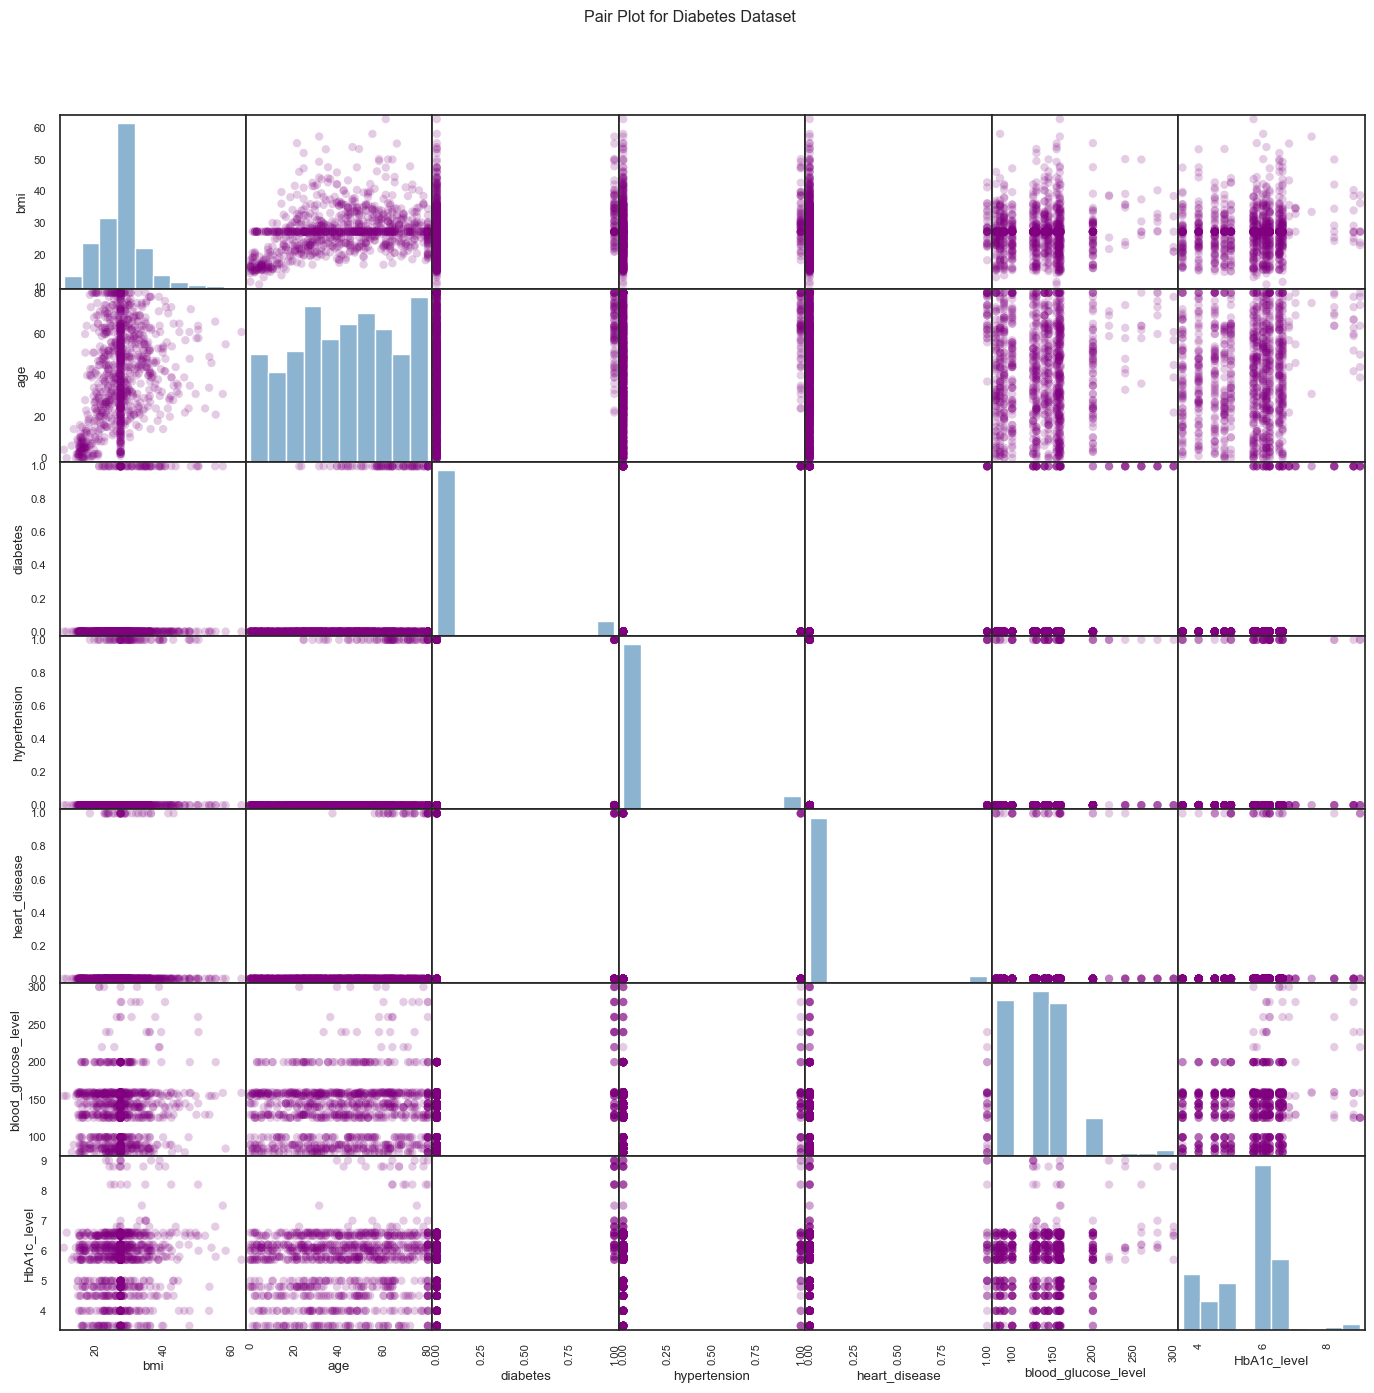

In [235]:
from pandas.plotting import scatter_matrix

# Combine the training data
data_combined = pd.concat([X_train, y_train], axis=1)

# Select features of interest
selected_features = ['bmi', 'age', 'diabetes', 'hypertension','heart_disease','blood_glucose_level','HbA1c_level'] 

# Select the first 1000 rows of your data for consistent sampling
sample_data = data_combined.head(1000)

# Select only the columns of interest
selected_data = sample_data[selected_features]
# Scatter matrix
scatter_matrix(selected_data, alpha=0.2, figsize=(15, 15), diagonal='hist', marker='o', color='purple')
plt.suptitle('Pair Plot for Diabetes Dataset', y=0.95)
plt.show()

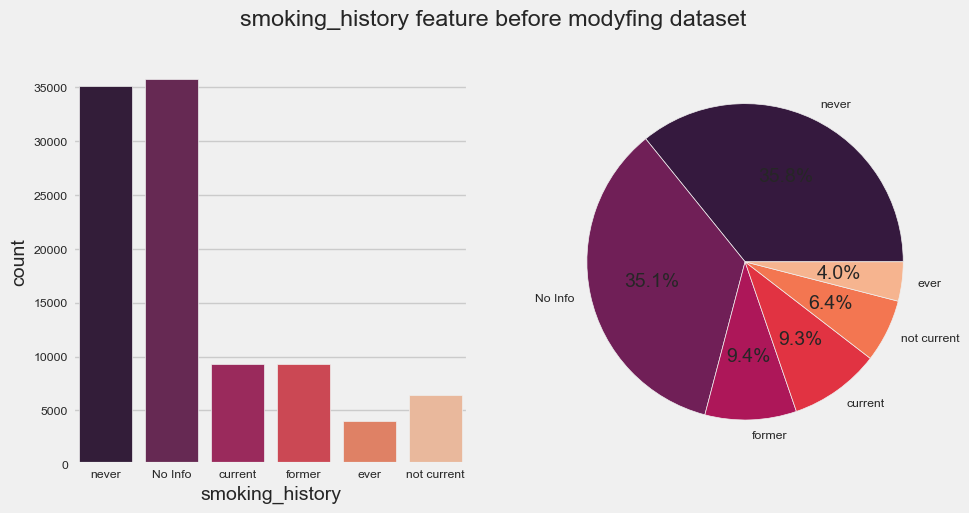

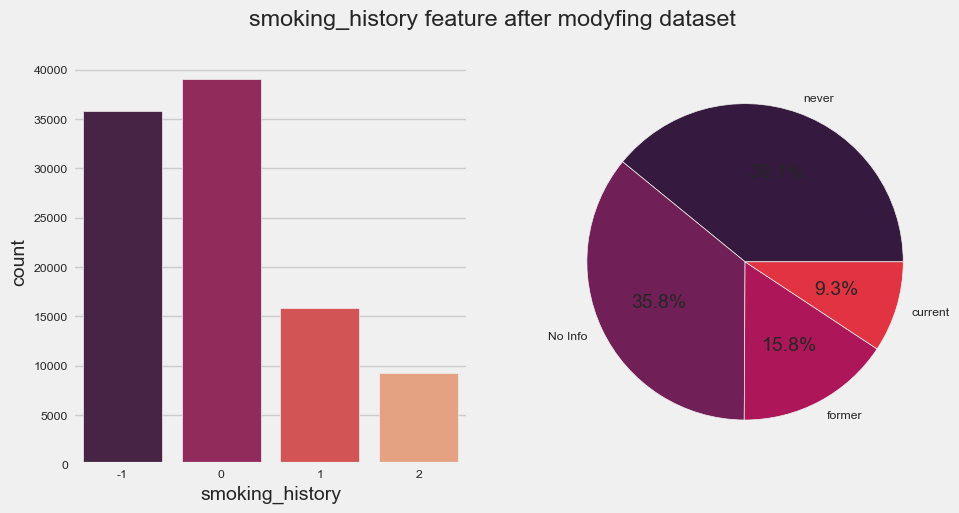

In [236]:
#SMOKING FEATURE - BEFORE AND AFTER HANDLING MISSING VALUES
def plot(dataset,labels,values,title):
    plt.style.use('fivethirtyeight')
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    sns.countplot(x=dataset['smoking_history'], data=dataset, palette="rocket")
    plt.subplot(1, 2, 2)
    plt.pie(values, labels=labels, autopct='%1.1f%%',colors=sns.color_palette('rocket'))
    plt.suptitle(title)
    plt.show()

labels = ['never', 'No Info', 'former', 'current', 'not current', 'ever']
values = dataset['smoking_history'].value_counts().values
plot(dataset,labels,values,"smoking_history feature before modyfing dataset")

labels = ["never","No Info","former","current"]
values = data1["smoking_history"].value_counts().values
plot(data1,labels,values,"smoking_history feature after modyfing dataset")


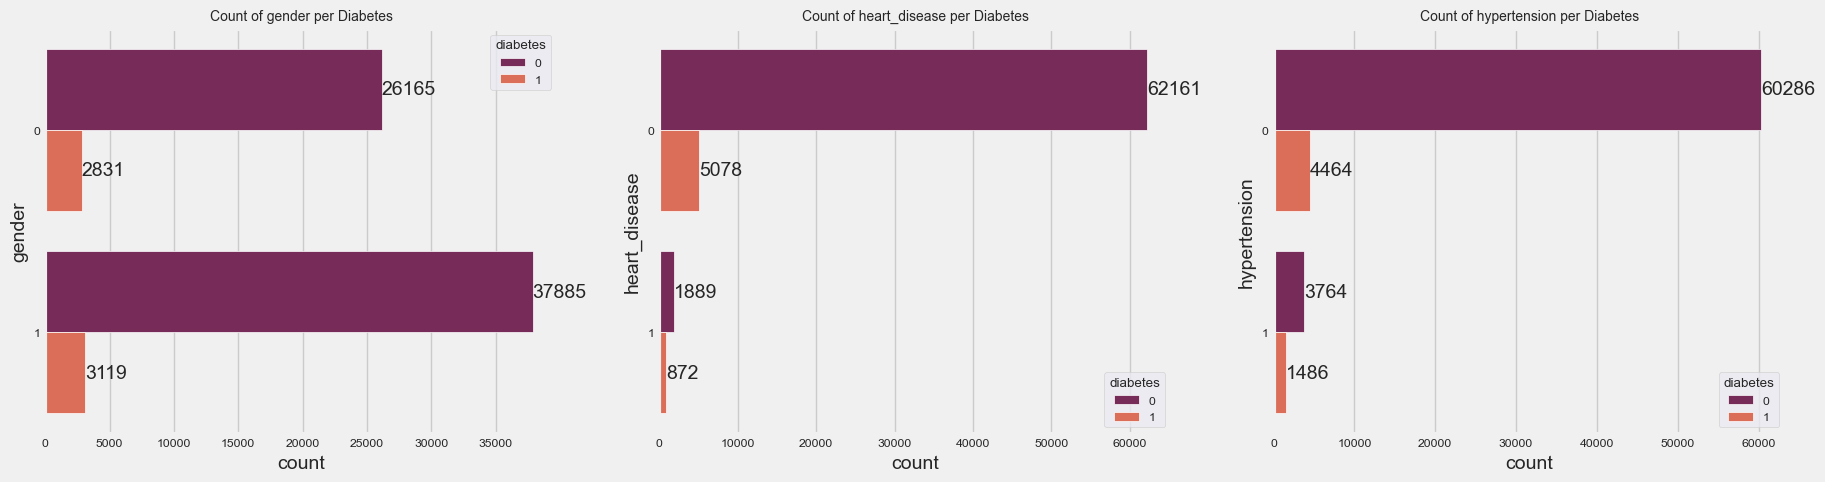

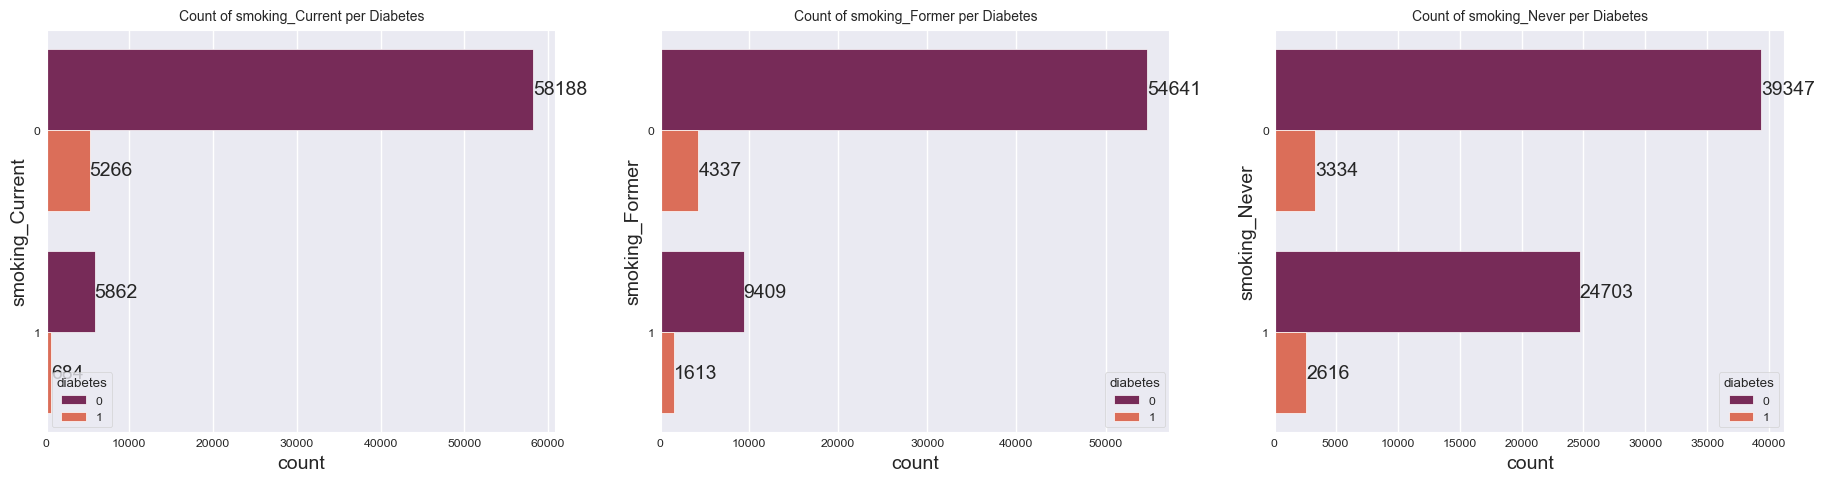

In [237]:
#COUNT OF DIABETES X O/1 FEATURES - gender / heart_disease / hypertension / smoking_Current / smoking_Former / smoking_Never
def makeplot(data,columns,hue):
    fig, axes = plt.subplots(nrows=1,ncols=len(columns),figsize=(20,5))
    sns.set_style("darkgrid")

    for i,col in enumerate(columns):
        sns.countplot(data=data, y=col, palette="rocket",orient="h",hue=hue,
                    ax= axes[i]).set_title(f'Count of {col} per Diabetes', fontsize='10')
        for container in axes[i].containers:
            axes[i].bar_label(container)

    plt.show()

makeplot(X_train,["gender","heart_disease","hypertension"],y_train)
makeplot(X_train,["smoking_Current","smoking_Former","smoking_Never"],y_train)

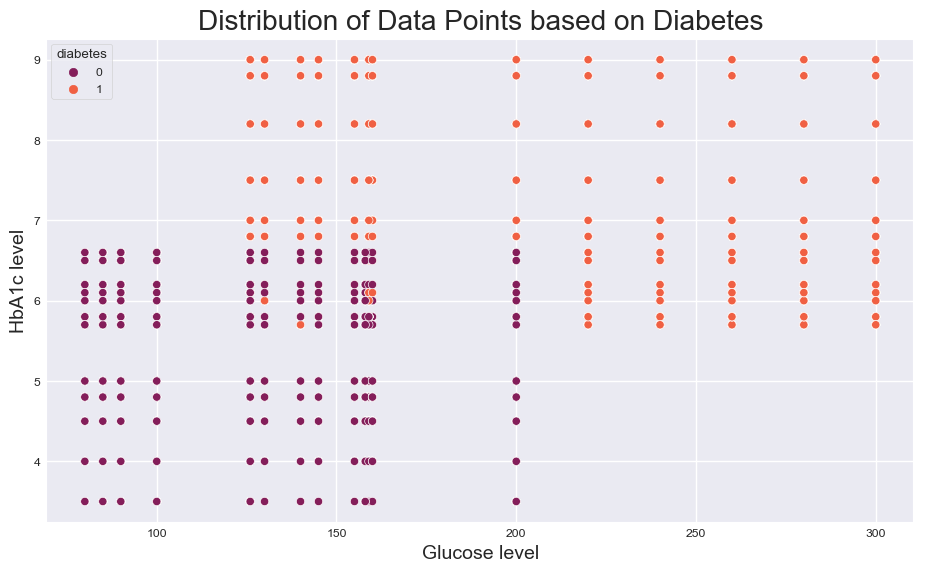

In [238]:
#COMPARING HBA1C LEVELS WITH GLUCOSE ON BLOOD LEVELS
plt.figure(figsize=(10, 6))
sns.scatterplot(x="blood_glucose_level", y='HbA1c_level', hue=y_train, data=X_train, palette='rocket', marker='o')
plt.title('Distribution of Data Points based on Diabetes')
plt.xlabel('Glucose level')
plt.ylabel('HbA1c level')
plt.show()

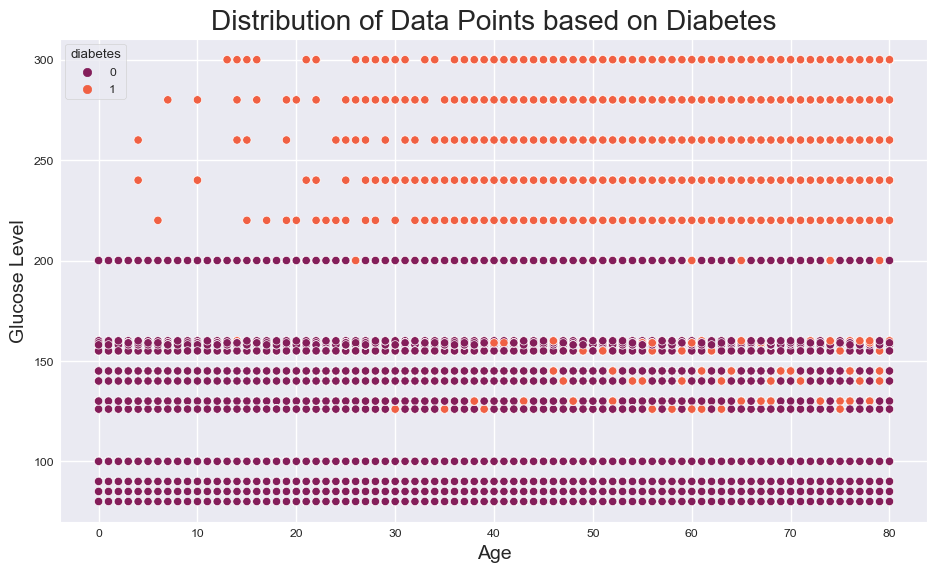

In [239]:
#COMPARING AGE WITH GLUCOSE LEVEL
plt.figure(figsize=(10, 6))
sns.scatterplot(x="age", y='blood_glucose_level', hue=y_train, data=X_train, palette='rocket', marker='o')
plt.title('Distribution of Data Points based on Diabetes')
plt.xlabel('Age')
plt.ylabel('Glucose Level')
plt.show()

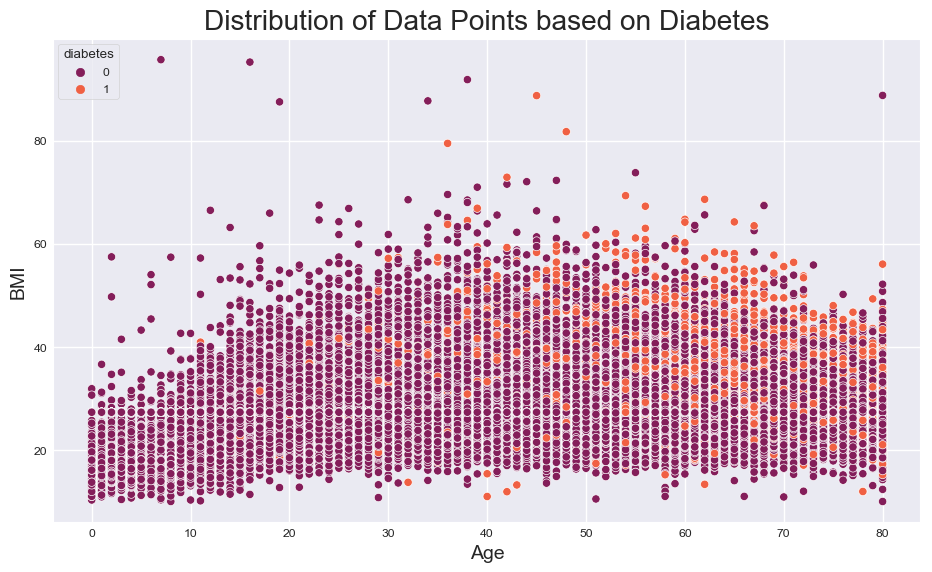

In [240]:
#COMPARING AGE WITH BMI
plt.figure(figsize=(10, 6))
sns.scatterplot(x="age", y='bmi', hue=y_train, data=X_train, palette='rocket', marker='o')
plt.title('Distribution of Data Points based on Diabetes')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.show()

-----

### <span style="color:pink">**Outlier detection**</span>

We will use the IQR method. Using the 1st quartile (0.25) and the 3th quartile (0.75). It is remarkable to say that for detecting outliers, we will only focus on the original features.


In [241]:
list_quartiles_features = []
for feature in X_train:
    Q1 = X_train[feature].quantile(0.25)
    Q3 = X_train[feature].quantile(0.75)
    IQR = Q3-Q1
    lower = Q1- 1.5*IQR
    upper = Q3 + 1.5*IQR
    list_quartiles_features.append([lower,upper])

    if X_train[(X_train[feature] > upper)].any(axis=None):
        print(feature,"yes")
    else:
        print(feature, "no")

data.head(5)

gender no
age no
hypertension yes
heart_disease yes
bmi yes
HbA1c_level yes
blood_glucose_level yes
glucose_class_Normal no
glucose_class_Prediabetes no
glucose_class_Diabetes yes
BMI_range_Underweight yes
BMI_range_Healthy yes
BMI_range_Overweight no
BMI_range_Obese yes
hemoglobine_class_Normal no
hemoglobine_class_Prediabetes no
hemoglobine_class_Diabetes yes
age_range_Young no
age_range_Adult no
age_range_Elderly yes
smoking_Never no
smoking_Former yes
smoking_Current yes


gender  age  hypertension  heart_disease    bmi  HbA1c_level  \
0       1   80             0              1  25.19          6.6   
1       1   54             0              0  27.32          6.6   
2       0   28             0              0  27.32          5.7   
3       1   36             0              0  23.45          5.0   
4       0   76             1              1  20.14          4.8   

   blood_glucose_level  diabetes  glucose_class_Normal  \
0                  140         0                     0   
1                   80         0                     1   
2                  158         0                     0   
3                  155         0                     0   
4                  155         0                     0   

   glucose_class_Prediabetes  ...  BMI_range_Obese  hemoglobine_class_Normal  \
0                          1  ...                0                         0   
1                          0  ...                0                         0   
2                          1  ...                0                         1   
3                          1  ...                0                         1   
4                          1  ...                0                         1   

   hemoglobine_class_Prediabetes  hemoglobine_class_Diabetes  age_range_Young  \
0                              0                           1                0   
1                              0                           1                0   
2                              0                           0                0   
3                              0                           0                0   
4                              0                           0                0   

   age_range_Adult  age_range_Elderly  smoking_Never  smoking_Former  \
0                0                  1              1               0   
1                1                  0              0               0   
2                1                  0              1               0   
3                1                  0              0               0   
4                0                  1              0               0   

   smoking_Current  
0                0  
1                0  
2                0  
3                1  
4                1  

[5 rows x 24 columns]

We see that aparently the features hypertension, heart_disease, bmi, HbA1c_level, blood_glucose_level and diabetes have outliers. But as hypertension, heart_disease and diabetes are a binary feature, we will not take into account these features. So the feautres remaining are: bmi, HbA1c_level and blood_glucose_level.

Now we will do a box plot to see more clearly where are the outliers for each variable.

Number of good parametrics=65085 and number of outliers=4915



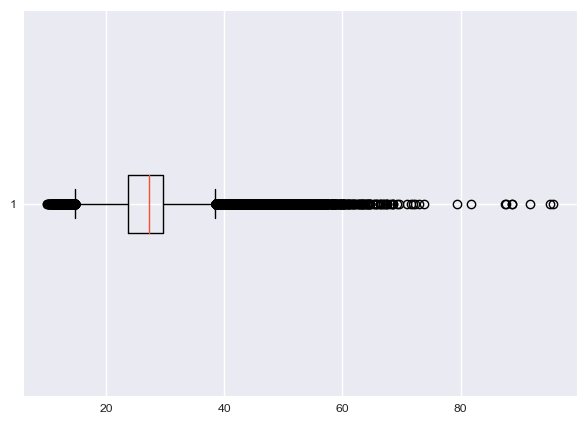

In [242]:
plt.boxplot(X_train["bmi"], notch=None, vert=False, patch_artist=None, widths=None)
X_train["bmi"].describe()

g = 0
o = 0
for i in X_train["bmi"]:
  if (list_quartiles_features[4][0] < i < list_quartiles_features[4][1]):
    g+=1
  else:
    o+=1

print(f"Number of good parametrics={g} and number of outliers={o}\n")

Number of good parametrics=69091 and number of outliers=909


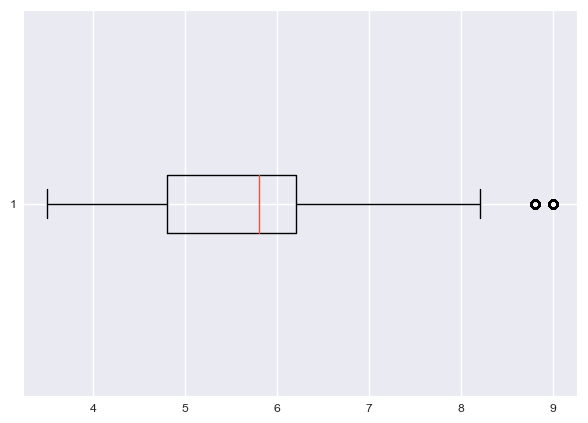

In [243]:
plt.boxplot(X_train["HbA1c_level"], notch=None, vert=False, patch_artist=None, widths=None)

g = 0
o = 0
for i in X_train["HbA1c_level"]:
  if (list_quartiles_features[5][0] < i < list_quartiles_features[5][1]):
    g+=1
  else:
    o+=1

print(f"Number of good parametrics={g} and number of outliers={o}\n")

Number of good parametrics=68565 and number of outliers=1435



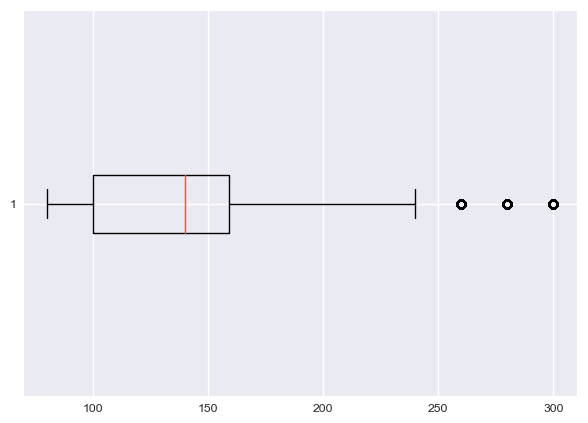

In [244]:
plt.boxplot(X_train["blood_glucose_level"], notch=None, vert=False, patch_artist=None, widths=None)

g = 0
o = 0
for i in X_train["blood_glucose_level"]:
  if (list_quartiles_features[6][0] < i < list_quartiles_features[6][1]):
    g+=1
  else:
    o+=1

print(f"Number of good parametrics={g} and number of outliers={o}\n")

Now we have seen how many outliers we have for each feature, we will do two options. The first one, dropping the outliers, and the second one conserving them.

In [245]:
# Combine the training data
X_combined = pd.concat([X_train, y_train], axis=1)

data_without_outliers = X_combined[( (list_quartiles_features[4][0] < X_combined["bmi"]) & (X_combined["bmi"] < list_quartiles_features[4][1] ) ) & ( (list_quartiles_features[5][0] < X_combined["HbA1c_level"]) & (X_combined["HbA1c_level"] < list_quartiles_features[5][1]) ) & ( (list_quartiles_features[6][0] < X_combined["blood_glucose_level"]) & (X_combined["blood_glucose_level"] < list_quartiles_features[6][1] ) )]

print(f"The length of the data with outliers is {len(X_combined)}, and the data without outliers is {len(data_without_outliers)}.\nThe number of points dropped is {len(X_combined) - len(data_without_outliers)}")

#Cheching if the data is balanced or not after we dropped the outliers
diabetes_positive = 0
diabetes_negative = 0
for row in data_without_outliers["diabetes"]:
    if row == 0:
        diabetes_negative += 1
    elif row == 1:
        diabetes_positive += 1
#Calculate balance
n_rows = X_combined.shape[0]
print(f"There are {diabetes_positive} diabetes cases and {diabetes_negative} no diabetes cases.")
print(f"    Balance: {(diabetes_positive/n_rows)*100}% of diabetes -- {(diabetes_negative/n_rows)*100}% of no diabetes.")

The length of the data with outliers is 70000, and the data without outliers is 63313.
The number of points dropped is 6687
There are 3177 diabetes cases and 60136 no diabetes cases.
    Balance: 4.538571428571428% of diabetes -- 85.90857142857142% of no diabetes.


But the outliers that we have observed are not relevant, as the information of each feature is related with others (i.e. age and bmi). So, instead of observing the outliers for each feature separately, we will observe the outliers between the features most correlated with scatterplots (shown in part "Analysis of the data" the correlation between features) and also with a boxplot.
- Age - hypertension (0.3)
- Age - heart_disease (0.2)
- Age - bmi (0.3)
- Age - HbA1c_level (0.1)
- Age - blood_glucose_level (0.1)
- Hypertension - bmi (0.1)
- hbA1c_level - blood_glucose_level (0.2)

Pd: we do not take into account relation with two binary features.


##### **1. Age - hypertension**

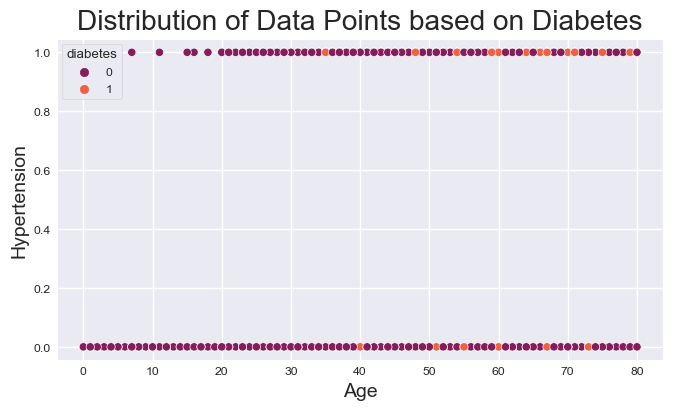

<Axes: xlabel='hypertension', ylabel='age'>

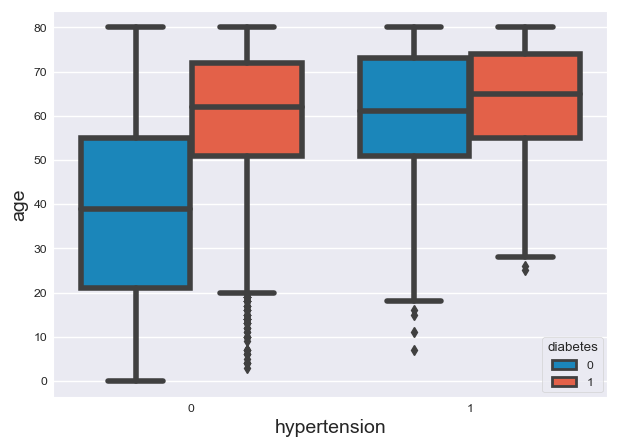

In [246]:
#COMPARING AGE WITH HYPERTENSION
plt.figure(figsize=(7, 4))
sns.scatterplot(x="age", y='hypertension', hue=y_train, data=X_train, palette='rocket', marker='o')
plt.title('Distribution of Data Points based on Diabetes')
plt.xlabel('Age')
plt.ylabel('Hypertension')
plt.show()
sns.boxplot(x=X_train["hypertension"], y=X_train["age"], hue=y_train)

  - People who do not have hypertension and are diagnosed with diabetes are much smaller than people who do not have diabetes. Also, in this section, there is an important quantity of young people with diabetes that we cannot consider outliers, as young people can have diabetes but related to another factor (not being hypertension).
  - Regarding people with hypertension who do not have diabetes, we have outliers because there are very young (below 20 years old). Talking about people with hypertension and diabetes, we should not consider significant outliers as they are not very far from the rest of the points.

In conclussion, with these two features related with the output of diabetes, we see that hypertension is related to age, seeing that as more older, more probable to have it. And with diabetes, we can conclude that is more common in older people (as the density of both boxes is on higher ages) and we could consider outliers  people with ages lower than 20s.

##### **2. Age - heart_disease**

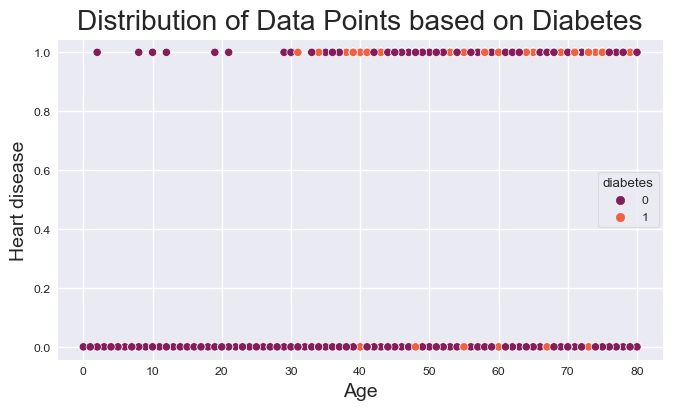

<Axes: xlabel='heart_disease', ylabel='age'>

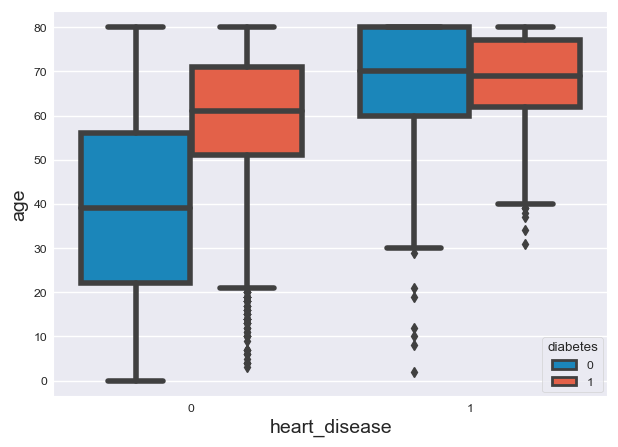

In [247]:
#COMPARING AGE WITH HEART DISEASE
plt.figure(figsize=(7, 4))
sns.scatterplot(x="age", y='heart_disease', hue=y_train, data=X_train, palette='rocket', marker='o')
plt.title('Distribution of Data Points based on Diabetes')
plt.xlabel('Age')
plt.ylabel('Heart disease')
plt.show()
sns.boxplot(x =X_train["heart_disease"], y=X_train["age"], hue = y_train)

  - We see that people who do not have heart disease and are diagnosed with diabetes are probable to be adult persons (between 50 and 70).
  - Regarding people with heart disease, we see that is more common in older people, but we have some outliers with young people who do not have diabetes. The important outlier here is one person around his/her thirties who have heart disease and is diagnosed with diabetes.

In conclussion, we can say there is a relationship between age and heart_disease, being more common to have it when you are older. But regarding diabetes, we cannot express a relationship between these features.

##### **3. Age -BMI**

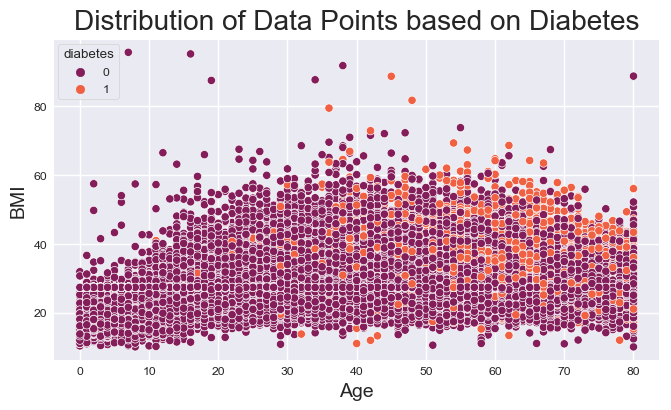

In [248]:
#COMPARING AGE WITH BMI
plt.figure(figsize=(7, 4))
sns.scatterplot(x="age", y='bmi', hue=y_train, data=X_train, palette='rocket', marker='o')
plt.title('Distribution of Data Points based on Diabetes')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.show()

#We do not do a box-plot here because we cannot see well the relationship between both variables and the outcome (diabetes)

  - Talking about age, we see that as more older you are, more probable to have diabetes.
  - Regarding bmi, we cannot establish a relationship with diabetes.
  - But we observe that a level of, for example, around 40 of bmi in a younger ages it is not probable to have diabetes, but as we grow, the probability of having diabetes is increased.
  - We observe some outliers regarding bmi. The most importants are: age around 20 and bmi around 90 diagnosed no diabetes; age around 40 and bmi around diagnosed no diabetes; and age around 50 and bmi around 80 diagnosed with diabetes. It may happen that these outliers can affect to some results of some calculations or models.
  - There are also some outliers not so visible that could affect to the results, for example some age passed 60 that have a higher value of bmi which is not diagnosed with diabetes.

In conclusion, we can establish a relationship between age, bmi and diabetes. As age increases and bmi also increases or not, the probability of having diabetes is increased.


##### **4. Age - Blood glucose level**

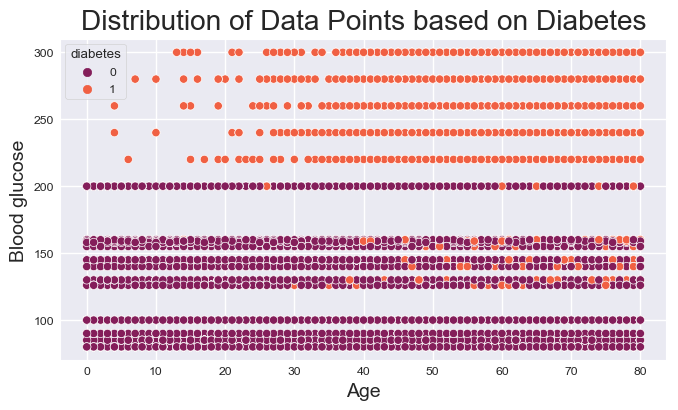

<Axes: xlabel='diabetes', ylabel='age'>

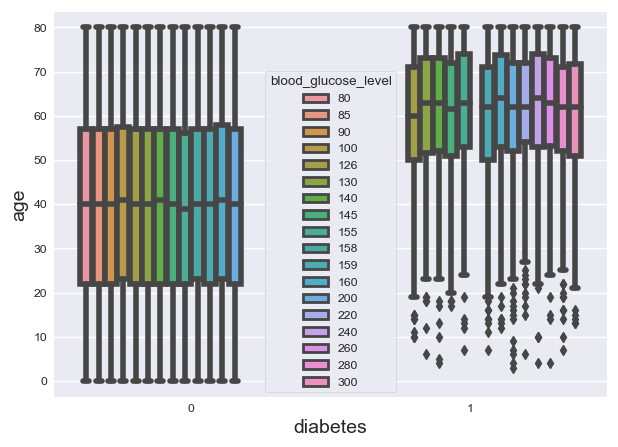

In [249]:
#COMPARING AGE LEVEL WITH BLOOD GLUCOSE LEVEL
plt.figure(figsize=(7, 4))
sns.scatterplot(x="age", y='blood_glucose_level', hue=y_train, data=X_train, palette='rocket', marker='o')
plt.title('Distribution of Data Points based on Diabetes')
plt.xlabel('Age')
plt.ylabel('Blood glucose')
plt.show()
sns.boxplot(x =y_train, y=X_train["age"], hue = X_train['blood_glucose_level'])

  - People not diagnosed of diabetes tend to have a blood glucose level below 200, and people not diagnosed with diabetes above this threshold it can be considered as an outlier (in this dataset we see that there is no outlier in this cathegory).
  - Regarding diabetic people in this dataset, we can see clearly that we have some important outliers: people with levels of blood glucose around 150 that have diabetes.
  - We also see that diabetic people tend to have a higher value of blood_glucose_level with higher age.

In conclussion, the blood glucose level can be related to age, but mostly is related with diabetes. There is some threshold that determines if you are diabetic or not, and people that do not follow this threshold are considered outliers and must be carefully obvserved and taken into acconut.

##### **5. Age - HbA1c_level**

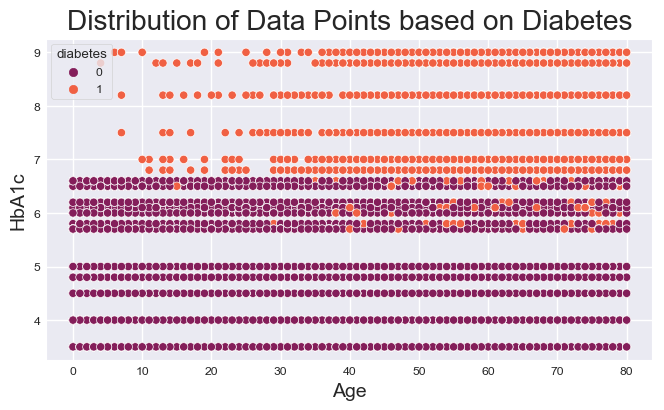

<Axes: xlabel='diabetes', ylabel='age'>

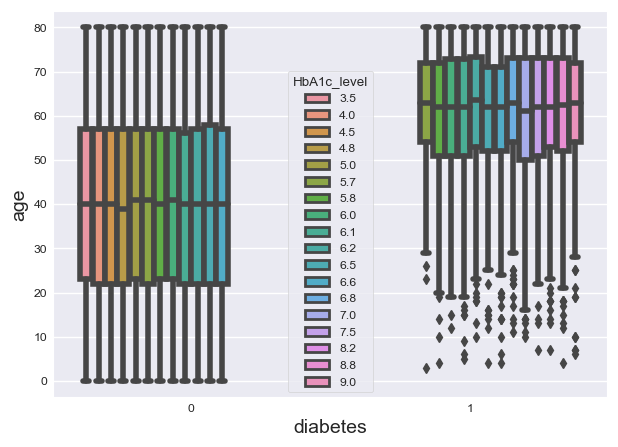

In [250]:
#COMPARING AGE LEVEL WITH HBA1C LEVEL
plt.figure(figsize=(7, 4))
sns.scatterplot(x="age", y='HbA1c_level', hue=y_train, data=X_train, palette='rocket', marker='o')
plt.title('Distribution of Data Points based on Diabetes')
plt.xlabel('Age')
plt.ylabel('HbA1c')
plt.show()
sns.boxplot(x =y_train, y=X_train["age"], hue = X_train['HbA1c_level'])

  - Simmilar to what happens with age and blood_glucose_level. It seems that people not diagnosed of diabetes tend to have a HbA1c_level below 6.5, and people not diagnosed with diabetes above this threshold it can be considered as an outlier (in this dataset we see that there is no outlier in this cathegory).
  - Regarding diabetic people in this dataset, we can see clearly that we have some important outliers: people with levels of blood glucose around 6.5 and below that have diabetes.
  - We also see that diabetic people tend to have a higher value of Hba1c_level with higher age.

In conclussion, the HbA1c_level can be related to age, but mostly is related with diabetes. There is some threshold that determines if you are diabetic or not, and people that do not follow this threshold are considered outliers and must be carefully obvserved and taken into acconut.

##### **6. BMI - Hypertension**

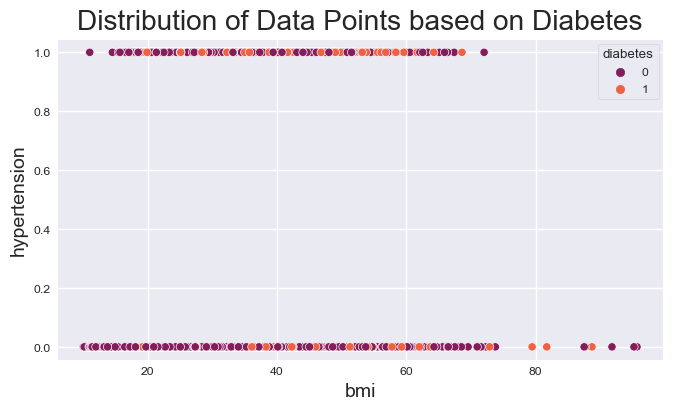

<Axes: xlabel='diabetes', ylabel='bmi'>

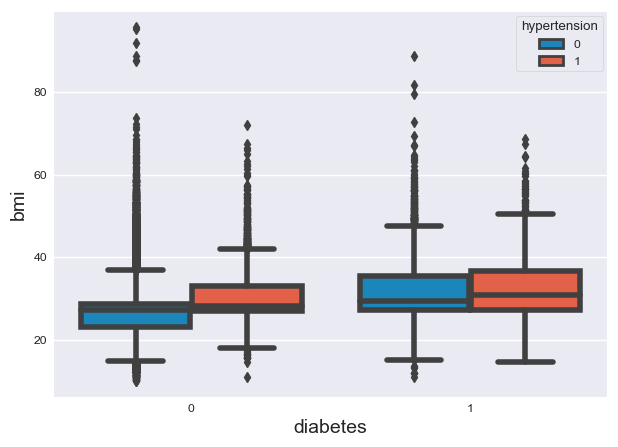

In [251]:
#COMPARING HYPERTENSION WITH BMI
plt.figure(figsize=(7, 4))
sns.scatterplot(x="bmi", y='hypertension', hue=y_train, data=X_train, palette='rocket', marker='o')
plt.title('Distribution of Data Points based on Diabetes')
plt.xlabel('bmi')
plt.ylabel('hypertension')
plt.show()
sns.boxplot(x =y_train, y=X_train["bmi"], hue = X_train['hypertension'])

  - We see that people who have hypertension tend to have higher values of bmi.
  - Regarding bmi, we cannot establish a relationship with hypertension, as values are simmilar in both cases and do not determine if you have diabetes or not.
  - It seems that we have outliers regarding levels of bmi, but we do not consider them important as it seems they do not affect the outcome.

In summary, we cannot establish a relationship between this two features and diabetes. We see some outliers but we do not consider them important as it seems they do not affect the outcome.

##### **7. HbA1c_level - Blood glucose levels**

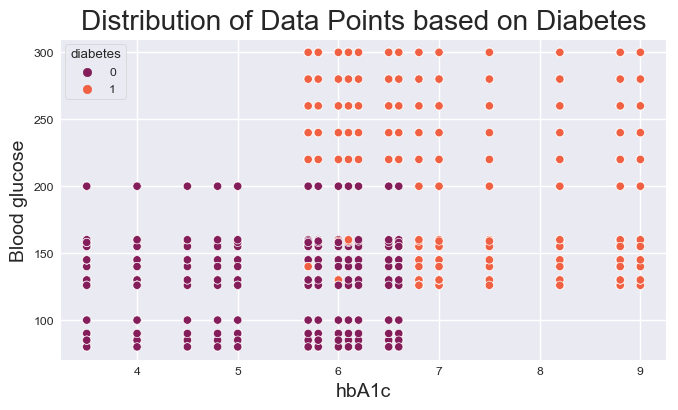

<Axes: xlabel='diabetes', ylabel='blood_glucose_level'>

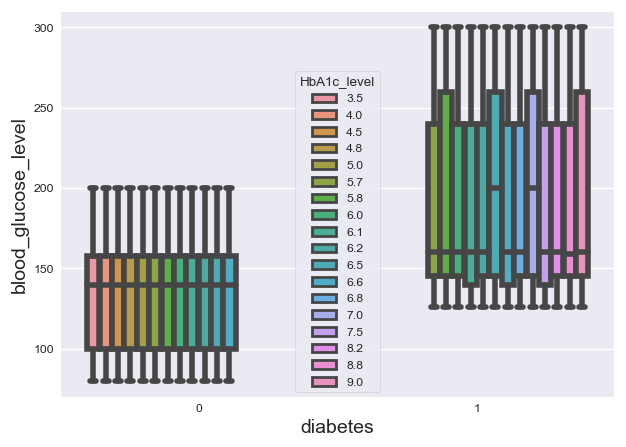

In [252]:
#COMPARING HBA1C LEVEL WITH BLOOD GLUCOSE LEVEL
plt.figure(figsize=(7, 4))
sns.scatterplot(x="HbA1c_level", y='blood_glucose_level', hue=y_train, data=X_train, palette='rocket', marker='o')
plt.title('Distribution of Data Points based on Diabetes')
plt.xlabel('hbA1c')
plt.ylabel('Blood glucose')
plt.show()
sns.boxplot(x =y_train, y=X_train["blood_glucose_level"], hue = X_train['HbA1c_level'])

  - We can see clearly that there is a relationship between these two variables and the outcome of diabetes.
  - If you have low value of HbA1c you can know you do not have diabetes, but if you have a high value then you could not know for sure if you have it or not.
  - Blood glucose level, as we have seen before, it seems that have a threshold. But when we connect the value of blood glucose with HbA1c we see that the threshold does not maintain.
  - We can see clearly outliers of diabetes people in what we can establish as the cluster of non-diabetic ones.

In conclussion, there is a relationship between these two features and the outcome. If you have high values on both features, you will probably have diabetes, and vice versa. But there is a space when these two features "connect" where we observe some outliers.

#### **Conclusion**

We observe some outliers regarding features (for example HbA1c), but as these features can depend on some others (as we see with HbA1c and Blood glucose level) we cannot drop these points because there might be important in the feature.
We decided that we will keep the outliers in our project, due to in reality people with what seems good paramets have diabetes.


----

### <span style="color:pink">**Feature Scaling**</span>
We will try different methods for scaling our features and then choose which is the best for our problem. 
- Methods: Robust Scaler, Standard Scaler, MinMaxScaler.

#### **1. Robust Scaling**

Robust Scaler uses the median and interquartile range, making it less sensitive to outliers compared to the mean and standard deviation used by Standard Scaler, so it is suitable for our dataset since it has outliers that we want to keep.

In [253]:
#STANDARIZE DATA - Robust Scaling
def RobustScaling (column):
    col_median = column.median()
    quartile1 = column.quantile(0.25)
    quartile3 = column.quantile(0.75)
    interquantile_range = quartile3 - quartile1

    if int(interquantile_range) == 0:
        quartile1 = column.quantile(0.01)
        quartile3 = column.quantile(0.99)
        interquantile_range = quartile3 - quartile1

        if int(interquantile_range) == 0:
            quartile1 = column.quantile(0.01)
            quartile3 = column.quantile(0.99)
            interquantile_range = quartile3 - quartile1
            z = (column - col_median) / interquantile_range
            return round(z,3)

        z = (column - col_median) / interquantile_range
        return round(z,3)

    else:
        z = (column - col_median) / interquantile_range
    return round (z,3)

def scaleRobust(data):
    scaled = data.copy()
    for column in scaled.columns:
        scaled[column] = RobustScaling(scaled[column])
    return scaled

scaled1 = scaleRobust(X_train)
scaled1.tail()



gender    age  hypertension  heart_disease    bmi  HbA1c_level  \
76498     0.0  0.250           0.0            0.0 -0.259        0.571   
74762     0.0  1.028           0.0            1.0 -0.387       -1.286   
27474     0.0  0.028           0.0            0.0  1.124        0.500   
81411    -1.0  0.222           1.0            0.0  0.982        0.500   
30714     0.0 -0.639           0.0            0.0  0.000        0.571   

       blood_glucose_level  glucose_class_Normal  glucose_class_Prediabetes  \
76498                0.000                   0.0                        0.0   
74762                0.000                   0.0                        0.0   
27474                1.017                   0.0                        0.0   
81411                0.339                   0.0                        0.0   
30714                0.254                   0.0                        0.0   

       glucose_class_Diabetes  ...  BMI_range_Obese  hemoglobine_class_Normal  \
76498                     0.0  ...              0.0                       0.0   
74762                     0.0  ...              0.0                       1.0   
27474                     0.0  ...              1.0                       0.0   
81411                     0.0  ...              1.0                       0.0   
30714                     0.0  ...              0.0                       0.0   

       hemoglobine_class_Prediabetes  hemoglobine_class_Diabetes  \
76498                            0.0                         1.0   
74762                            0.0                         0.0   
27474                            0.0                         1.0   
81411                            0.0                         1.0   
30714                            0.0                         1.0   

       age_range_Young  age_range_Adult  age_range_Elderly  smoking_Never  \
76498              0.0              1.0                0.0            1.0   
74762              0.0              0.0                1.0            1.0   
27474              0.0              1.0                0.0            0.0   
81411              0.0              1.0                0.0            0.0   
30714              1.0              0.0                0.0            1.0   

       smoking_Former  smoking_Current  
76498             0.0              0.0  
74762             0.0              0.0  
27474             1.0              0.0  
81411             1.0              0.0  
30714             0.0              0.0  

[5 rows x 23 columns]

#### **2. Standard Scaler**

The Standard Scaler assumes tha data is normally distributed, which mean that it will be sensitive to outliers. This may not be the best option since our dataset contains outliers that we don't want to remove for information purposes.

In [254]:
#STANDARIZE DATA: Standard Scaler
def scaleStandard(data):
    scaled = data.copy()
    scaler = StandardScaler()
    scaler.fit(scaled)
    scaled = scaler.transform(scaled)
    scaled = pd.DataFrame(scaled, index=data.index, columns=data.columns)
    return scaled

scaled2 = scaleStandard(X_train)
scaled2.tail()

gender       age  hypertension  heart_disease       bmi  HbA1c_level  \
76498  0.840922  0.449695     -0.284747      -0.202639 -0.233494     1.004423   
74762  0.840922  1.692945     -0.284747       4.934889 -0.348229    -1.429611   
27474  0.840922  0.094481     -0.284747      -0.202639  1.008961     0.910806   
81411 -1.189170  0.405293      3.511885      -0.202639  0.880640     0.910806   
30714  0.840922 -0.971162     -0.284747      -0.202639 -0.001006     1.004423   

       blood_glucose_level  glucose_class_Normal  glucose_class_Prediabetes  \
76498             0.047826             -0.880101                   0.940806   
74762             0.047826             -0.880101                   0.940806   
27474             1.519779             -0.880101                   0.940806   
81411             0.538477             -0.880101                   0.940806   
30714             0.415814             -0.880101                   0.940806   

       glucose_class_Diabetes  ...  BMI_range_Obese  hemoglobine_class_Normal  \
76498               -0.184857  ...        -0.560521                 -0.929507   
74762               -0.184857  ...        -0.560521                  1.075840   
27474               -0.184857  ...         1.784054                 -0.929507   
81411               -0.184857  ...         1.784054                 -0.929507   
30714               -0.184857  ...        -0.560521                 -0.929507   

       hemoglobine_class_Prediabetes  hemoglobine_class_Diabetes  \
76498                      -0.699227                    1.950654   
74762                      -0.699227                   -0.512649   
27474                      -0.699227                    1.950654   
81411                      -0.699227                    1.950654   
30714                      -0.699227                    1.950654   

       age_range_Young  age_range_Adult  age_range_Elderly  smoking_Never  \
76498        -0.595588         1.013810          -0.555832       1.249928   
74762        -0.595588        -0.986378           1.799104       1.249928   
27474        -0.595588         1.013810          -0.555832      -0.800046   
81411        -0.595588         1.013810          -0.555832      -0.800046   
30714         1.679013        -0.986378          -0.555832       1.249928   

       smoking_Former  smoking_Current  
76498       -0.432300        -0.321187  
74762       -0.432300        -0.321187  
27474        2.313209        -0.321187  
81411        2.313209        -0.321187  
30714       -0.432300        -0.321187  

[5 rows x 23 columns]

#### **3. MinMax Scaler**

MinMax Scaler scales features to a specific range, usually 0 to 1, which is suitable for algorithms that are sensitive to the magnitude of values. However, it can be sensitive to outliers in certain situations and may not perform well with algorithms that assume normal distribution.

In [255]:
#STANDARIZE DATA: MINMAX SCALER
from sklearn.preprocessing import MinMaxScaler

def scaleMinMax(data):
    scaled = data.copy()
    scaler = MinMaxScaler()
    scaler.fit(scaled)
    scaled = scaler.transform(scaled)
    scaled = pd.DataFrame(scaled, index=data.index, columns=data.columns)
    return scaled

scaled3 = scaleMinMax(X_train)
scaled3.tail(10)


gender     age  hypertension  heart_disease       bmi  HbA1c_level  \
37268     1.0  0.6875           0.0            0.0  0.304388     0.963636   
32138     0.0  0.0500           0.0            0.0  0.202031     0.181818   
87532     1.0  0.0875           0.0            0.0  0.202031     0.563636   
44257     1.0  0.3125           0.0            0.0  0.127218     0.454545   
13608     0.0  0.7375           0.0            0.0  0.202031     0.181818   
76498     1.0  0.6500           0.0            0.0  0.184057     0.563636   
74762     1.0  1.0000           0.0            1.0  0.175187     0.090909   
27474     1.0  0.5500           0.0            0.0  0.280112     0.545455   
81411     0.0  0.6375           1.0            0.0  0.270191     0.545455   
30714     1.0  0.2500           0.0            0.0  0.202031     0.563636   

       blood_glucose_level  glucose_class_Normal  glucose_class_Prediabetes  \
37268             0.272727                   0.0                        1.0   
32138             0.000000                   1.0                        0.0   
87532             0.354545                   0.0                        1.0   
44257             0.354545                   0.0                        1.0   
13608             0.545455                   0.0                        1.0   
76498             0.272727                   0.0                        1.0   
74762             0.272727                   0.0                        1.0   
27474             0.545455                   0.0                        1.0   
81411             0.363636                   0.0                        1.0   
30714             0.340909                   0.0                        1.0   

       glucose_class_Diabetes  ...  BMI_range_Obese  hemoglobine_class_Normal  \
37268                     0.0  ...              1.0                       0.0   
32138                     0.0  ...              0.0                       1.0   
87532                     0.0  ...              0.0                       0.0   
44257                     0.0  ...              0.0                       0.0   
13608                     0.0  ...              0.0                       1.0   
76498                     0.0  ...              0.0                       0.0   
74762                     0.0  ...              0.0                       1.0   
27474                     0.0  ...              1.0                       0.0   
81411                     0.0  ...              1.0                       0.0   
30714                     0.0  ...              0.0                       0.0   

       hemoglobine_class_Prediabetes  hemoglobine_class_Diabetes  \
37268                            0.0                         1.0   
32138                            0.0                         0.0   
87532                            0.0                         1.0   
44257                            1.0                         0.0   
13608                            0.0                         0.0   
76498                            0.0                         1.0   
74762                            0.0                         0.0   
27474                            0.0                         1.0   
81411                            0.0                         1.0   
30714                            0.0                         1.0   

       age_range_Young  age_range_Adult  age_range_Elderly  smoking_Never  \
37268              0.0              1.0                0.0            0.0   
32138              1.0              0.0                0.0            0.0   
87532              1.0              0.0                0.0            0.0   
44257              1.0              0.0                0.0            0.0   
13608              0.0              1.0                0.0            0.0   
76498              0.0              1.0                0.0            1.0   
74762              0.0              0.0                1.0            1.0   
27474              0.0          

-----
----

## <span style="color:pink">Modelization</span>

### **Modelization options**
Let's first consider the diferent models that we have worked with during the curs. Besides we need to decide which ones will work with our binary classification model.
- Logistic regresion: useful for predicting the likelihood of a user having diabetes based on various numerical features.
- Decision trees: it handle both numerical and categorical features and provides an interpretable model.
- Random forest classifier: goal is to predict a discrete label or category. (Ex: predict whether an email is spam or not spam).
- Support vector machines (SVM): is effective for high-dimensional datasets and can use different kernel functions to transform the feature space.
- Ensamble learning: it combines the predictions from several models to improve overall accuracy.
- Bayesian indiference and Naive Bayes: useful if the features are independent of each other.

Neverthless there are some models that can not be used such as:
- Linear Regression: the output of Linear Regression is a continuous value, while we need a binary output (yes/no).
- Multiple Regression and Polynomial Regression: they are not classification methods, so they would not be suitable for a binary classification task.
- Random forest regression: goal is predicting a continuous value. (Ex: predicting a house price based in size and location)
- Multi-class Classification: used when there are more than two classes to predict, which is not the case in binary classification.
- Case-Based Reasoning: is used in recommendation systems and might not be the most suitable for binary classification.
- Expectation Maximisation and GMMs: These methods are primarily used for clustering and density estimation.


Lastly, there is one that we will like to find out how it works out:
- Genetic Algorithms: Although these can be used in machine learning, they are typically more useful for optimization and searching for solutions in large search spaces.

In [256]:
#Classifiers
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

#Metrics
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_curve, roc_auc_score, precision_score, recall_score, f1_score, RocCurveDisplay
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import precision_recall_curve

#matplotlib
from matplotlib.colors import ListedColormap

import math


In [257]:
#Fit and scale the training and validation sets
cols = X_train.columns
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_train = pd.DataFrame(X_train, columns=[cols])
X_val = pd.DataFrame(X_val, columns=[cols])

#Also fit and scale the testing set for the final comprobation
X_test = scaler.transform(X_test)
X_test = pd.DataFrame(X_test, columns=[cols])

In [184]:
def metrics_calculator(y_test, y_pred, clf_name):
    '''
    Calculates various performance metrics for a given model.
    '''
    accuracy = (accuracy_score(y_test, y_pred))*100
    precision = (precision_score(y_test, y_pred, average='macro'))*100
    recall = (recall_score(y_test, y_pred, average='macro'))*100
    f1 = (f1_score(y_test, y_pred, average='macro'))*100

    confusion_mat = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = confusion_mat.ravel()

    classification_error = ((fp + fn) / (tp + tn + fp + fn))*100
    accuracy_positive = (tp / (tp + fn))*100
    accuracy_negative = (tn / (tn + fp))*100
    total_positive = tp + fn
    total_negative = tn + fp

    model_metrics = pd.DataFrame(data={
        'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-score', 'Classification Error',
                   'Accuracy Positive Cases', 'Accuracy Negative Cases'],
        clf_name: [accuracy, precision, recall, f1, classification_error,
                  accuracy_positive, accuracy_negative]
    })

    return model_metrics

def plot_best_parameters(grid_search):
    """
    Plot the best hyperparameters
    """
    results = pd.DataFrame(grid_search.cv_results_)
    plt.figure(figsize=(8, 6))
    sns.lineplot(data=results, x='param_classifier__n_estimators', y='mean_test_score',
                 hue='param_classifier__max_depth', palette='rocket')
    plt.title('Hyperparameters Tuning Results')
    plt.xlabel('Number of Estimators')
    plt.ylabel('Mean Test Score')
    plt.show()

def plot_confusionMatrix(clf,clf_name,X_test,y_test):
    """
    Plot the confusion matrix
    """
    fig, ax = plt.subplots(figsize=(8, 5), dpi=90)
    sns.set_style('darkgrid')
    sns.set_palette("flare")
    ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, ax=ax, colorbar=False, cmap="Purples")
    plt.title(f'Confusion Matrix of {clf_name}')
    plt.grid()

def plot_rocCurve(clf,clf_name,X_test,y_test):
    """
    Plot the ROC Curve
    """
    fig, ax = plt.subplots(figsize=(8, 5), dpi=90)
    RocCurveDisplay.from_estimator(clf, X_test, y_test, ax=ax, name=clf_name)
    plt.plot([0, 1], [0, 1], linestyle='--', linewidth=2)
    sns.set_style('darkgrid')
    plt.title(f"Roc Curve of {clf_name}")
    plt.show()

def plot_precision_recall_curve(name,precision,recall):
    """ 
    Plot precision-recall curve
    """
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, color='blue', label='Precision-Recall Curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve for '+str(name))
    plt.legend()
    plt.show()

def plot_importance_features(name,feature_names, coef):
    """ 
    Plot importance level of features
    """
    coef_list = coef.tolist()  # Convert NumPy array to a list
    feature_names = [str(name) for name in feature_names]  # Ensure feature names are strings
    plt.figure(figsize=(10, 6))
    plt.barh(feature_names, coef_list, color='purple')
    plt.xlabel('Coefficient Value')
    plt.title('Feature Importance for '+ str(name))
    plt.show()


In [185]:
#EXTRA FUNCTIONS FOR VISUALIZATION OF DECISION BOUNDARIES
def plot_decision_boundary_tree(X, y, model, title="Decision Boundary"):
    """ 
    Plot decision boundary 
    """
    h = .02  # step size in the mesh

    # Train a model using all features
    model.fit(X, y)

    # Create a mesh grid for the decision boundary
    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Predict the labels for each point in the mesh grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Create a color plot
    cmap_background = ListedColormap(['#FFAAAA', '#AAAAFF'])
    plt.contourf(xx, yy, Z, cmap=cmap_background, alpha=0.3)

    # Plot the training points
    cmap_points = ListedColormap(['#FF0000', '#0000FF'])
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=cmap_points, edgecolors='k', s=20)
    plt.title(title)
    plt.xlabel(X.columns[0])  # Assuming the column names are meaningful
    plt.ylabel(X.columns[1])
    plt.show()

CMAP = plt.cm.tab10  # Color palette

def plot_decision_boundaries2D(clf: object, X_train, X_test, y_train, y_test, xlabel="X1", ylabel="X2", 
                               plot_train=True, plot_test=True, cmap: ListedColormap=CMAP):
    """
    Plots the decision boundaries and training and test data points.
    """
    n_new_points = 100
    X = np.vstack((X_train, X_test))
    x1, x2 = X[:, 0], X[:, 1]
    x1s = np.linspace(math.floor(x1.min()), math.ceil(x1.max()), n_new_points)
    x2s = np.linspace(math.floor(x2.min()), math.ceil(x2.max()), n_new_points)
    x1_new, x2_new = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1_new.ravel(), x2_new.ravel()]
    y_pred = clf.predict(X_new).reshape(x1_new.shape)
    
    # Plot Training data points
    if plot_train:
        plt.scatter(X_train[:, 0], X_train[:, 1], c=cmap(y_train), alpha=0.3,
                    marker="o", label="Training")
    # Plot Test data points
    if plot_test:
        miss = y_test != clf.predict(X_test)
        plt.scatter(X_test[~miss][:, 0], X_test[~miss][:, 1], c=cmap(y_test[~miss]), edgecolor="k", 
                    marker="o", label="Test correctly classified")
        plt.scatter(X_test[miss][:, 0], X_test[miss][:, 1], c=cmap(y_test[miss]), edgecolor="r",
                    marker="D", label="Test misclassified")
    # Plot Decision Boundaries
    plt.contourf(x1_new, x2_new, y_pred, alpha=0.05)
    # Configure plot
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xlim([x1s.min(), x1s.max()])
    plt.ylim([x2s.min(), x2s.max()])
    plt.suptitle(f"Decision boundaries of the '{clf.__class__.__name__}''")
    plt.title("with Training and Test data points")
    if plot_train or plot_test:
        plt.legend()

def plot_prediction(true_f, fit_predictor, X_train, X_test, y_train, y_test, n_points=100):
    """
    Plots the true underlying function, training data and predictions and computes MAEs.
    """
    # Prediction points for plotting only
    X1_plot = np.linspace(X_train.iloc[:, 0].min(), X_train.iloc[:, 0].max(), n_points)
    X2_plot = np.linspace(X_train.iloc[:, 1].min(), X_train.iloc[:, 1].max(), n_points)
    X1_plot, X2_plot = np.meshgrid(X1_plot, X2_plot)
    X_plot = np.c_[X1_plot.ravel(), X2_plot.ravel()]
    # Training data
    plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train, cmap="viridis", marker=".", label="training data")
    # Predictions for the X_plot
    y_pred = fit_predictor.predict(X_plot).reshape(X1_plot.shape)
    plt.contourf(X1_plot, X2_plot, y_pred, alpha=0.3, cmap="viridis")
    # Mean Absolute Errors
    y_true = true_f(X_test.iloc[:, 0])
    y_pred = fit_predictor.predict(X_test)
    mae_true = np.mean(np.abs(y_true - y_pred))  # MAE on true function
    mae_test = np.mean(np.abs(y_test - y_pred))  # MAE on test set
    plt.title(f"MAE True:{mae_true:.4f}, MAE Test:{mae_test:.4f}")
    plt.legend()
    plt.show()

# Apply PCA and keep the first two principal components to do prediction boundaries classification
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_val_pca = pca.transform(X_val)

### **1. Logistic regresion**

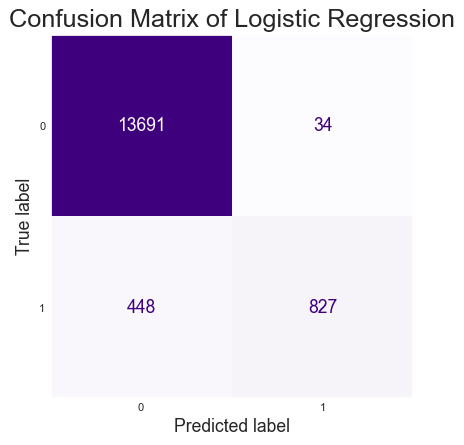

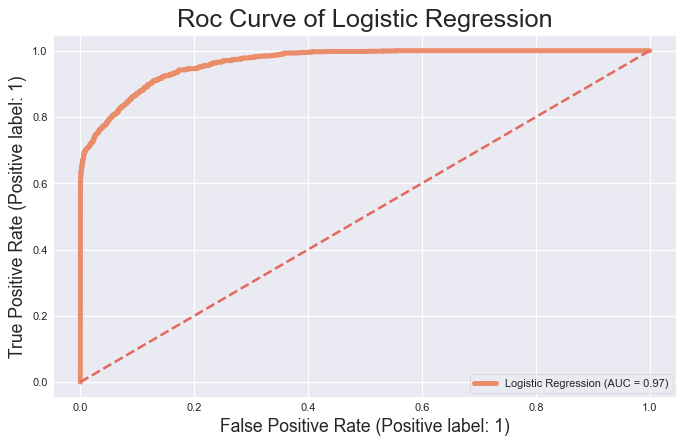

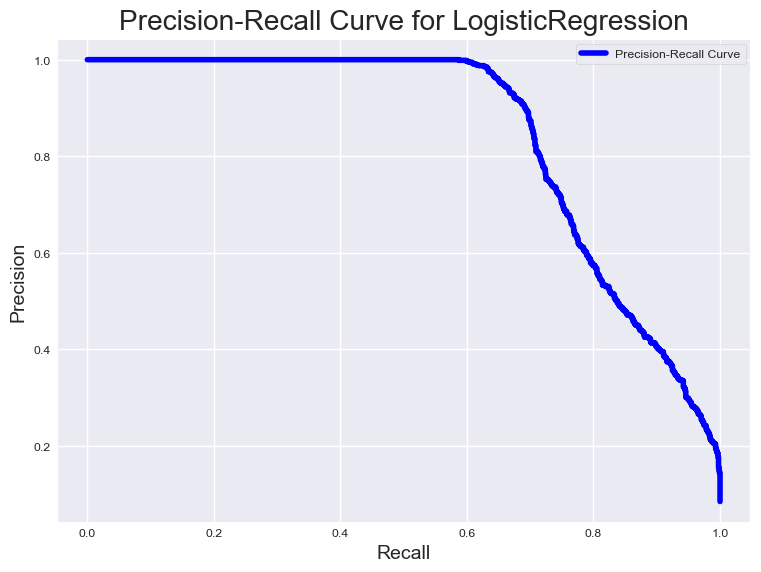

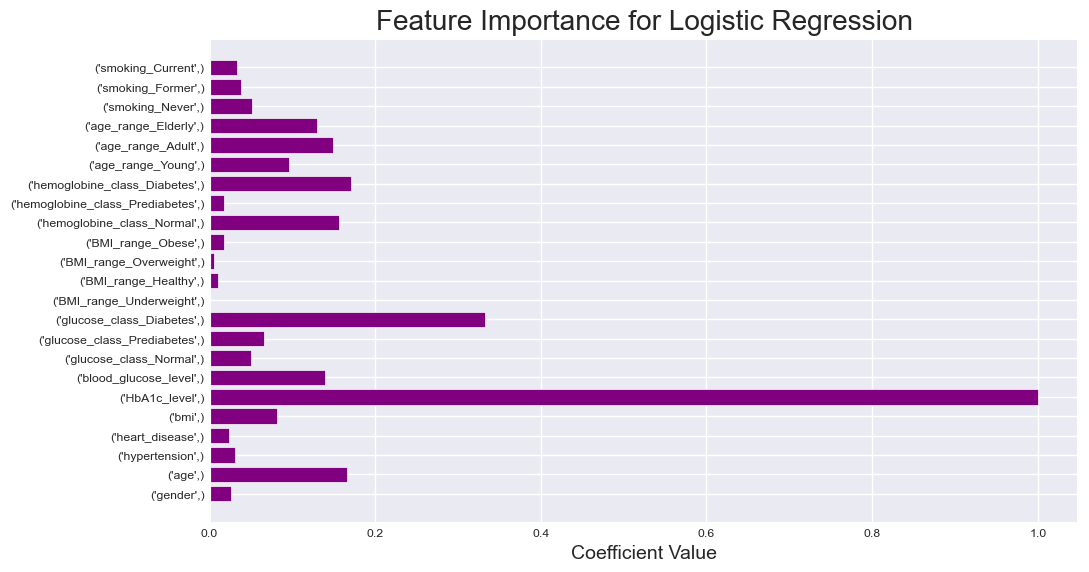

In [186]:
def logisticRegression_clf(X_train,y_train,X_test,y_test):
    """ 
    Pipeline to train a Logistic Regression classifier
    """
    # Create a logistic regression classifier
    lg = LogisticRegression(random_state=0,max_iter=1000)

    # Perform grid search with cross-validation to seek best hyperparameters
    parameters = {'penalty': ["l2"],
                  'C': [0.1, 1, 10]}
    grid_search = GridSearchCV(lg, parameters, cv=5, scoring="accuracy")
    grid_search.fit(X_train, y_train)

    # Training the model on the training dataset with best parameters
    lg = grid_search.best_estimator_
    lg.fit(X_train,y_train)

    # Performing predictions on the validation dataset
    y_pred = lg.predict(X_test)

    # Calculate metrics (accuracy, precision...)
    results_lg = metrics_calculator(y_test,y_pred, "Logistic Regression")

    return lg, results_lg

# Train a classifier and predict with the validation set
lg, results_lg = logisticRegression_clf(X_train,y_train,X_val,y_val)

# Show confusion matrix
plot_confusionMatrix(clf=lg,clf_name="Logistic Regression",X_test=X_val,y_test=y_val)

# Show ROC Curve
plot_rocCurve(clf=lg,clf_name="Logistic Regression",X_test=X_val,y_test=y_val)

# Plot the precision recall curve
precision, recall, _ = precision_recall_curve(y_val, lg.predict_proba(X_val)[:, 1])
plot_precision_recall_curve("LogisticRegression",precision,recall)

# Plot importance of features - Get coefficients of classifier and scale them
scaler = MinMaxScaler()
coef = scaler.fit_transform(np.abs(lg.coef_).T).flatten() 
feature_names = X_train.columns
plot_importance_features("Logistic Regression",feature_names,coef)

In [187]:
results_lg

Metric  Logistic Regression
0                 Accuracy            96.786667
1                Precision            96.441281
2                   Recall            82.307511
3                 F1-score            87.852313
4     Classification Error             3.213333
5  Accuracy Positive Cases            64.862745
6  Accuracy Negative Cases            99.752277

In [115]:
"""# Plot Decision boundary
print("Dataset has more than two features, cannot plot decision boundary.")
print("Let's see some combinatorial cases")
selected_features = ['bmi', 'age'] 
for i in range(0,len(selected_features),2):
    X_train_subset = X_train[selected_features[i:i+2]]
    plot_decision_boundary_tree(X_train_subset, y_train, lg, title="Decision boundary: Logistic regression")

# Train the model
log_reg = LogisticRegression(random_state=0)
log_reg.fit(X_train_pca, y_train)

# Plot the decision boundaries
plot_decision_boundaries2D(log_reg, X_train_pca, X_val_pca, y_train, y_val)"""

'# Plot Decision boundary\nprint("Dataset has more than two features, cannot plot decision boundary.")\nprint("Let\'s see some combinatorial cases")\nselected_features = [\'bmi\', \'age\'] \nfor i in range(0,len(selected_features),2):\n    X_train_subset = X_train[selected_features[i:i+2]]\n    plot_decision_boundary_tree(X_train_subset, y_train, lg, title="Decision boundary: Logistic regression")\n\n# Train the model\nlog_reg = LogisticRegression(random_state=0)\nlog_reg.fit(X_train_pca, y_train)\n\n# Plot the decision boundaries\nplot_decision_boundaries2D(log_reg, X_train_pca, X_val_pca, y_train, y_val)'

### **2. Decision trees**

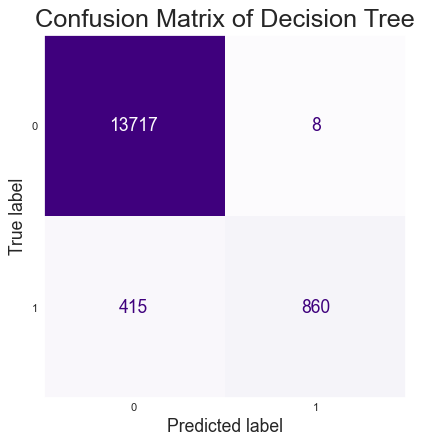

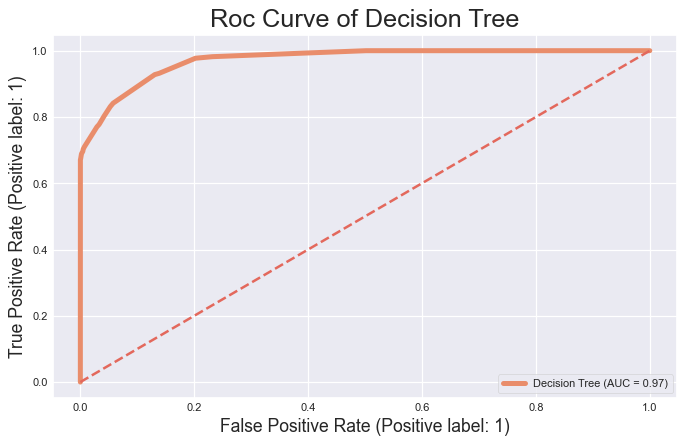

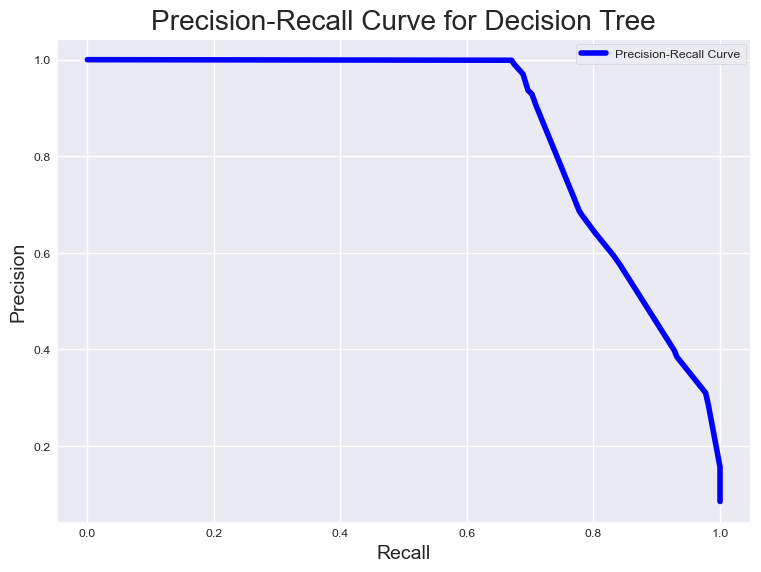

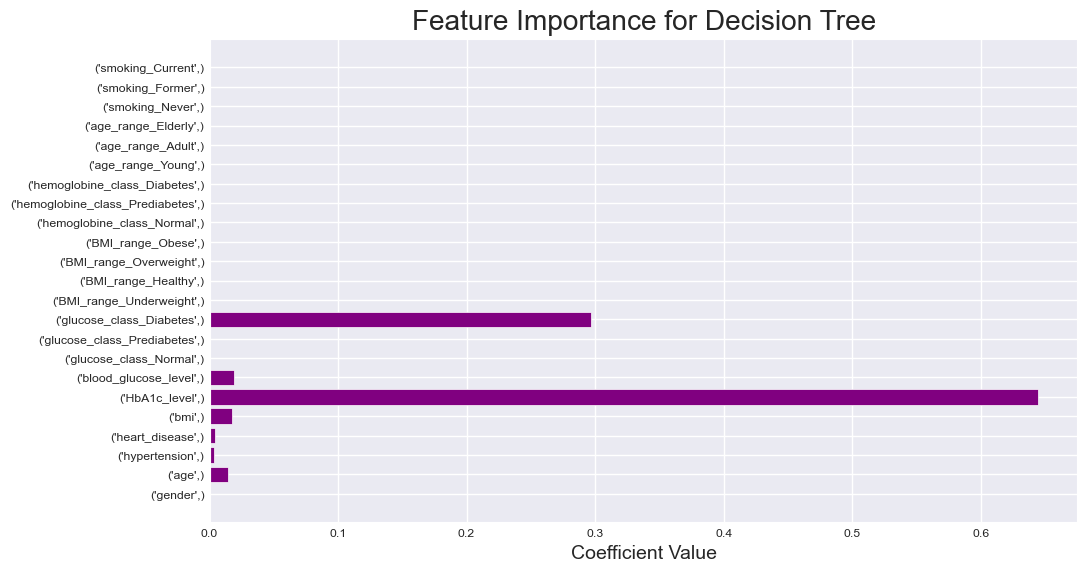

In [188]:
def decisionTree_clf(X_train,y_train,X_test,y_test):
    """ 
    Pipeline to train a Decision Tree classifier
    """
    # Create a decision Tree Classifier
    decisionTree = DecisionTreeClassifier()

    # Perform grid search with cross-validation to seek best hyperparameters
    parameters = {
        'criterion': ['gini', 'entropy'],
        'max_depth': [i for i in range(1, 10)]}
    grid_search = GridSearchCV(decisionTree, parameters, cv=5, scoring="accuracy")
    grid_search.fit(X_train, y_train)

    # Training the model on the training dataset with best parameters
    decisionTree = grid_search.best_estimator_
    decisionTree.fit(X_train,y_train)

    # Performing predictions on the validation dataset
    y_pred = decisionTree.predict(X_test)

    # Calculate metrics (accuracy, precision...)
    results_dt = metrics_calculator(y_test,y_pred,"Decision Tree")

    return decisionTree, results_dt

# Train a classifier and predict with the validation set
decisionTree, results_dt = decisionTree_clf(X_train,y_train,X_val,y_val)

# Show confusion matrix
plot_confusionMatrix(clf=decisionTree,clf_name="Decision Tree",X_test=X_val,y_test=y_val)

# Show ROC Curve
plot_rocCurve(clf=decisionTree,clf_name="Decision Tree",X_test=X_val,y_test=y_val)

# Plot the precision recall curve
precision, recall, _ = precision_recall_curve(y_val, decisionTree.predict_proba(X_val)[:, 1])
plot_precision_recall_curve("Decision Tree",precision,recall)

# Plot importance of features
feature_importances = decisionTree.feature_importances_
feature_names = X_train.columns
plot_importance_features("Decision Tree",feature_names, feature_importances)

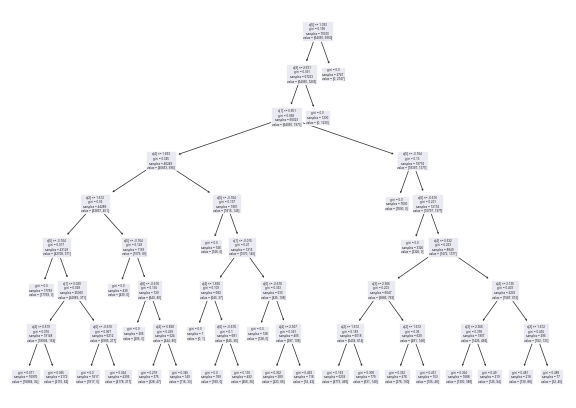

In [189]:
from sklearn import tree
_ = tree.plot_tree(decisionTree)

In [190]:
results_dt

Metric  Decision Tree
0                 Accuracy      97.180000
1                Precision      98.070872
2                   Recall      83.696346
3                 F1-score      89.371423
4     Classification Error       2.820000
5  Accuracy Positive Cases      67.450980
6  Accuracy Negative Cases      99.941712

In [119]:
"""#decision boundary
print("Dataset has more than two features, cannot plot decision boundary.")
print("Let's see some combinatorial cases")
selected_features = ['bmi', 'age'] 
for i in range(0,len(selected_features),2):
    X_train_subset = X_train[selected_features[i:i+2]]
    # Plot decision boundary using the existing model
    plot_decision_boundary_tree(X_train_subset, y_train, decisionTree, title="Decision boundary: Decision Tree")

# Train the model
trees = DecisionTreeClassifier(criterion="gini", max_depth=3, random_state=0)
trees.fit(X_train_pca, y_train)

# Plot the decision boundaries
plot_decision_boundaries2D(trees, X_train_pca, X_val_pca, y_train, y_val)"""

'#decision boundary\nprint("Dataset has more than two features, cannot plot decision boundary.")\nprint("Let\'s see some combinatorial cases")\nselected_features = [\'bmi\', \'age\'] \nfor i in range(0,len(selected_features),2):\n    X_train_subset = X_train[selected_features[i:i+2]]\n    # Plot decision boundary using the existing model\n    plot_decision_boundary_tree(X_train_subset, y_train, decisionTree, title="Decision boundary: Decision Tree")\n\n# Train the model\ntrees = DecisionTreeClassifier(criterion="gini", max_depth=3, random_state=0)\ntrees.fit(X_train_pca, y_train)\n\n# Plot the decision boundaries\nplot_decision_boundaries2D(trees, X_train_pca, X_val_pca, y_train, y_val)'

### **3. Random Forest Classifier**

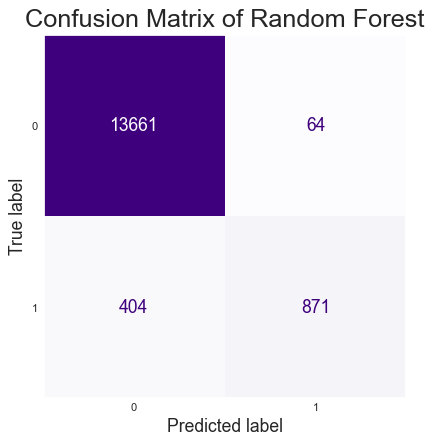

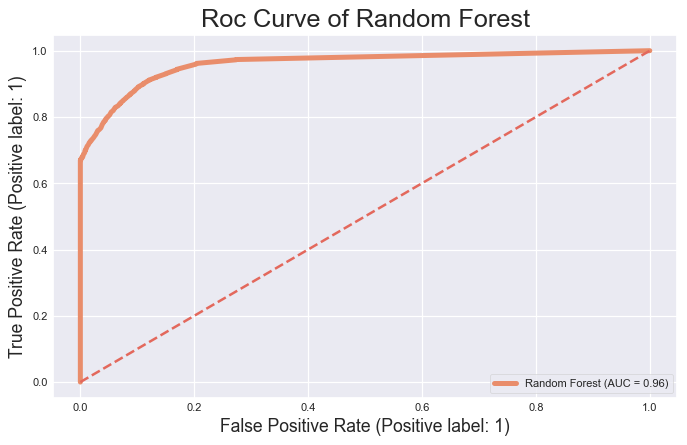

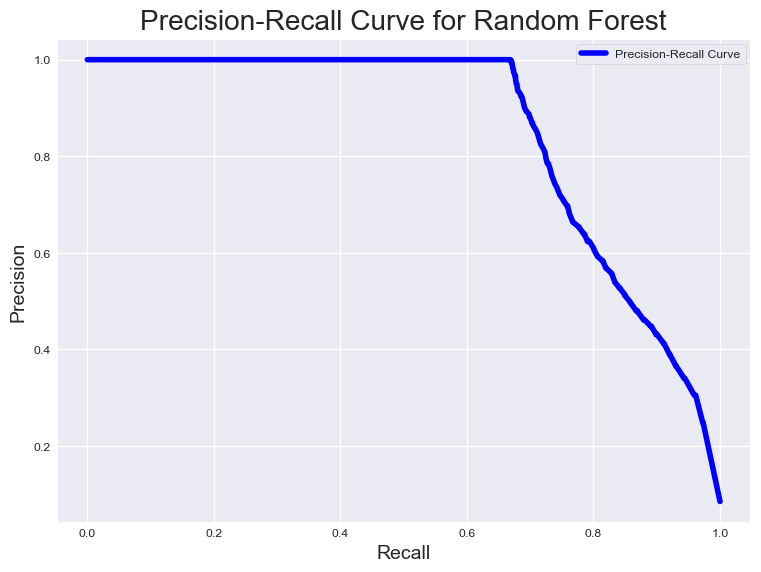

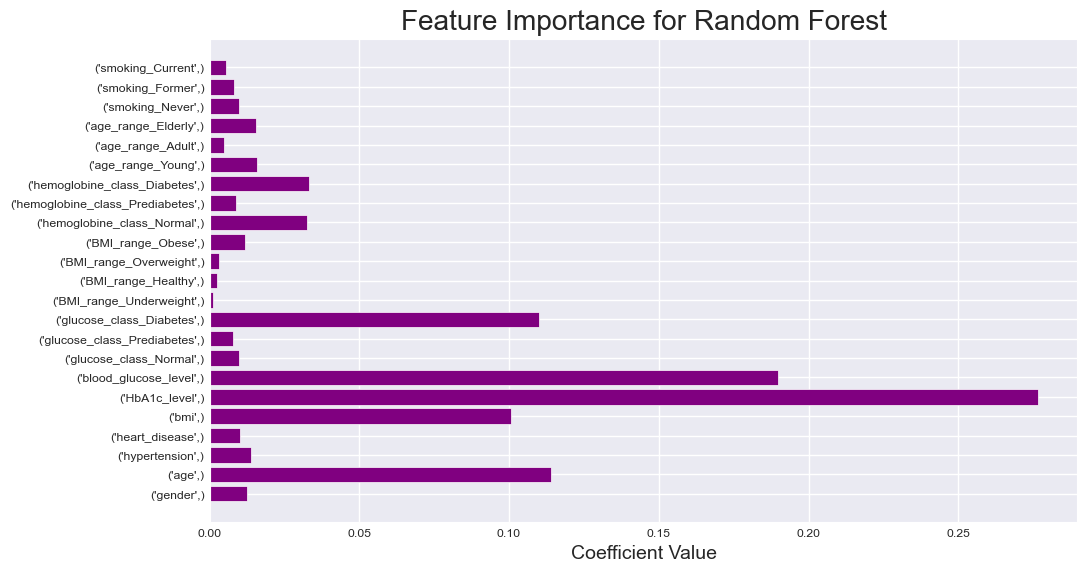

In [191]:
def randomForest_clf(X_train,y_train,X_test,y_test):
    """ 
    Pipeline to train a Random Forest classifier
    """
    # Create a random forest classifier
    randomForest = RandomForestClassifier()

    # Perform grid search with cross-validation to seek best hyperparameters
    parameters = {'criterion': ['gini', 'entropy']}
                #"n_estimators": [100,200,300]}
    grid_search = GridSearchCV(randomForest, parameters, cv=5, scoring="accuracy")
    grid_search.fit(X_train, y_train)

    # Training the model on the training dataset with best parameters
    randomForest = grid_search.best_estimator_
    randomForest.fit(X_train,y_train)

    # Performing predictions on the validation dataset
    y_pred = randomForest.predict(X_test)

    # Calculate metrics (accuracy, precision...)
    results_rf = metrics_calculator(y_test,y_pred,"Random Forest")

    return randomForest, results_rf

# Train a classifier and predict with the validation set
randomForest, results_rf = randomForest_clf(X_train,y_train,X_val,y_val)

# Show confusion matrix
plot_confusionMatrix(clf=randomForest,clf_name="Random Forest",X_test=X_val,y_test=y_val)

# Show ROC Curve
plot_rocCurve(clf=randomForest,clf_name="Random Forest",X_test=X_val,y_test=y_val)

# Plot the precision recall curve
precision, recall, _ = precision_recall_curve(y_val, randomForest.predict_proba(X_val)[:, 1])
plot_precision_recall_curve("Random Forest",precision,recall)

# Plot importance of features 
feature_importances = randomForest.feature_importances_##coef does not work with this algorithm
feature_names = X_train.columns
plot_importance_features("Random Forest",feature_names, feature_importances)

In [192]:
results_rf

Metric  Random Forest
0                 Accuracy      96.880000
1                Precision      95.141351
2                   Recall      83.923712
3                 F1-score      88.569735
4     Classification Error       3.120000
5  Accuracy Positive Cases      68.313725
6  Accuracy Negative Cases      99.533698

In [122]:
"""#1
print("Dataset has more than two features, cannot plot decision boundary.")
print("Let's see some combinatorial cases")
selected_features = ['bmi', 'age'] 
for i in range(0,len(selected_features),2):
    X_train_subset = X_train[selected_features[i:i+2]]
    # Plot decision boundary using the existing model
    plot_decision_boundary_tree(X_train_subset, y_train, decisionTree, title="Decision Boundary: Random Forest")
from sklearn.tree import DecisionTreeRegressor

trees1 = DecisionTreeRegressor(max_depth=5, random_state=0)

trees1.fit(X_train.iloc[:, :2], y_train)
plot_prediction(np.sin, trees1, X_train.iloc[:, :2], X_val.iloc[:, :2], y_train, y_val)

#2
forest = RandomForestClassifier(n_estimators=100, criterion="gini", max_depth=3, random_state=0)
forest.fit(X_train_pca, y_train)

# Plot the decision boundaries
plot_decision_boundaries2D(forest, X_train_pca, X_val_pca, y_train, y_val)"""

'#1\nprint("Dataset has more than two features, cannot plot decision boundary.")\nprint("Let\'s see some combinatorial cases")\nselected_features = [\'bmi\', \'age\'] \nfor i in range(0,len(selected_features),2):\n    X_train_subset = X_train[selected_features[i:i+2]]\n    # Plot decision boundary using the existing model\n    plot_decision_boundary_tree(X_train_subset, y_train, decisionTree, title="Decision Boundary: Random Forest")\nfrom sklearn.tree import DecisionTreeRegressor\n\ntrees1 = DecisionTreeRegressor(max_depth=5, random_state=0)\n\ntrees1.fit(X_train.iloc[:, :2], y_train)\nplot_prediction(np.sin, trees1, X_train.iloc[:, :2], X_val.iloc[:, :2], y_train, y_val)\n\n#2\nforest = RandomForestClassifier(n_estimators=100, criterion="gini", max_depth=3, random_state=0)\nforest.fit(X_train_pca, y_train)\n\n# Plot the decision boundaries\nplot_decision_boundaries2D(forest, X_train_pca, X_val_pca, y_train, y_val)'

### **4. Support Vector Classification**

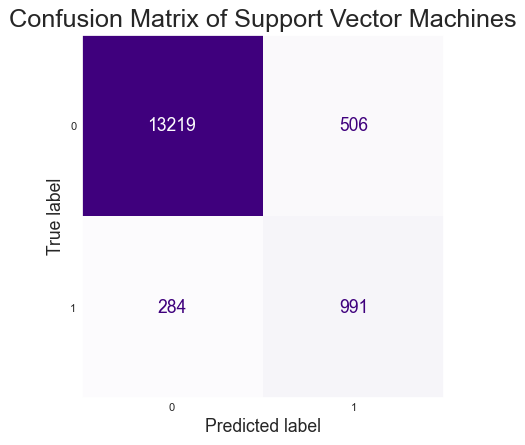

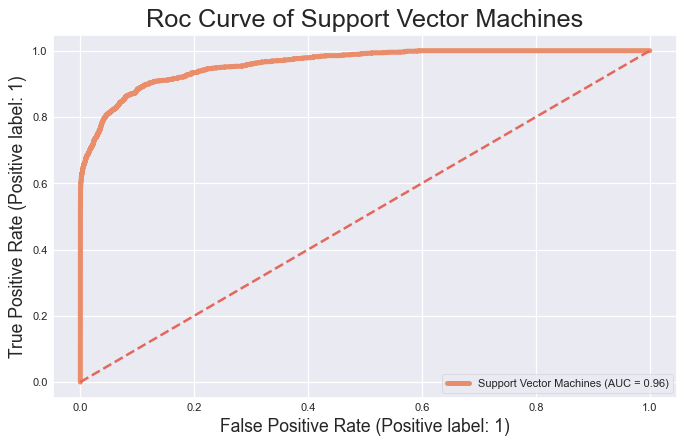

In [124]:
def SVM_clf(X_train,y_train,X_test,y_test):
    """ 
    Pipeline to train a Support Vector Machine classifier
    """
    # Assign a higher weight to minority class
    class_weights = {0: 1, 1: 5}

    # Create a SVC classifier
    svm = SVC(class_weight=class_weights)

    # Perform grid search with cross-validation to seek best hyperparameters
    parameters = {'C': [0.1, 1, 10],
                  'kernel': ['linear', 'rbf', 'poly']}
                  #'gamma': ['scale', 'auto']}
    grid_search = GridSearchCV(svm, parameters, cv=5, scoring="accuracy")
    grid_search.fit(X_train, y_train)

    # Training the model on the training dataset with best parameters
    svm = grid_search.best_estimator_
    svm.fit(X_train,y_train)

    # Performing predictions on the validation dataset
    y_pred = svm.predict(X_test)

    # Calculate metrics (accuracy, precision...)
    results_svm = metrics_calculator(y_test,y_pred,"Support Vector Machines")

    return svm, results_svm

# Train a classifier and predict with the validation set
svm, results_svm = SVM_clf(X_train,y_train,X_val,y_val)

# Show confusion matrix
plot_confusionMatrix(clf=svm,clf_name="Support Vector Machines",X_test=X_val,y_test=y_val)

# Show ROC Curve
plot_rocCurve(clf=svm,clf_name="Support Vector Machines",X_test=X_val,y_test=y_val)

In [125]:
results_svm

Metric  Support Vector Machines
0                 Accuracy                94.733333
1                Precision                82.047914
2                   Recall                87.019394
3                 F1-score                84.299648
4     Classification Error                 5.266667
5  Accuracy Positive Cases                77.725490
6  Accuracy Negative Cases                96.313297

### **5. Gradient Boosting Classifier**


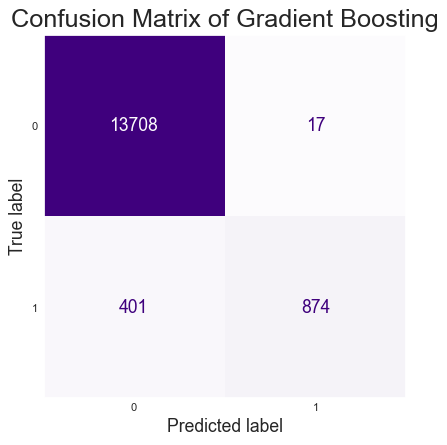

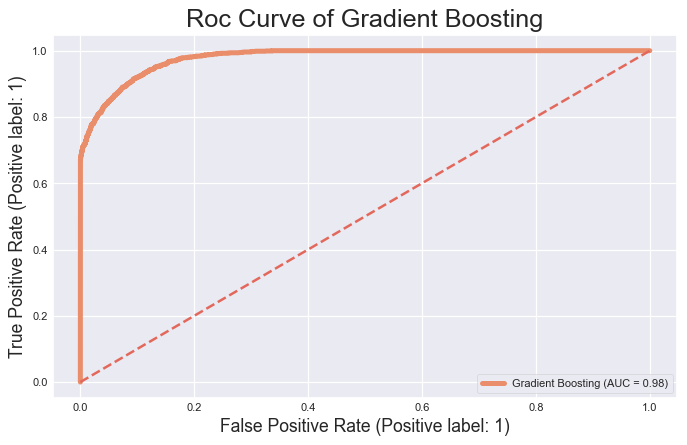

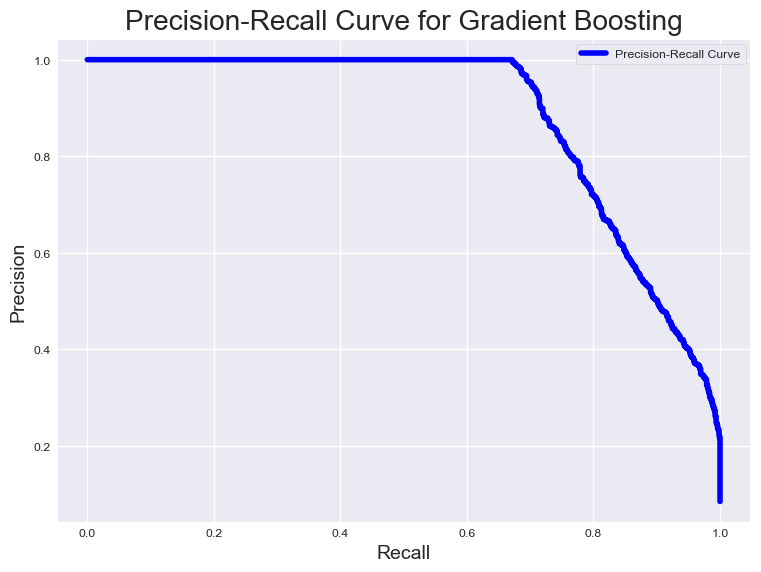

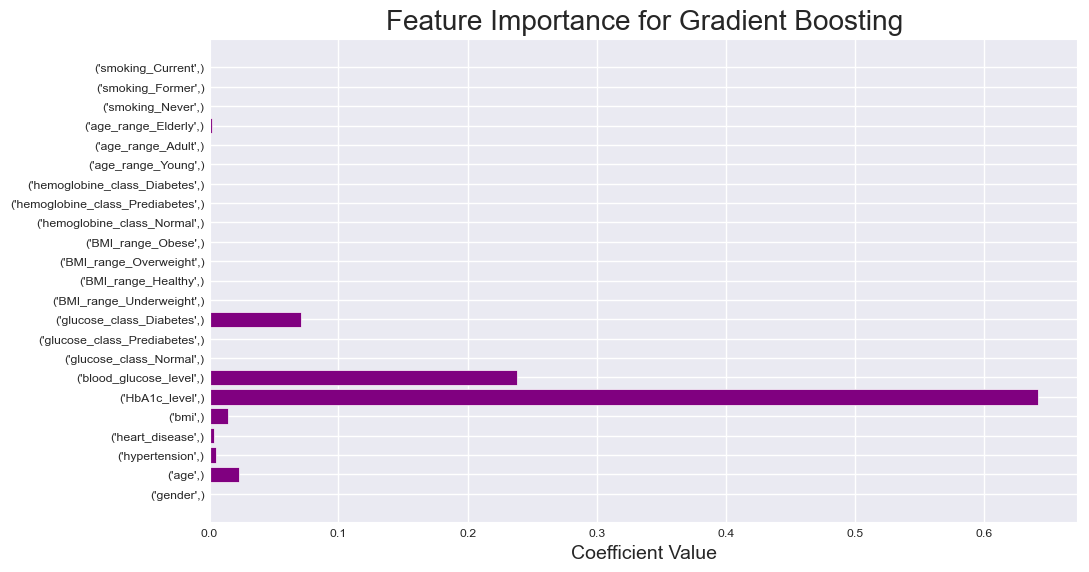

In [193]:
def gradientBoost_clf(X_train,y_train,X_test,y_test): #30MIN
    """ 
    Pipeline to train a gradient boosting classifier
    """
    # Create a gradient boosting Classifier
    gradBoost = GradientBoostingClassifier(random_state=42)

    # Perform grid search with cross-validation to seek best hyperparameters
    parameters = {'n_estimators': [50, 100, 200],
                    'learning_rate': [0.01, 0.1, 0.2],
                    'max_depth': [3, 5, 7]}
    grid_search = GridSearchCV(gradBoost, parameters, cv=5, scoring="accuracy")
    grid_search.fit(X_train, y_train)

    # Training the model on the training dataset with best parameters
    gradBoost = grid_search.best_estimator_
    gradBoost.fit(X_train,y_train)

    # Performing predictions on the validation dataset
    y_pred = gradBoost.predict(X_test)

    # Calculate metrics (accuracy, precision...)
    results_gb = metrics_calculator(y_test,y_pred,"Gradient Boosting")

    return gradBoost, results_gb

# Train a classifier and predict with the validation set
gradBoost, results_gb = gradientBoost_clf(X_train,y_train,X_val,y_val)

# Show confusion matrix
plot_confusionMatrix(clf=gradBoost,clf_name="Gradient Boosting",X_test=X_val,y_test=y_val)

# Show ROC Curve
plot_rocCurve(clf=gradBoost,clf_name="Gradient Boosting",X_test=X_val,y_test=y_val)

# Plot the precision recall curve
precision, recall, _ = precision_recall_curve(y_val, gradBoost.predict_proba(X_val)[:, 1])
plot_precision_recall_curve("Gradient Boosting",precision,recall)

# Plot importance of features 
feature_importances = gradBoost.feature_importances_##coef does not work with this algorithm
feature_names = X_train.columns
plot_importance_features("Gradient Boosting",feature_names, feature_importances)

In [194]:
results_gb

Metric  Gradient Boosting
0                 Accuracy          97.213333
1                Precision          97.624937
2                   Recall          84.212579
3                 F1-score          89.599997
4     Classification Error           2.786667
5  Accuracy Positive Cases          68.549020
6  Accuracy Negative Cases          99.876138

### **6. AdaBoost Classifier**

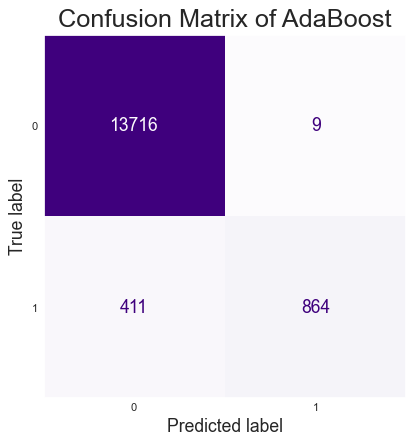

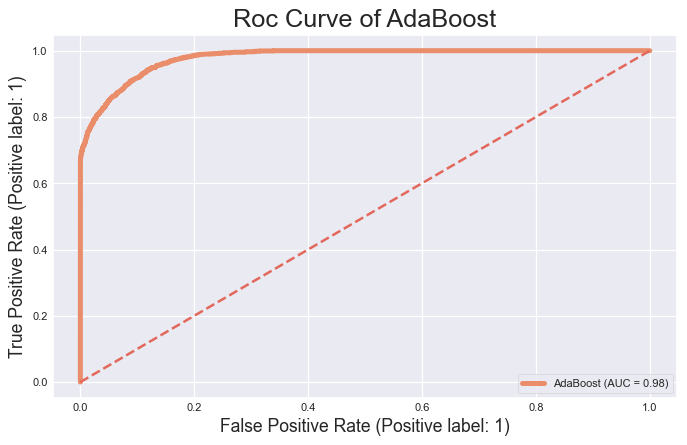

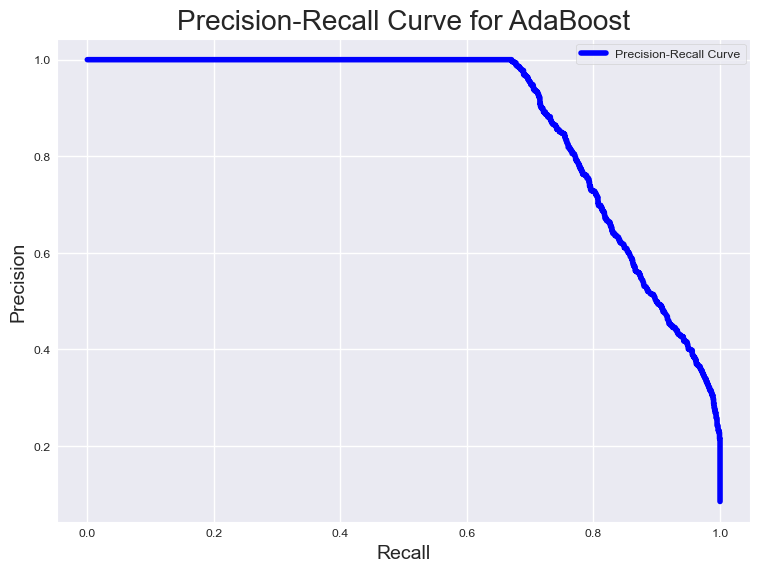

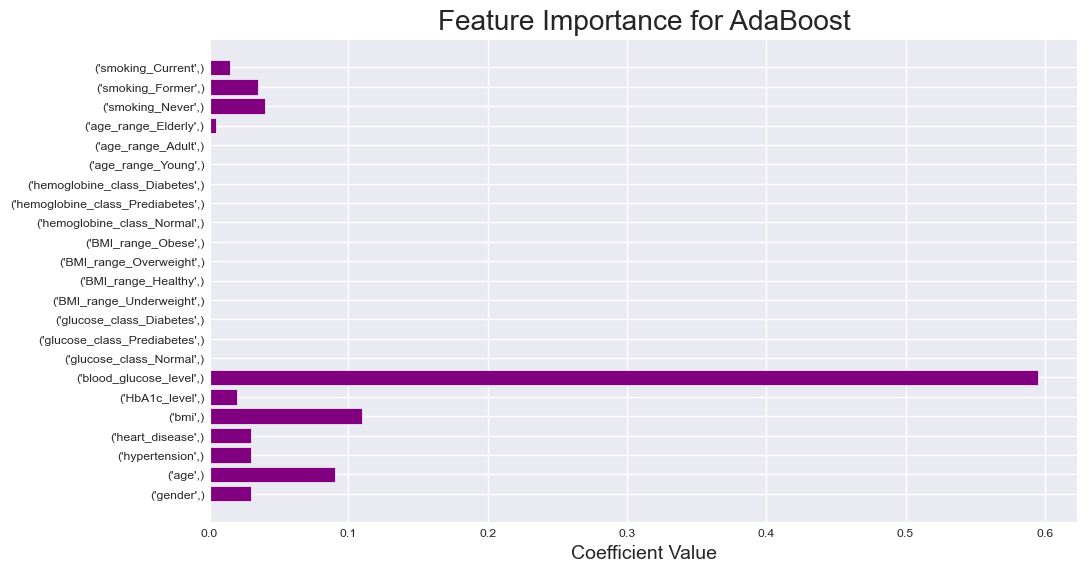

In [195]:
def adaBoost_clf(X_train,y_train,X_test,y_test):
    """ 
    Pipeline to train a adaBoost classifier
    """
    # Create a Decision Tree Classifier (as a weak learner)
    base_clf = DecisionTreeClassifier(max_depth=1)

    # Create a adaBoost classifier
    adaBoost = AdaBoostClassifier(base_clf, random_state=42)

    # Perform grid search with cross-validation to seek best hyperparameters
    parameters = {'n_estimators': [50, 100, 200],
                    'learning_rate': [0.01, 0.1, 0.2]}

    grid_search = GridSearchCV(adaBoost, parameters, cv=5, scoring="accuracy", n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # Training the model on the training dataset with best parameters
    adaBoost = grid_search.best_estimator_
    adaBoost.fit(X_train,y_train) #ESTO SOBRA EN CHATGPT

    # Performing predictions on the validation dataset
    y_pred = adaBoost.predict(X_test)

    # Calculate metrics (accuracy, precision...)
    results_ab = metrics_calculator(y_test,y_pred,"AdaBoost")

    return adaBoost, results_ab

# Train a classifier and predict with the validation set
adaBoost, results_ab = adaBoost_clf(X_train,y_train,X_val,y_val)

# Show confusion matrix
plot_confusionMatrix(clf=adaBoost,clf_name="AdaBoost",X_test=X_val,y_test=y_val)

# Show ROC Curve
plot_rocCurve(clf=adaBoost,clf_name="AdaBoost",X_test=X_val,y_test=y_val)

# Plot the precision recall curve
precision, recall, _ = precision_recall_curve(y_val, adaBoost.predict_proba(X_val)[:, 1])
plot_precision_recall_curve("AdaBoost",precision,recall)

# Plot importance of features 
feature_importances = adaBoost.feature_importances_
feature_names = X_train.columns
plot_importance_features("AdaBoost",feature_names, feature_importances)

In [196]:
results_ab

Metric   AdaBoost
0                 Accuracy  97.200000
1                Precision  98.029875
2                   Recall  83.849566
3                 F1-score  89.469478
4     Classification Error   2.800000
5  Accuracy Positive Cases  67.764706
6  Accuracy Negative Cases  99.934426

### **7. Bayesian Inference and Naive Bayes**

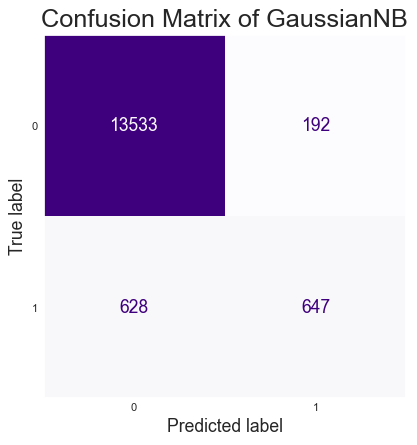

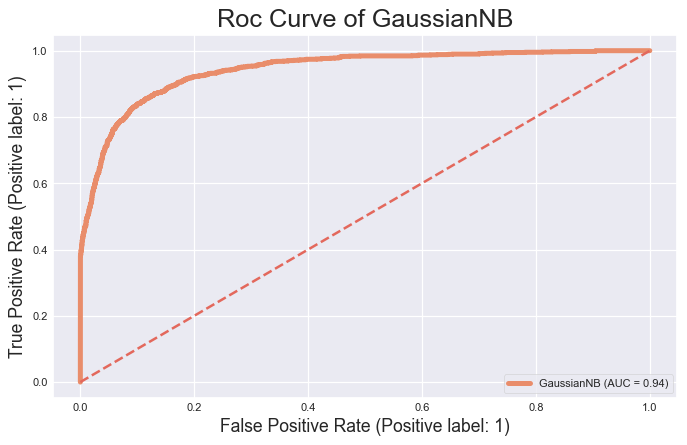

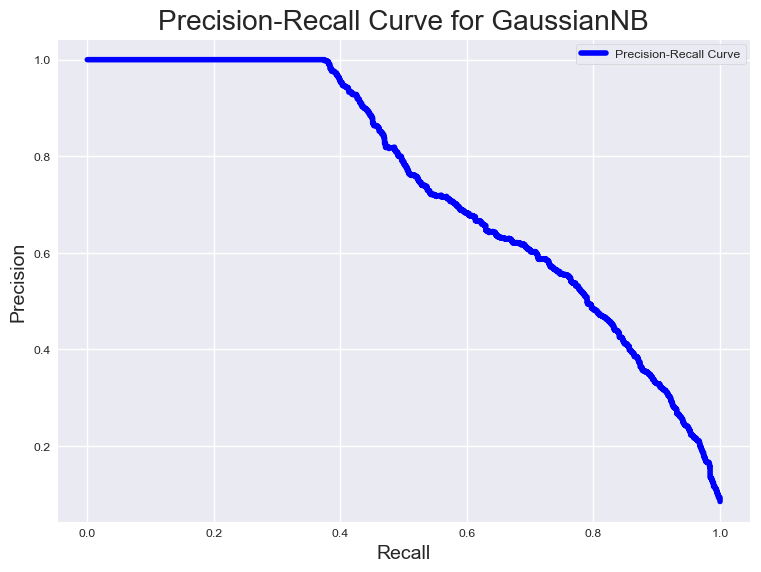

In [261]:
def gaussianNB_clf(X_train,y_train,X_test,y_test):
    """ 
    Pipeline to train a gaussianNB classifier
    """
    # Create a decision Tree Classifier
    gaussianNB = GaussianNB()

    # Perform grid search with cross-validation to seek best hyperparameters
    parameters = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]}
    grid_search = GridSearchCV(gaussianNB, parameters, cv=5, scoring="accuracy",n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # Training the model on the training dataset with best parameters
    gaussianNB = grid_search.best_estimator_
    gaussianNB.fit(X_train,y_train)

    # Performing predictions on the validation dataset
    y_pred = gaussianNB.predict(X_test)

    # Calculate metrics (accuracy, precision...)
    results_gnb = metrics_calculator(y_test,y_pred,"GaussianNB")

    return gaussianNB, results_gnb

# Train a classifier and predict with the validation set
gaussianNB, results_gnb = gaussianNB_clf(X_train,y_train,X_val,y_val)

# Show confusion matrix
plot_confusionMatrix(clf=gaussianNB,clf_name="GaussianNB",X_test=X_val,y_test=y_val)

# Show ROC Curve
plot_rocCurve(clf=gaussianNB,clf_name="GaussianNB",X_test=X_val,y_test=y_val)

# Plot the precision recall curve
precision, recall, _ = precision_recall_curve(y_val, gaussianNB.predict_proba(X_val)[:, 1])
plot_precision_recall_curve("GaussianNB",precision,recall)

In [262]:
results_gnb

Metric  GaussianNB
0                 Accuracy   94.533333
1                Precision   86.340449
2                   Recall   74.673095
3                 F1-score   79.135215
4     Classification Error    5.466667
5  Accuracy Positive Cases   50.745098
6  Accuracy Negative Cases   98.601093

### **8. K- Nearest Neighbors**

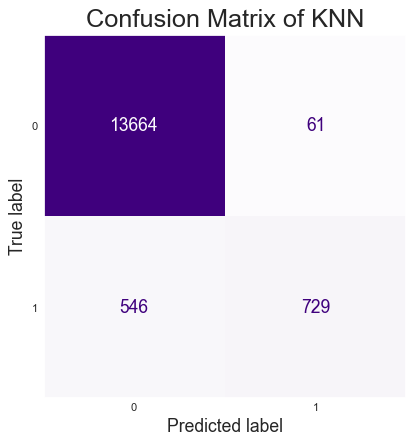

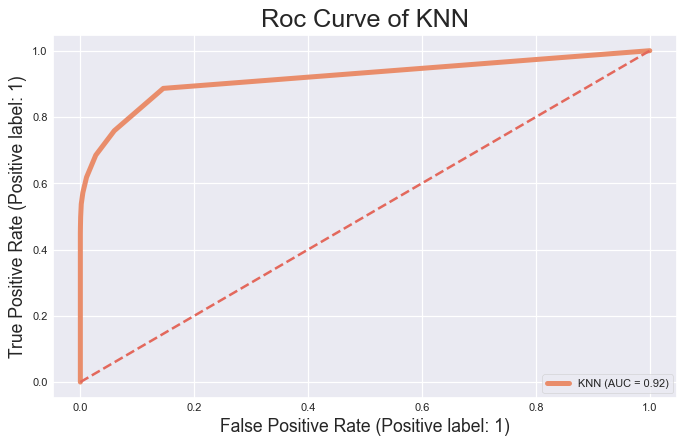

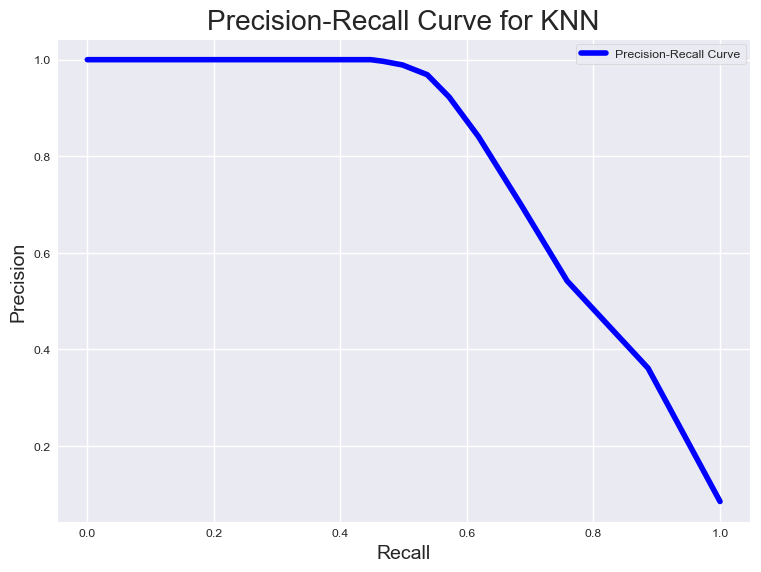

In [202]:
def knn_clf(X_train,y_train,X_test,y_test):
    """ 
    Pipeline to train a K Nearest Neighbours classifier
    """
    # Create a KNN Classifier
    knn = KNeighborsClassifier()

    # Perform grid search with cross-validation to seek best hyperparameters
    parameters = {'n_neighbors': [3, 5, 7, 9],
                    'weights': ['uniform', 'distance'],
                    'p': [1, 2]}  # 1 for Manhattan distance (L1), 2 for Euclidean distance (L2)
    grid_search = GridSearchCV(knn, parameters, cv=5, scoring="accuracy",n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # Training the model on the training dataset with best parameters
    knn = grid_search.best_estimator_
    knn.fit(X_train,y_train)

    # Performing predictions on the validation dataset
    y_pred = knn.predict(X_test)

    # Calculate metrics (accuracy, precision...)
    results_knn = metrics_calculator(y_test,y_pred,"KNN")

    return knn, results_knn

# Train a classifier and predict with the validation set
knn, results_knn = knn_clf(X_train,y_train,X_val,y_val)

# Show confusion matrix
plot_confusionMatrix(clf=knn,clf_name="KNN",X_test=X_val,y_test=y_val)

# Show ROC Curve
plot_rocCurve(clf=knn,clf_name="KNN",X_test=X_val,y_test=y_val)

# Plot the precision recall curve
precision, recall, _ = precision_recall_curve(y_val, knn.predict_proba(X_val)[:, 1])
plot_precision_recall_curve("KNN",precision,recall)


In [203]:
results_knn

Metric        KNN
0                 Accuracy  95.953333
1                Precision  94.218058
2                   Recall  78.366013
3                 F1-score  84.216213
4     Classification Error   4.046667
5  Accuracy Positive Cases  57.176471
6  Accuracy Negative Cases  99.555556

### **Results**

In [263]:
Results = pd.concat([results_lg, results_dt.iloc[:,1], results_rf.iloc[:,1],
                     results_svm.iloc[:,1],results_gb.iloc[:,1],results_ab.iloc[:,1],
                     results_gnb.iloc[:,1],results_knn.iloc[:,1]], axis=1)
Results

Metric  Logistic Regression  Decision Tree  Random Forest  \
0                 Accuracy            96.786667      97.180000      96.880000   
1                Precision            96.441281      98.070872      95.141351   
2                   Recall            82.307511      83.696346      83.923712   
3                 F1-score            87.852313      89.371423      88.569735   
4     Classification Error             3.213333       2.820000       3.120000   
5  Accuracy Positive Cases            64.862745      67.450980      68.313725   
6  Accuracy Negative Cases            99.752277      99.941712      99.533698   

   Support Vector Machines  Gradient Boosting   AdaBoost  GaussianNB  \
0                94.733333          97.213333  97.200000   94.533333   
1                82.047914          97.624937  98.029875   86.340449   
2                87.019394          84.212579  83.849566   74.673095   
3                84.299648          89.599997  89.469478   79.135215   
4                 5.266667           2.786667   2.800000    5.466667   
5                77.725490          68.549020  67.764706   50.745098   
6                96.313297          99.876138  99.934426   98.601093   

         KNN  
0  95.953333  
1  94.218058  
2  78.366013  
3  84.216213  
4   4.046667  
5  57.176471  
6  99.555556

In the results we can observe some variation depending on the model. The one that performed the best was Gradient Boosting, with an overall accuracy of 97.21%, an accuracy for negative cases of 99,87% and an accuracy for positive cases of 68.54%. Its classification error was the lowest, with only 2.78%. On the other hand, the models that performed the worst were Support Vector Machines and GaussianNB, they have the lowest accuracy values and the highest classification error, also followed closely by KNN.
As we can observe the total accuracy is high (around 94-97%), but the accuracy to predict the positive diabetes cases is pretty low (about 51-77%). We realised this could be because of the dataset being unbalanced, therefore we will try different balancing techniques to see if we get better results for the positive cases predictions.

### **Final Testing**

Now, let's see how our trained models would predict on totally unseen data.

In [264]:
# Logistic regression classifier
y_pred_lg = lg.predict(X_test)
results_lg_test = metrics_calculator(y_test,y_pred_lg,"Logistic Regression")

# Decision Tree classifier
y_pred_dt = decisionTree.predict(X_test)
results_dt_test = metrics_calculator(y_test,y_pred_dt,"Decision Trees")

# Random Forest classifier
y_pred_rf = randomForest.predict(X_test)
results_rf_test = metrics_calculator(y_test,y_pred_rf,"Random Forest")

# Support Vector Machines
y_pred_svm = svm.predict(X_test)
results_svm_test = metrics_calculator(y_test,y_pred_svm,"Support Vector Machines")

# Gradient Boosting classifier
y_pred_gb = gradBoost.predict(X_test)
results_gb_test = metrics_calculator(y_test,y_pred_gb,"Gradient Boosting")

# AdaBoost classifier
y_pred_ab = adaBoost.predict(X_test)
results_ab_test = metrics_calculator(y_test,y_pred_ab,"AdaBoost")

# Gaussian NB classifier
y_pred_gnb = gaussianNB.predict(X_test)
results_gnb_test = metrics_calculator(y_test,y_pred_gnb,"GaussianNB")

# KNN classifier
y_pred_knn = knn.predict(X_test)
results_knn_test = metrics_calculator(y_test,y_pred_knn,"KNN")

In [265]:
Results_testing = pd.concat([results_lg_test, results_dt_test.iloc[:,1], results_rf_test.iloc[:,1],
                                results_svm_test.iloc[:,1],results_gb_test.iloc[:,1],results_ab_test.iloc[:,1],
                                results_gnb_test.iloc[:,1],results_knn_test.iloc[:,1]], axis=1)
Results_testing

Metric  Logistic Regression  Decision Trees  \
0                 Accuracy            96.780000       97.126667   
1                Precision            96.335597       98.256211   
2                   Recall            82.339441       83.240330   
3                 F1-score            87.842874       89.095210   
4     Classification Error             3.220000        2.873333   
5  Accuracy Positive Cases            64.941176       66.509804   
6  Accuracy Negative Cases            99.737705       99.970856   

   Random Forest  Support Vector Machines  Gradient Boosting   AdaBoost  \
0      98.980000                95.386667          97.160000  97.120000   
1      98.583133                83.710656          97.847436  97.822074   
2      94.782599                89.724204          83.720990  83.485696   
3      96.588452                86.396941          89.319042  89.140606   
4       1.020000                 4.613333           2.840000   2.880000   
5      89.725490                82.901961          67.529412  67.058824   
6      99.839709                96.546448          99.912568  99.912568   

   GaussianNB        KNN  
0   94.720000  96.300000  
1   86.980707  95.528927  
2   75.557698  79.764920  
3   79.987568  85.671118  
4    5.280000   3.700000  
5   52.470588  59.843137  
6   98.644809  99.686703

In [269]:
# Compare results with validation and testing
accuracy_val = Results.loc[0, ['Logistic Regression', 'Decision Tree', 'Random Forest','Support Vector Machines', 'Gradient Boosting', 'AdaBoost', 'GaussianNB', 'KNN']].tolist()
accuracy_test = Results_testing.loc[0, ['Logistic Regression', 'Decision Trees', 'Random Forest','Support Vector Machines', 'Gradient Boosting', 'AdaBoost', 'GaussianNB', 'KNN']].tolist()

accPositive_val = Results.loc[5, ['Logistic Regression', 'Decision Tree', 'Random Forest','Support Vector Machines', 'Gradient Boosting', 'AdaBoost', 'GaussianNB', 'KNN']].tolist()
accPositive_test = Results_testing.loc[5, ['Logistic Regression', 'Decision Trees', 'Random Forest','Support Vector Machines', 'Gradient Boosting', 'AdaBoost', 'GaussianNB', 'KNN']].tolist()

accNegative_val = Results.loc[6, ['Logistic Regression', 'Decision Tree', 'Random Forest','Support Vector Machines', 'Gradient Boosting', 'AdaBoost', 'GaussianNB', 'KNN']].tolist()
accNegative_test = Results_testing.loc[6, ['Logistic Regression', 'Decision Trees', 'Random Forest','Support Vector Machines', 'Gradient Boosting', 'AdaBoost', 'GaussianNB', 'KNN']].tolist()

error_val = Results.loc[4, ['Logistic Regression', 'Decision Tree', 'Random Forest','Support Vector Machines', 'Gradient Boosting', 'AdaBoost', 'GaussianNB', 'KNN']].tolist()
error_test = Results_testing.loc[4, ['Logistic Regression', 'Decision Trees', 'Random Forest','Support Vector Machines', 'Gradient Boosting', 'AdaBoost', 'GaussianNB', 'KNN']].tolist()

# Extract metrics for validation dataset
comparison_results = pd.DataFrame({'Model': ['Logistic Regression', 'Decision Trees', 'Random Forest', 'Support Vector Machines', 'Gradient Boosting', 'AdaBoost', 'GaussianNB', 'KNN'],
                'Validation - Accuracy': accuracy_val, 'Test - Accuracy': accuracy_test,
                'Validation - Accuracy Positive': accPositive_val,'Test - Accuracy Positive': accPositive_test,
                'Validation - Accuracy Negative': accNegative_val,'Test - Accuracy Negative': accNegative_test,
                'Validation - Classification Error': error_val, 'Test - Classification Error': error_test})

# Display the comparison DataFrame
comparison_results

Model  Validation - Accuracy  Test - Accuracy  \
0      Logistic Regression              96.786667        96.780000   
1           Decision Trees              97.180000        97.126667   
2            Random Forest              96.880000        98.980000   
3  Support Vector Machines              94.733333        95.386667   
4        Gradient Boosting              97.213333        97.160000   
5                 AdaBoost              97.200000        97.120000   
6               GaussianNB              94.533333        94.720000   
7                      KNN              95.953333        96.300000   

   Validation - Accuracy Positive  Test - Accuracy Positive  \
0                       64.862745                 64.941176   
1                       67.450980                 66.509804   
2                       68.313725                 89.725490   
3                       77.725490                 82.901961   
4                       68.549020                 67.529412   
5                       67.764706                 67.058824   
6                       50.745098                 52.470588   
7                       57.176471                 59.843137   

   Validation - Accuracy Negative  Test - Accuracy Negative  \
0                       99.752277                 99.737705   
1                       99.941712                 99.970856   
2                       99.533698                 99.839709   
3                       96.313297                 96.546448   
4                       99.876138                 99.912568   
5                       99.934426                 99.912568   
6                       98.601093                 98.644809   
7                       99.555556                 99.686703   

   Validation - Classification Error  Test - Classification Error  
0                           3.213333                     3.220000  
1                           2.820000                     2.873333  
2                           3.120000                     1.020000  
3                           5.266667                     4.613333  
4                           2.786667                     2.840000  
5                           2.800000                     2.880000  
6                           5.466667                     5.280000  
7                           4.046667                     3.700000

As we can see, the metrics are pretty similar between the validation set predictions and the testing set.

----

### <span style="color:pink">**Handle Class Imbalance**</span>

In this last section we would try different sampling methods to balance our dataset and see if there's an improvement on the results of the classifier's predictions. We won't use all the models used before, but the ones that are more computationally efficient: Logistic Regression, Decision Trees, Random Forest and GaussianNB.

In [270]:
from sklearn import preprocessing
from sklearn import metrics
import math

In [271]:
def modelization(X_train,y_train,X_test,y_test):
    """
    Perform all models for each method.
    """
    models_results = []
    final_models = []

    for model in [logisticRegression_clf,randomForest_clf,
                  decisionTree_clf,gaussianNB_clf]:
        final_model, model_result = model(X_train,y_train,X_test,y_test)
        models_results.append(model_result)
        final_models.append(final_model)

    return models_results, final_models

def plot_graphs(data,feature,title):
    """
    Plot graphs to see balance of classes
    """
    labels = feature.unique()
    values = feature.value_counts().values

    palette = sns.color_palette('rocket')[0:2]
    plt.style.use('fivethirtyeight')
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    sns.countplot(x=feature, data=data, palette=palette)
    plt.subplot(1, 2, 2)
    plt.pie(values, labels=labels, autopct='%1.1f%%',colors=palette)
    plt.suptitle(title)
    plt.show()

def plot_confusionMatrices(models,model_names,method,X_test,y_test):
    """
    Plot the confusion matrices of the models of method X

    Input:
        - models: list containing all the models.
        - model_names: list containing all the model names.
        - method: str, name of the current sampling method.
        - X_test: DataFrame
        - y_test: Series
    """
    #Set number of columns and rows
    num_columns = len(models)
    num_rows = 1

    fig, axs = plt.subplots(num_rows, num_columns, figsize=(num_columns*5, num_rows*5), dpi=90)
    sns.set_style('darkgrid')
    sns.set_palette("rocket")

    #Ensure axs is a 2D array even if there's only one row or one column
    if num_rows == 1 and num_columns == 1:
        axs = axs.reshape(1, 1)
    elif num_rows == 1:
        axs = axs.reshape(1, -1)
    elif num_columns == 1:
        axs = axs.reshape(-1, 1)

    for i, model in enumerate(models):
        row_index = i // num_columns
        col_index = i % num_columns
        ax = axs[row_index, col_index]

        ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, ax=ax, colorbar=False, cmap="Purples")
        ax.set_title(f'Confusion Matrix of {model_names[i]}')
        ax.grid()

    #Hide empty subplots if there are not enough models to fill all the columns
    if len(models) % num_columns != 0:
        for j in range(len(models) % num_columns, num_columns):
            axs[-1, j].axis('off')

    plt.tight_layout()
    plt.show()

def method_evaluation(data,target="diabetes",method="None"):
    """
    Show information about method performance and its score.

    Input:
        - data: DataFrame, dataset with sampling applied.
        - target: str, name of the target features ("diabetes")
        - method: str, name of the method used.
    """
    #Define new X,y datasets
    x = data.drop(columns=target)
    y = data[target]

    #Define training and test sets - 20 for test, 80 for training
    xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.2, random_state=42)
    print("Dataset was splitted into X_train and X_test succesfully.")

    #Scaling data
    scaler = StandardScaler()
    xTrain_scaled = scaler.fit_transform(xTrain)
    xTest_scaled = scaler.transform(xTest)

    #Convert scaled arrays back to DataFrame
    xTrain = pd.DataFrame(xTrain_scaled, columns=xTrain.columns)
    xTest = pd.DataFrame(xTest_scaled, columns=xTrain.columns)
    print("Scaling of dataset is done, modelization will start.")

    #Modeling: make it pass through all models set before - only choose ones with best score before???
    models_results, models = modelization(xTrain,yTrain,xTest,yTest)
    print("Modelization has finished.")

    #Print confusion matrix
    models_names = ["Logistic Regression","Decision Trees","Random Forest","GaussianNB"]
    plot_confusionMatrices(models,models_names,method,X_test=xTest,y_test=yTest)

    #Store method accuracy
    methods_eval = pd.DataFrame(pd.DataFrame(data={
        'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-score', 'Classification Error',
                   'Accuracy Positive Cases', 'Accuracy Negative Cases']}))

    for result in models_results:
        methods_eval = pd.concat([methods_eval, result.iloc[:, 1]], axis=1)

    return methods_eval

#### Imbalance check

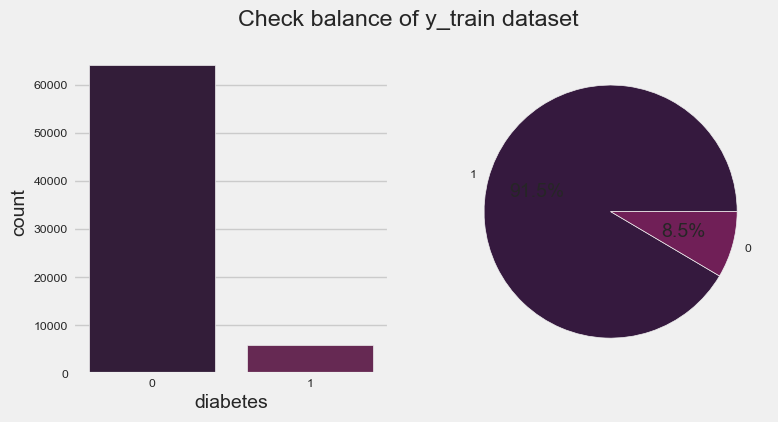

In [272]:
plot_graphs(X_train, y_train,"Check balance of y_train dataset")

#### How does the imbalance affect the accuracy?


Dataset was splitted into X_train and X_test succesfully.
Scaling of dataset is done, modelization will start.
Modelization has finished.


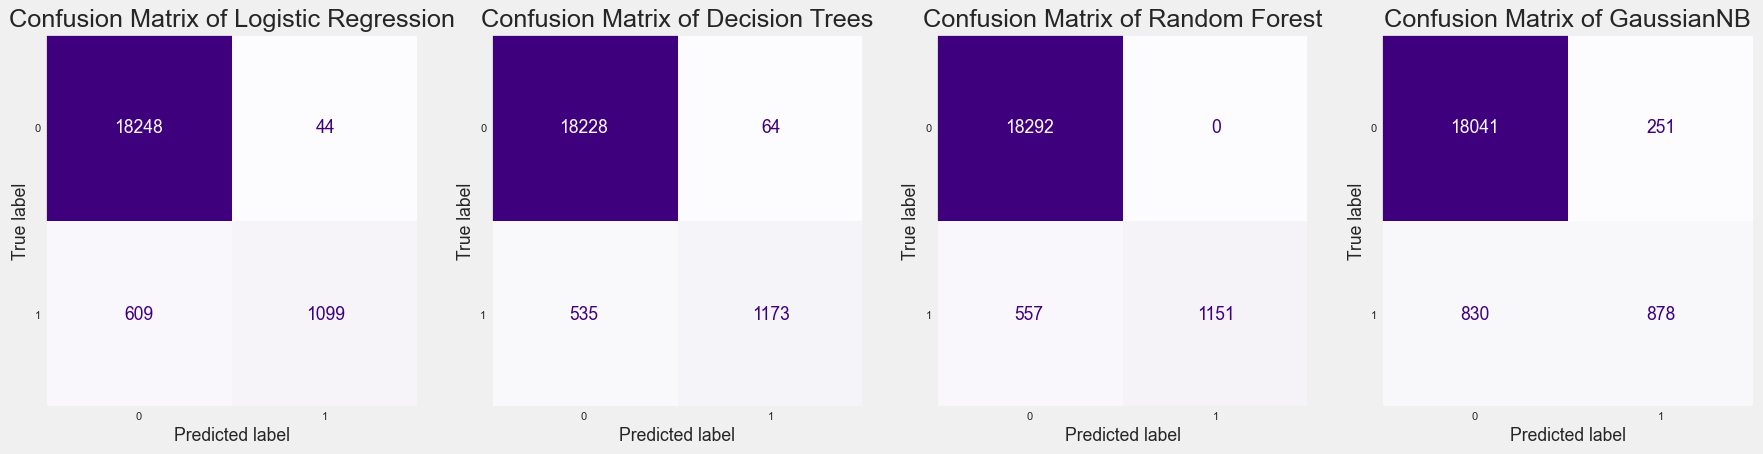

Metric  Logistic Regression  Random Forest  Decision Tree  \
0                 Accuracy            96.735000      97.005000      97.215000   
1                Precision            96.460456      95.987418      98.522468   
2                   Recall            82.051860      84.163468      83.694379   
3                 F1-score            87.668985      89.021963      89.508987   
4     Classification Error             3.265000       2.995000       2.785000   
5  Accuracy Positive Cases            64.344262      68.676815      67.388759   
6  Accuracy Negative Cases            99.759458      99.650120     100.000000   

   GaussianNB  
0   94.595000  
1   86.684827  
2   75.016484  
3   79.493781  
4    5.405000  
5   51.405152  
6   98.627815

In [273]:
#Check models accuracy in unbalanced dataset (same as Modelization)
original_data_eval = method_evaluation(data,"diabetes","none")
original_data_eval

### How to solve Imbalance

On a section before where we looked if our sataset was balanced, we used  very simple and not efficient techinques of oversampling and undersampling to try to balance our data. However, this technques didn't take into account the information of the samples: when we oversampled, we just duplicated random samples with positive diabetes cases, and when we undersampled, we just deleted random samples with negative diabetes cases. This type of sampling can damage our dataset and give results that are not accurate, specially when we try to predict from completely unseen data.

That's why in this section we will try some algorithms for sampling that take data into account. There are many more, but we used the ones that we though would give better results and that are less computationally expensive.

In [274]:
#%pip install imbalanced-learn
#%pip install upgrade scikit-learn
#%pip install upgrade imbalanced-learn

In [275]:
import warnings
warnings.simplefilter(action='ignore')

#### **Method 1: Oversampling - SMOTE (Synthetic Minority Oversampling Technique)**

This method generate new samples in by interpolation. It will not make any distinction between easy and hard samples to be classified using the nearest neighbors rule. It focuses on the feature space to generate new instances with the help of interpolation between the positive instances that lie together.

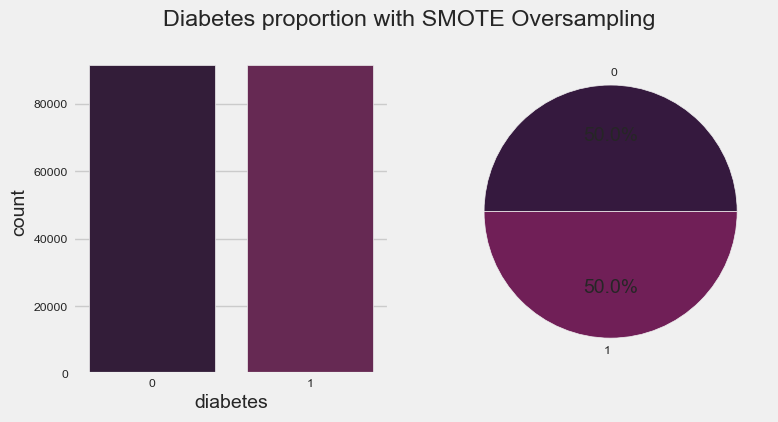

In [276]:
from imblearn.over_sampling import SMOTE

#Make copies of the original X and y datasets
x = X.copy()
Y = y.copy()

# Instantiate the SMOTE oversampling method
method = SMOTE()

# Apply oversampling method to the original X, y datasets
new_X, new_y = method.fit_resample(x,Y)

# Create a new DataFrame with the oversampled data
new_data = pd.DataFrame(new_X)
new_data["diabetes"] = new_y # Add labels to DataFrame

plot_graphs(new_data, new_data["diabetes"], "Diabetes proportion with SMOTE Oversampling")

Dataset was splitted into X_train and X_test succesfully.
Scaling of dataset is done, modelization will start.
Modelization has finished.


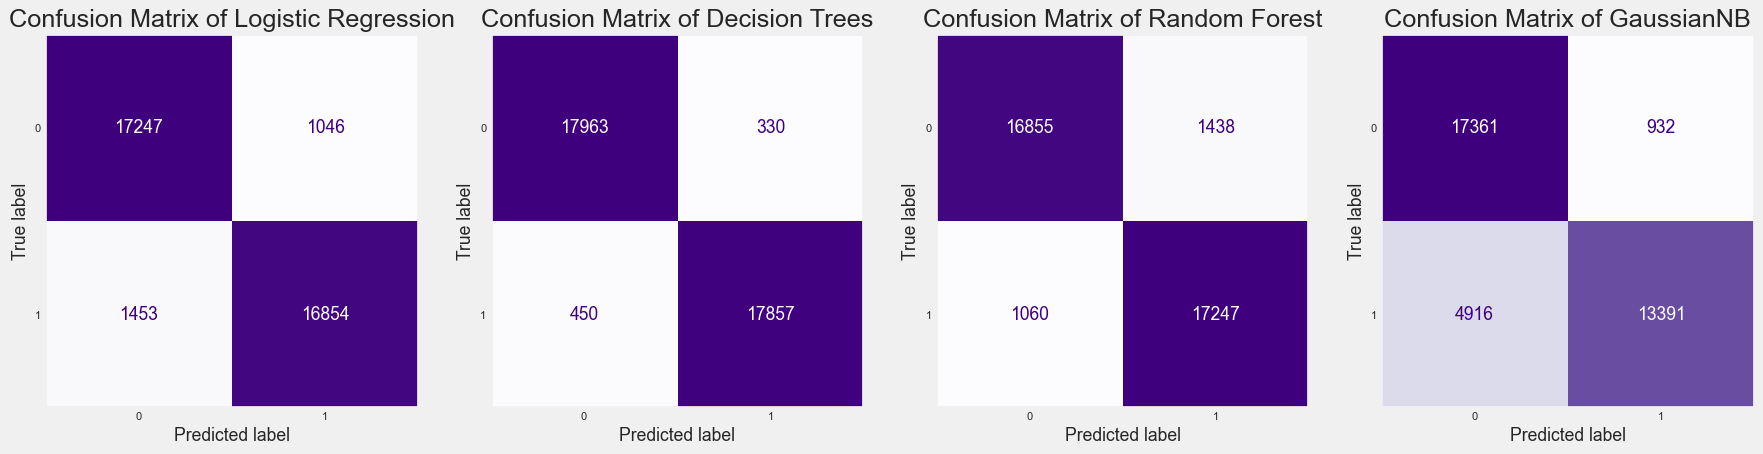

In [277]:
smote_eval = method_evaluation(new_data,target="diabetes",method="SMOTE")

In [278]:
smote_eval

Metric  Logistic Regression  Random Forest  Decision Tree  \
0                 Accuracy            93.172131      97.868852      93.174863   
1                Precision            93.193186      97.870796      93.193579   
2                   Recall            93.172556      97.868978      93.174467   
3                 F1-score            93.171344      97.868835      93.174080   
4     Classification Error             6.827869       2.131148       6.825137   
5  Accuracy Positive Cases            92.063145      97.541924      94.209865   
6  Accuracy Negative Cases            94.281966      98.196031      92.139070   

   GaussianNB  
0   84.021858  
1   85.712690  
2   84.026019  
3   83.831625  
4   15.978142  
5   73.146884  
6   94.905155

This first method gave good overall accuracy, specially with the Random Forest model, and it also increased significantly the positive-cases accuracy to around 95%.

#### **Method 2: Oversampling - KMeans SMOTE**

This method applies a KMeans clustering before to over-sample using SMOTE. It helps create clusters of the minority class that are not greatly influenced by other classes. However, it has the same problem as K-Means algorithm, which is finding the right K.

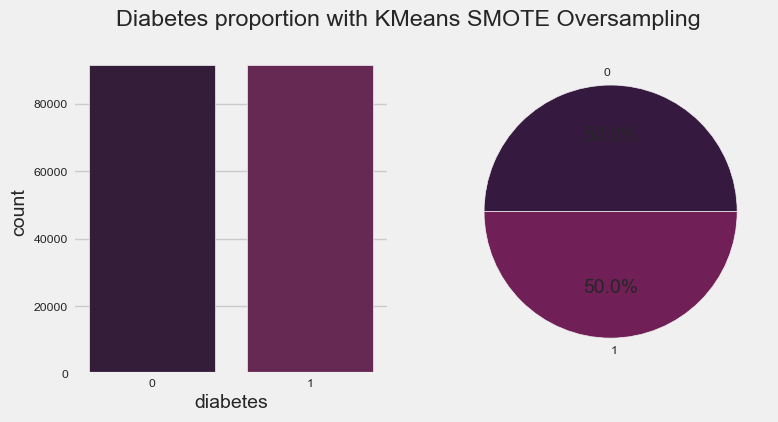

In [279]:
from imblearn.over_sampling import KMeansSMOTE

#Make copies of the original X and y datasets
x = X.copy()
Y = y.copy()

# Instantiate the KMeansSMOTE oversampling method
method = KMeansSMOTE(cluster_balance_threshold=0.1)

# Apply oversampling method to the original X, y datasets
new_X, new_y = method.fit_resample(x,Y)

# Create a new DataFrame with the oversampled data
new_data = pd.DataFrame(new_X)
new_data["diabetes"] = new_y # Add labels to DataFrame

plot_graphs(new_data, new_data["diabetes"], "Diabetes proportion with KMeans SMOTE Oversampling")

Dataset was splitted into X_train and X_test succesfully.
Scaling of dataset is done, modelization will start.
Modelization has finished.


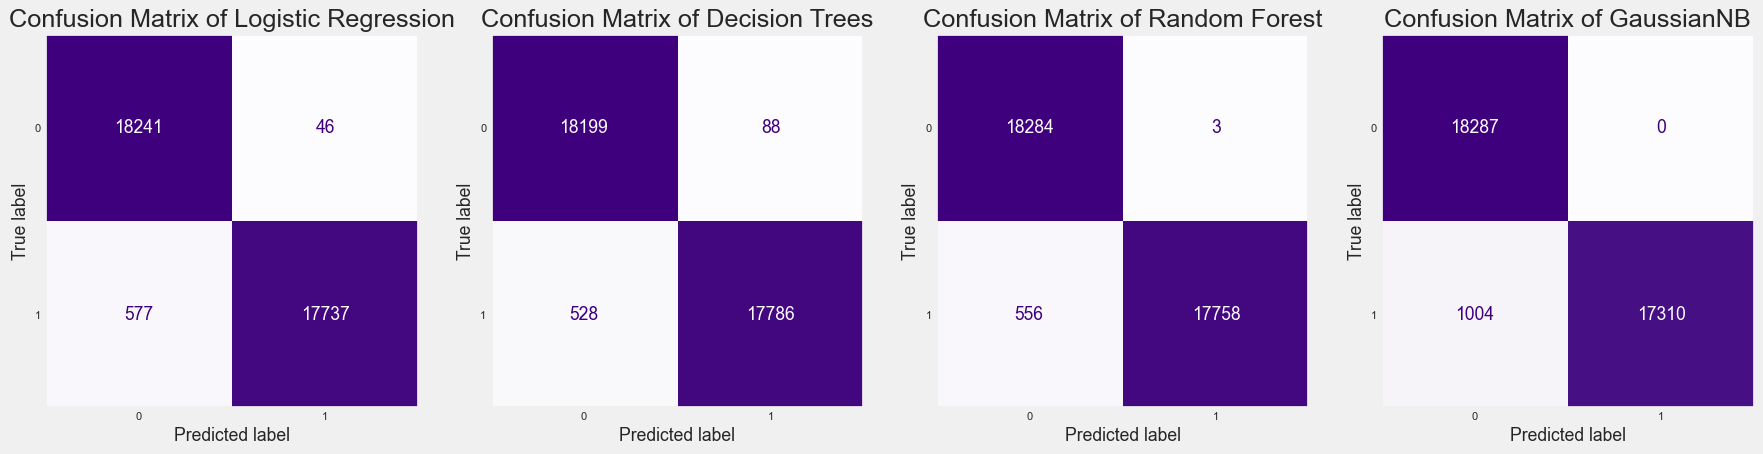

In [280]:
kmeansSmote_eval = method_evaluation(new_data,target="diabetes",method="KMeans SMOTE")

In [281]:
kmeansSmote_eval

Metric  Logistic Regression  Random Forest  Decision Tree  \
0                 Accuracy            98.297861      98.316986      98.472719   
1                Precision            98.337556      98.344103      98.515971   
2                   Recall            98.298930      98.317872      98.473833   
3                 F1-score            98.297538      98.316772      98.472404   
4     Classification Error             1.702139       1.683014       1.527281   
5  Accuracy Positive Cases            96.849405      97.116960      96.964071   
6  Accuracy Negative Cases            99.748455      99.518784      99.983595   

   GaussianNB  
0   97.256906  
1   97.397750  
2   97.258928  
3   97.254950  
4    2.743094  
5   94.517855  
6  100.000000

We see good overall accuracy (98% in most models) and also good accuracy for positive cases (around 96%)

#### **Method 3: Oversampling - SVM SMOTE**

This is a variant of the SMOTE algorithm where we use a SVM algorithm to detect samples to use for generating new synthetic samples. It focuses on generating new minority class instances near borderlines with SVM so it helps establing boundaries between classes.

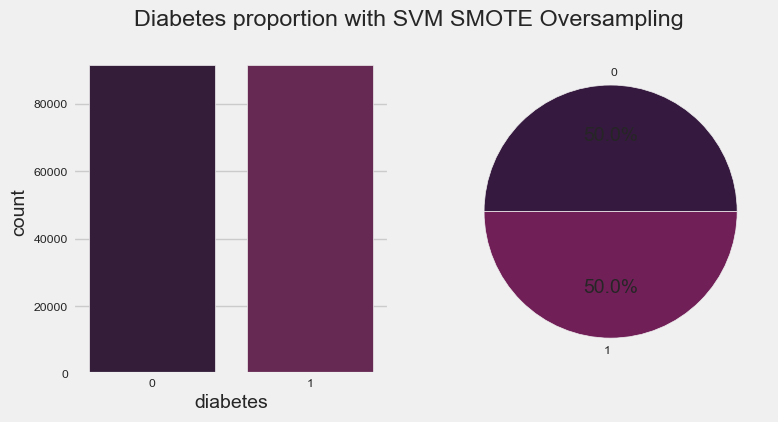

In [282]:
from imblearn.over_sampling import SVMSMOTE

#Make copies of the original X and y datasets
x = X.copy().values
Y = y.copy().values

# Instantiate SVM SMOTE method
method = SVMSMOTE(random_state=42)

# Apply oversampling method to X, y datasets
new_X, new_y = method.fit_resample(x,Y)

# Convert the resulting NumPy arrays back to DataFrames if needed
new_X = pd.DataFrame(new_X, columns=X.columns)
new_y = pd.Series(new_y, name=y.name)

# Create a new DataFrame with the oversampled data
new_data = pd.DataFrame(new_X)
new_data["diabetes"] = new_y # Add labels to DataFrame

plot_graphs(new_data, new_data["diabetes"], "Diabetes proportion with SVM SMOTE Oversampling")

Dataset was splitted into X_train and X_test succesfully.
Scaling of dataset is done, modelization will start.
Modelization has finished.


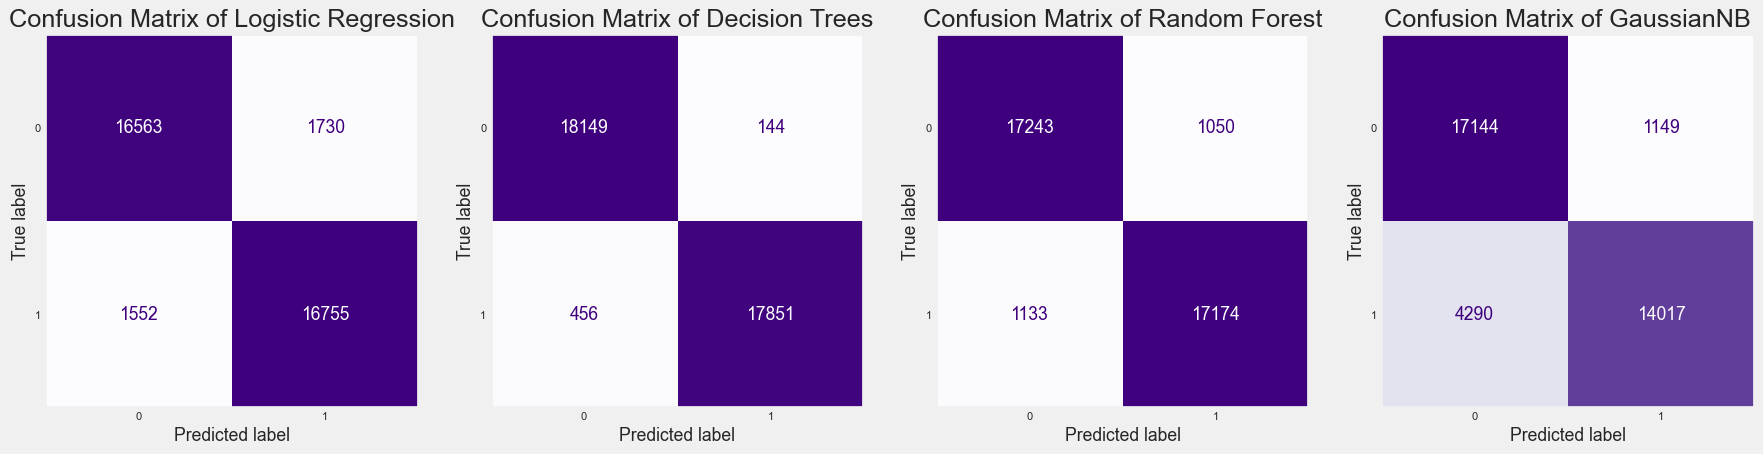

In [283]:
svmsmote_eval = method_evaluation(new_data,target="diabetes",method="SVM SMOTE")

In [284]:
svmsmote_eval

Metric  Logistic Regression  Random Forest  Decision Tree  \
0                 Accuracy            91.032787      98.360656      94.035519   
1                Precision            91.036787      98.374412      94.036358   
2                   Recall            91.032600      98.360982      94.035605   
3                 F1-score            91.032540      98.360547      94.035498   
4     Classification Error             8.967213       1.639344       5.964481   
5  Accuracy Positive Cases            91.522368      97.509150      93.811111   
6  Accuracy Negative Cases            90.542831      99.212814      94.260099   

   GaussianNB  
0   85.139344  
1   86.204457  
2   85.142625  
3   85.030071  
4   14.860656  
5   76.566341  
6   93.718909

This method gives a variaty of overall accuracy depending on the model (from 90 to 98%) and the same happens with positive cases accuracy (from 91 to 97%). But they are good accuracies.

#### **Method 4: Undersampling - Edited Nearest Neighbours (ENN)**

It is an undersampling method technique that removes the majority class to match the minority class. ENN works by removing samples whose class label differs from the class of the majority of their k nearest neighbors. We chose this method because it kept the balance proportions of our original dataset. Let's see if the metrics improve.

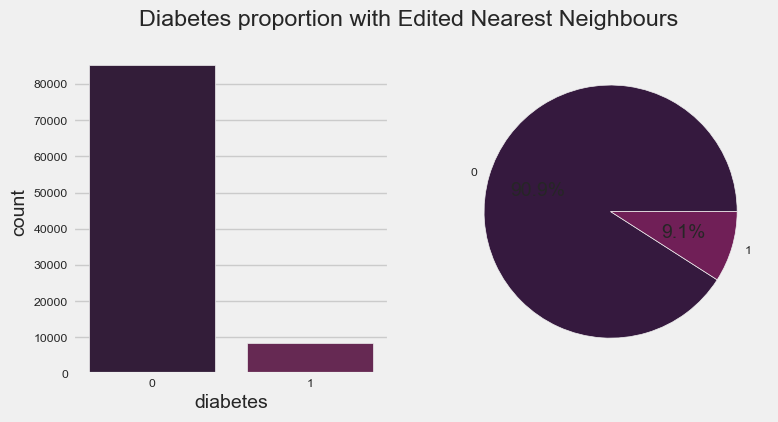

In [285]:
from imblearn.under_sampling import EditedNearestNeighbours

#Make a copy of the original X and y datasets
x = X.copy()
Y = y.copy()

# Instantiate the ENN undersampling method
method = EditedNearestNeighbours()

# Apply undersampling method to X, y datasets
new_X, new_y = method.fit_resample(x,Y)

# Create a new DataFrame with the oversampled data
new_data = pd.DataFrame(new_X)
new_data["diabetes"] = new_y # Add labels to DataFrame

plot_graphs(new_data, new_data["diabetes"], "Diabetes proportion with Edited Nearest Neighbours")

Dataset was splitted into X_train and X_test succesfully.
Scaling of dataset is done, modelization will start.
Modelization has finished.


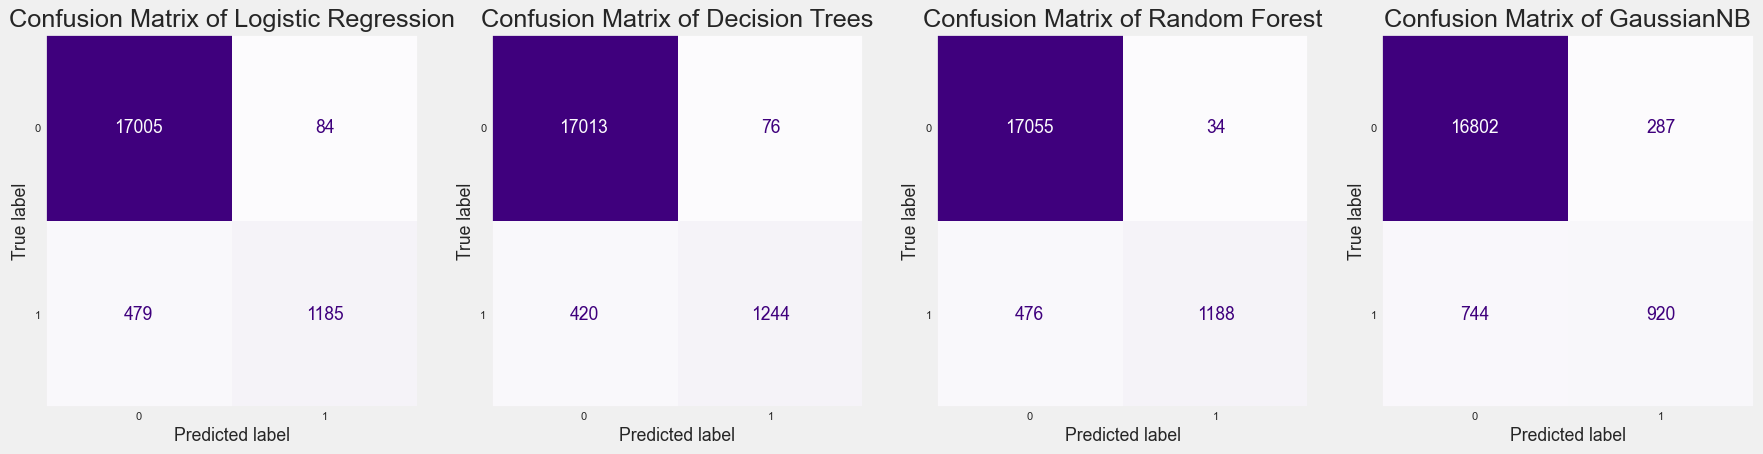

In [286]:
enn_eval = method_evaluation(new_data,target="diabetes",method="Edited Nearest Neighbours")

In [287]:
enn_eval

Metric  Logistic Regression  Random Forest  Decision Tree  \
0                 Accuracy            96.997814      97.355090      97.280435   
1                Precision            95.320483      95.916600      97.251243   
2                   Recall            85.361199      87.157442      85.597636   
3                 F1-score            89.588099      90.970626      90.427673   
4     Classification Error             3.002186       2.644910       2.719565   
5  Accuracy Positive Cases            71.213942      74.759615      71.394231   
6  Accuracy Negative Cases            99.508456      99.555269      99.801042   

   GaussianNB  
0   94.502213  
1   85.990878  
2   76.804509  
3   80.556205  
4    5.497787  
5   55.288462  
6   98.320557

We can see it has great overall accuracy but the accuracy for positive cases hasn't improved much: from 65% of our original dataset, now we have increased it too 71-74%. This are not bad results, since we have increased the accuracy, but they could improve.

#### **Method 5: Undersampling - All KNN**

This method will apply ENN (Edited Nearest Neighbours) several times and will vary the number of nearest neighbours. This sampling method also keeps the proportion of positive and negative cases from the original dataset. Let's see if it gives better results than ENN.

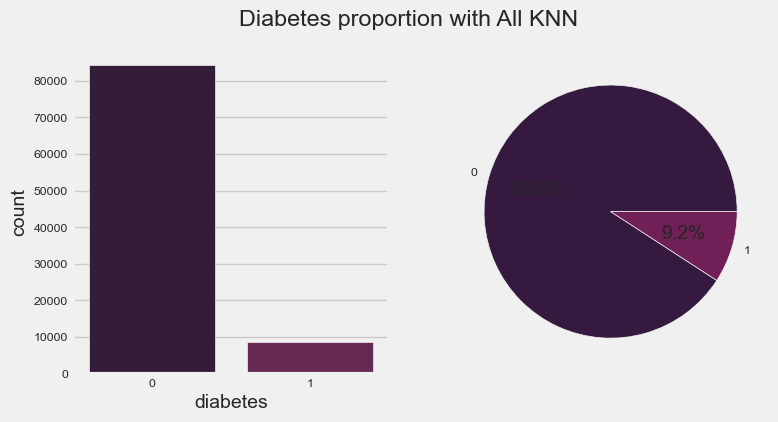

In [288]:
from imblearn.under_sampling import AllKNN

#Make a copy of the original X and y datasets
x = X.copy()
Y = y.copy()

# Instantiate the All KNN undersampling method
method = AllKNN()

# Apply undersampling method to X, y datasets
new_X, new_y = method.fit_resample(x,Y)

# Create a new DataFrame with the oversampled data
new_data = pd.DataFrame(new_X)
new_data["diabetes"] = new_y # Add labels to DataFrame

plot_graphs(new_data, new_data["diabetes"], "Diabetes proportion with All KNN")

Dataset was splitted into X_train and X_test succesfully.
Scaling of dataset is done, modelization will start.
Modelization has finished.


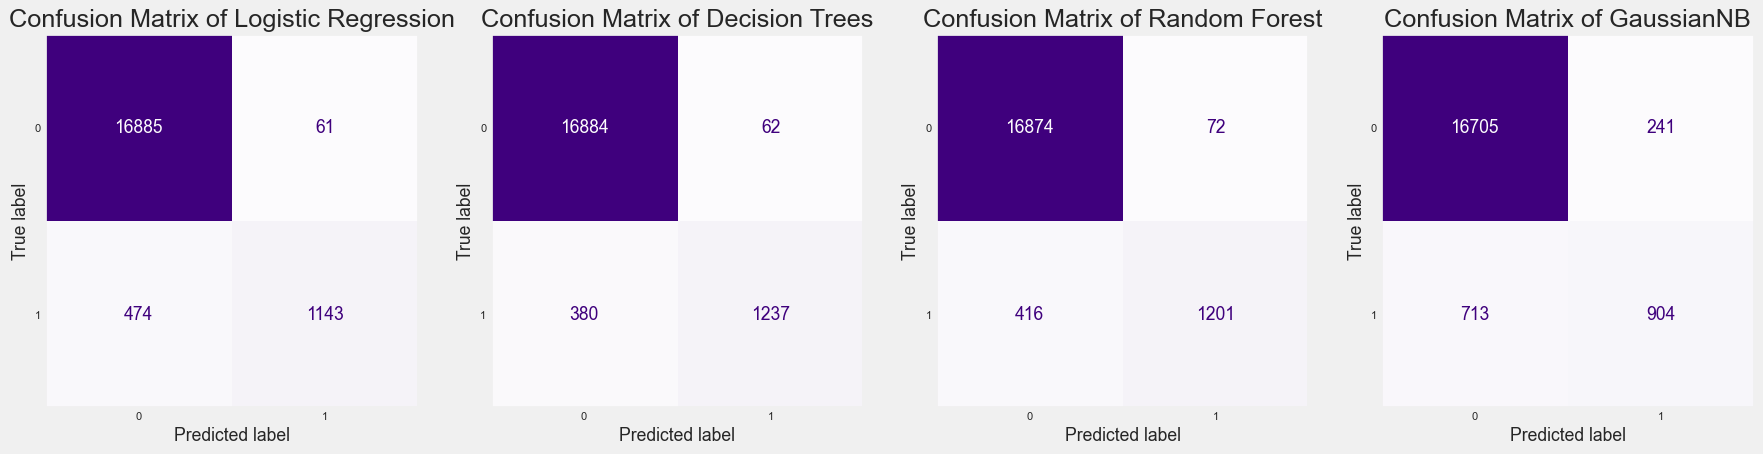

In [289]:
allknn_eval = method_evaluation(new_data,target="diabetes",method="All KNN")

In [290]:
allknn_eval

Metric  Logistic Regression  Random Forest  Decision Tree  \
0                 Accuracy            97.117923      97.618919      97.371115   
1                Precision            96.101491      96.512993      95.969027   
2                   Recall            85.163245      88.066911      86.924233   
3                 F1-score            89.737777      91.775115      90.844393   
4     Classification Error             2.882077       2.381081       2.628885   
5  Accuracy Positive Cases            70.686456      76.499691      74.273346   
6  Accuracy Negative Cases            99.640033      99.634132      99.575121   

   GaussianNB  
0   94.860744  
1   87.429249  
2   77.241917  
3   81.341825  
4    5.139256  
5   55.905999  
6   98.577835

Comparing with ENN, the overall accuracy has increased, however, the increase for the accuracy of positive cases, even if it has improved, it still doesn't give completely great results. ENN improved the accuracy from 65% to 71-74%, and All KNN got 70-76%, so it's a minor improvement.

#### **Method 6: Undersampling - Instance Hardness Threshold**

This method alleviates class imbalance by removing hard samples, which are the ones classified with a low probability.

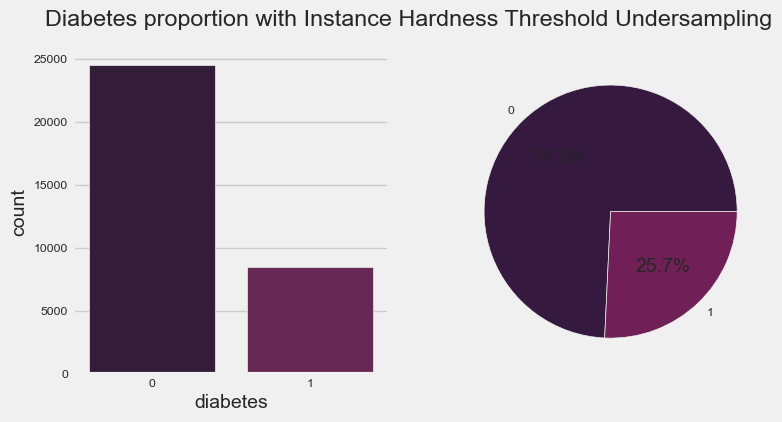

In [291]:
from imblearn.under_sampling import InstanceHardnessThreshold

x = X.copy()
Y = y.copy()

#This is a keep and delete method, so we need a lot of iterations.
for i in range(30):
    method = InstanceHardnessThreshold(random_state=42, n_jobs=-1)
    new_X, new_y = method.fit_resample(x,Y)
    x, Y = new_X, new_y

# Create a new DataFrame with the oversampled data
new_data = pd.DataFrame(new_X)
new_data["diabetes"] = new_y # Add labels to DataFrame

plot_graphs(new_data, new_data["diabetes"], "Diabetes proportion with Instance Hardness Threshold Undersampling")

Dataset was splitted into X_train and X_test succesfully.
Scaling of dataset is done, modelization will start.
Modelization has finished.


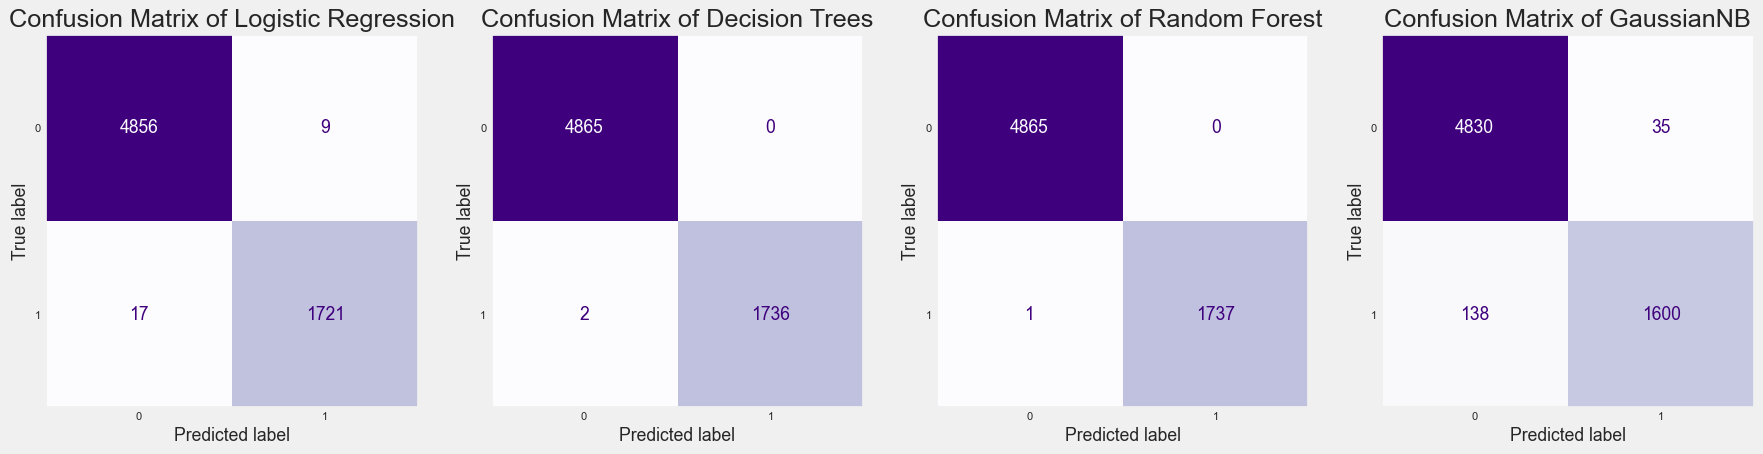

In [292]:
iht_eval = method_evaluation(new_data,target="diabetes",method="Instance Hardness Threshold")

In [293]:
iht_eval

Metric  Logistic Regression  Random Forest  Decision Tree  \
0                 Accuracy            99.606240      99.969711      99.984855   
1                Precision            99.565454      99.979453      99.989725   
2                   Recall            99.418435      99.942463      99.971231   
3                 F1-score            99.491647      99.960939      99.980473   
4     Classification Error             0.393760       0.030289       0.015145   
5  Accuracy Positive Cases            99.021864      99.884925      99.942463   
6  Accuracy Negative Cases            99.815005     100.000000     100.000000   

   GaussianNB  
0   97.379979  
1   97.540775  
2   95.670207  
3   96.555827  
4    2.620021  
5   92.059839  
6   99.280576

This method is giving really great overall accuracy and 99% accuracy for positive diabetes cases.

#### **Method 7: Over and under sampling - SMOTE-ENN**

This method combines the SMOTE ability to generate synthetic examples for the minority class and the ENN ability to delete some observations from both classes that are identifies as having different class between the observation’s class and its K-nearest neighbor majority class.

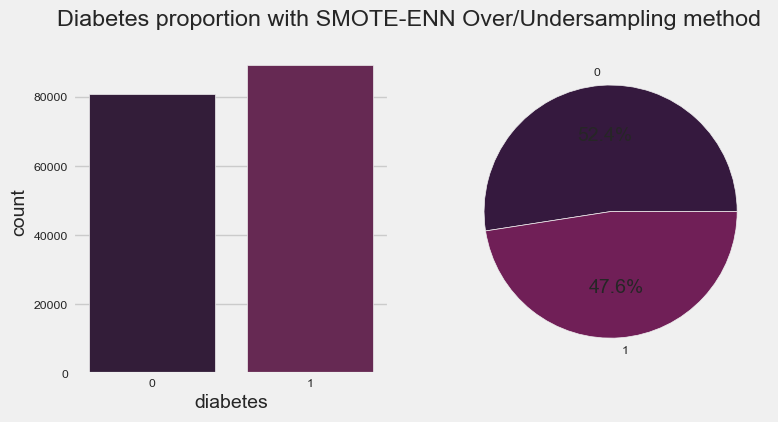

In [294]:
from imblearn.combine import SMOTEENN

 # Instantiate the SMOTEEN method
method = SMOTEENN(random_state=42, n_jobs=-1)
new_X, new_y = method.fit_resample(X,y)

# Create a new DataFrame with the oversampled data
new_data = pd.DataFrame(new_X)
new_data["diabetes"] = new_y # Add labels to DataFrame

plot_graphs(new_data, new_data["diabetes"], "Diabetes proportion with SMOTE-ENN Over/Undersampling method")

Dataset was splitted into X_train and X_test succesfully.
Scaling of dataset is done, modelization will start.
Modelization has finished.


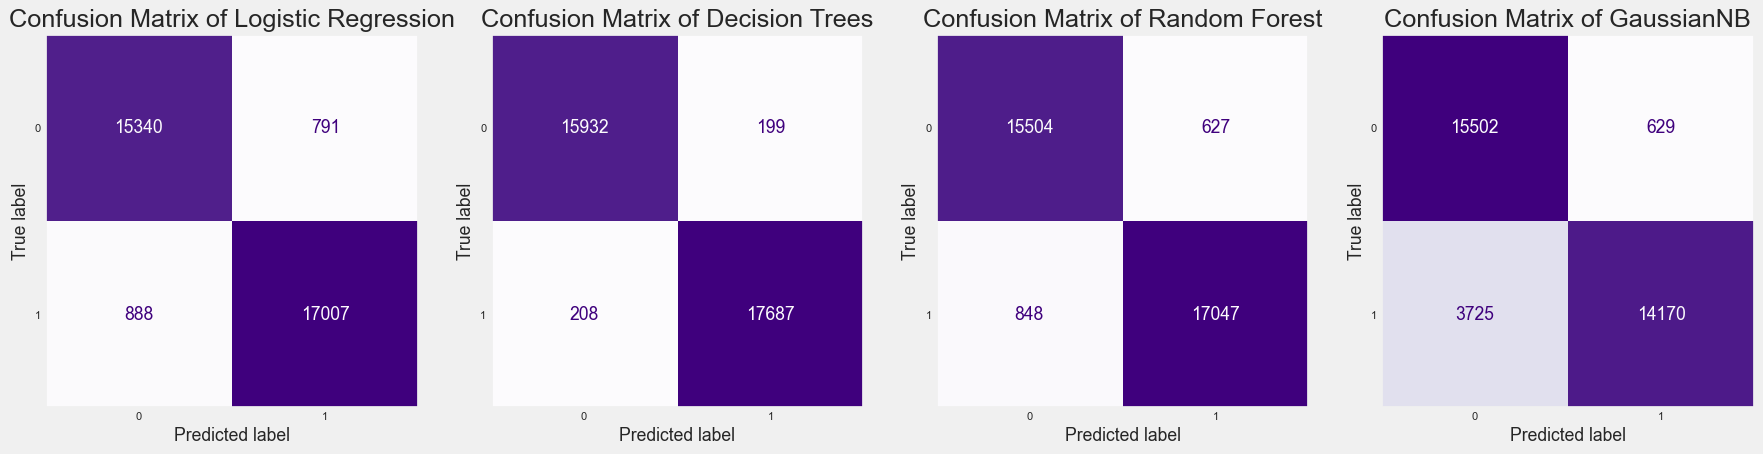

In [295]:
smoteen_eval = method_evaluation(new_data,target="diabetes",method="SMOTE-ENN")

In [296]:
smoteen_eval

Metric  Logistic Regression  Random Forest  Decision Tree  \
0                 Accuracy            95.065538      98.803856      95.665080   
1                Precision            95.041828      98.799337      95.633253   
2                   Recall            95.067059      98.802007      95.687160   
3                 F1-score            95.053666      98.800665      95.656147   
4     Classification Error             4.934462       1.196144       4.334920   
5  Accuracy Positive Cases            95.037720      98.837664      95.261246   
6  Accuracy Negative Cases            95.096398      98.766351      96.113074   

   GaussianNB  
0   87.203903  
1   88.187958  
2   87.642403  
3   87.184263  
4   12.796097  
5   79.184130  
6   96.100676

We got good results for this method, with 96% overall accuracy and around 96% accuracy for positive cases too.

----

### **Final Conclusions:**

- By balancing the dataset we get better performance results, specifically when looking at the accuracy for positive diabetes cases.
- With our original dataset we got around 65% accuracy for classifying positive diabetes cases, but when we oversample or undersample the dataset, those results come up to at least 89%.
- The method of sampling that gives the higher overall accuracy and positive-case accuracy is the Undersampling method "Instance Hardness Threshold"

----